In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [15]:
acc0 = [[], [0.10000000149011612, 0.10000000149011612, 0.121799997985363, 0.10000000149011612, 0.10000000149011612, 0.10159999877214432, 0.1462000012397766, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.08529999852180481, 0.10000000149011612, 0.10000000149011612, 0.13189999759197235, 0.14810000360012054, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11110000312328339, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12380000203847885, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10220000147819519, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15929999947547913, 0.14470000565052032, 0.15360000729560852, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11259999871253967, 0.1453000009059906, 0.10000000149011612, 0.10000000149011612, 0.1356000006198883, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1459999978542328, 0.10000000149011612, 0.10090000182390213, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.11259999871253967, 0.10000000149011612, 0.1468999981880188, 0.10000000149011612, 0.2003999948501587, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10490000247955322, 0.15710000693798065, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.15929999947547913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12250000238418579, 0.10300000011920929, 0.10000000149011612, 0.164000004529953, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15029999613761902, 0.10660000145435333, 0.10000000149011612, 0.2087000012397766, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13089999556541443, 0.16009999811649323, 0.10000000149011612, 0.17550000548362732, 0.19820000231266022, 0.16359999775886536, 0.10000000149011612, 0.2223999947309494, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1168999969959259, 0.10000000149011612, 0.13519999384880066, 0.15369999408721924, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11890000104904175, 0.19910000264644623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16979999840259552, 0.16380000114440918, 0.10000000149011612, 0.186599999666214, 0.10000000149011612, 0.17599999904632568, 0.10000000149011612, 0.10000000149011612, 0.17470000684261322, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15080000460147858, 0.10000000149011612, 0.10000000149011612, 0.21410000324249268], [0.10000000149011612, 0.16030000150203705, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.210099995136261, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1800999939441681, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17020000517368317, 0.17749999463558197, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13099999725818634, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17730000615119934], [0.10000000149011612, 0.10000000149011612, 0.16660000383853912, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1632000058889389, 0.10000000149011612, 0.20990000665187836, 0.10000000149011612, 0.2092999964952469, 0.1354999989271164, 0.10000000149011612, 0.1808999925851822, 0.20559999346733093, 0.10000000149011612, 0.21649999916553497, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19499999284744263, 0.15950000286102295, 0.10000000149011612, 0.19130000472068787, 0.20749999582767487, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1331000030040741], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2506999969482422, 0.16920000314712524, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17960000038146973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.186599999666214, 0.12240000069141388, 0.16019999980926514, 0.19529999792575836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.19110000133514404, 0.10000000149011612, 0.10000000149011612, 0.1527000069618225, 0.13609999418258667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17489999532699585, 0.17299999296665192, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22020000219345093, 0.19939999282360077, 0.23970000445842743, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17520000040531158, 0.10000000149011612, 0.18330000340938568, 0.10000000149011612, 0.10000000149011612, 0.18060000240802765, 0.2303999960422516, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.18170000612735748, 0.2370000034570694, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2485000044107437, 0.249099999666214, 0.10000000149011612, 0.23330000042915344, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24040000140666962, 0.21480000019073486, 0.10000000149011612, 0.23819999396800995, 0.10000000149011612, 0.20960000157356262, 0.19200000166893005, 0.19200000166893005, 0.10000000149011612, 0.10000000149011612, 0.19660000503063202, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21449999511241913, 0.21150000393390656, 0.10000000149011612, 0.10000000149011612, 0.21770000457763672, 0.24779999256134033, 0.193900004029274, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14000000059604645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26899999380111694, 0.19339999556541443, 0.10000000149011612, 0.09960000216960907, 0.10000000149011612, 0.1784999966621399, 0.10000000149011612], [0.14509999752044678, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1859000027179718, 0.10000000149011612, 0.09910000115633011, 0.18709999322891235, 0.1446000039577484, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13500000536441803, 0.12189999967813492, 0.24869999289512634, 0.10000000149011612, 0.15000000596046448, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2003999948501587, 0.10000000149011612, 0.22380000352859497, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12150000035762787, 0.2062000036239624, 0.18610000610351562, 0.18070000410079956, 0.10000000149011612, 0.10000000149011612, 0.17249999940395355, 0.10000000149011612, 0.19059999287128448, 0.18649999797344208, 0.10000000149011612, 0.18129999935626984], [0.22859999537467957, 0.21140000224113464, 0.10000000149011612, 0.10000000149011612, 0.18170000612735748, 0.2053000032901764, 0.10000000149011612, 0.21809999644756317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2637999951839447, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22089999914169312, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22679999470710754, 0.21610000729560852, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.1979999989271164, 0.10000000149011612, 0.10000000149011612, 0.13899999856948853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19609999656677246, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21330000460147858, 0.22310000658035278, 0.10000000149011612, 0.21709999442100525, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19359999895095825, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19580000638961792, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24050000309944153, 0.10000000149011612, 0.2152000069618225, 0.10000000149011612, 0.10000000149011612, 0.21580000221729279, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21060000360012054, 0.10000000149011612, 0.26980000734329224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20319999754428864], [0.10000000149011612, 0.10000000149011612, 0.1842000037431717, 0.22300000488758087, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24390000104904175, 0.10000000149011612, 0.12960000336170197, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22030000388622284, 0.20649999380111694, 0.10000000149011612, 0.2094999998807907, 0.10000000149011612, 0.10000000149011612, 0.20960000157356262, 0.2240999937057495, 0.10000000149011612, 0.10000000149011612, 0.22419999539852142, 0.23489999771118164, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2152000069618225, 0.10000000149011612, 0.10000000149011612, 0.24060000479221344, 0.10000000149011612, 0.10000000149011612, 0.22280000150203705, 0.21770000457763672, 0.148499995470047, 0.23559999465942383, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23989999294281006, 0.2175000011920929, 0.10000000149011612, 0.10000000149011612, 0.24950000643730164], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13670000433921814, 0.14990000426769257, 0.10000000149011612, 0.23589999973773956, 0.20149999856948853, 0.10000000149011612, 0.18129999935626984, 0.10000000149011612, 0.25429999828338623, 0.10000000149011612, 0.10000000149011612, 0.24289999902248383, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20720000565052032, 0.21160000562667847, 0.10000000149011612, 0.15649999678134918, 0.10000000149011612, 0.20389999449253082, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.20029999315738678, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2281000018119812, 0.10000000149011612, 0.27619999647140503, 0.250900000333786, 0.2752000093460083, 0.10000000149011612, 0.19760000705718994, 0.10000000149011612, 0.18230000138282776, 0.10000000149011612, 0.10000000149011612, 0.20890000462532043, 0.10000000149011612, 0.10000000149011612, 0.26510000228881836, 0.27730000019073486, 0.10000000149011612, 0.2703000009059906, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.19779999554157257, 0.10000000149011612, 0.10000000149011612, 0.2630999982357025, 0.23440000414848328, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2395000010728836, 0.24799999594688416, 0.10000000149011612, 0.10000000149011612, 0.15360000729560852, 0.2614000141620636, 0.19020000100135803, 0.2459000051021576, 0.10000000149011612, 0.10000000149011612, 0.20640000700950623, 0.10000000149011612, 0.23240000009536743, 0.23000000417232513, 0.20280000567436218, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23639999330043793], [0.10000000149011612, 0.10000000149011612, 0.23080000281333923, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17870000004768372, 0.23469999432563782, 0.27900001406669617, 0.10000000149011612, 0.10000000149011612, 0.23909999430179596, 0.2190999984741211, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24250000715255737, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23350000381469727, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17800000309944153, 0.10000000149011612], [0.10000000149011612, 0.23770000040531158, 0.10000000149011612, 0.23080000281333923, 0.10000000149011612, 0.10000000149011612, 0.19040000438690186, 0.2290000021457672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2134000062942505, 0.10000000149011612, 0.2551000118255615, 0.10000000149011612, 0.23109999299049377, 0.19130000472068787, 0.10000000149011612, 0.18410000205039978, 0.10000000149011612, 0.10000000149011612, 0.2102999985218048, 0.23160000145435333, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21610000729560852, 0.10000000149011612, 0.19930000603199005, 0.10000000149011612, 0.2671999931335449, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2777000069618225, 0.2272000014781952, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25279998779296875, 0.10000000149011612, 0.17980000376701355], [0.22750000655651093, 0.25769999623298645, 0.10000000149011612, 0.10000000149011612, 0.1859000027179718, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2393999993801117, 0.10000000149011612, 0.10000000149011612, 0.2761000096797943, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22630000114440918, 0.1468999981880188, 0.10000000149011612, 0.10000000149011612, 0.2583000063896179, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2863999903202057, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2337999939918518, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2619999945163727, 0.10000000149011612, 0.23839999735355377, 0.10000000149011612, 0.10000000149011612, 0.25189998745918274, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2565999925136566, 0.28110000491142273, 0.22499999403953552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2070000022649765, 0.10000000149011612, 0.10000000149011612, 0.2071000039577484, 0.1949000060558319, 0.23909999430179596, 0.10000000149011612, 0.10000000149011612, 0.14480000734329224, 0.19200000166893005, 0.2070000022649765, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23919999599456787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24169999361038208, 0.10000000149011612, 0.2745000123977661, 0.1581999957561493, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20469999313354492, 0.17389999330043793], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2660999894142151, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2872999906539917, 0.18930000066757202, 0.23880000412464142, 0.10000000149011612, 0.2615000009536743, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25029999017715454, 0.10000000149011612, 0.10000000149011612, 0.2897999882698059, 0.10000000149011612, 0.2913999855518341, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20559999346733093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2567000091075897, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18520000576972961, 0.29249998927116394, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27720001339912415, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23510000109672546, 0.10000000149011612, 0.10000000149011612, 0.25870001316070557, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2547000050544739, 0.26339998841285706, 0.10000000149011612]]
loss0 = [[], [254.4114227294922, 281.19134521484375, 2.3004114627838135, 623.5015258789062, 92.45259094238281, 2.381455421447754, 2.305116653442383, 290.8923645019531, 247.67092895507812, 418.8061218261719, 956.518310546875, 313.95172119140625, 227.42799377441406, 422.224365234375, 854.5078735351562, 2.6752631664276123, 295.5708312988281, 315.7638854980469, 2.9084842205047607, 3.2292227745056152, 620.5792236328125, 2.363786220550537, 591.2493286132812, 2.343048572540283, 607.0119018554688, 280.8146057128906, 138.93096923828125, 208.55506896972656, 2.5346195697784424, 160.98568725585938], [242.12828063964844, 68.89405822753906, 2.3037238121032715, 31.65188980102539, 201.38442993164062, 506.6716613769531, 54.31216812133789, 2.461925745010376, 2.440615653991699, 2.2854669094085693, 165.43968200683594, 77.94493865966797, 71.88233184814453, 2.314678430557251, 2.263448715209961, 75.75678253173828, 271.04705810546875, 2.2718515396118164, 373.4274597167969, 35.91852569580078, 77.029541015625, 209.49319458007812, 387.8045959472656, 2.329558849334717, 251.51812744140625, 2.357856035232544, 31.462522506713867, 182.50717163085938, 2.431119441986084, 413.70147705078125], [2.268153429031372, 79.76436614990234, 2.3130087852478027, 181.9314422607422, 2.324223518371582, 2.477297067642212, 52.401939392089844, 9.334300994873047, 111.4379653930664, 92.82460021972656, 10.341936111450195, 2.4024693965911865, 2.2662675380706787, 191.1444091796875, 197.29049682617188, 2.481219530105591, 43.94917678833008, 2.408886432647705, 2.2188358306884766, 24.35550880432129, 128.58360290527344, 94.9622573852539, 2.427743434906006, 6.912740707397461, 265.4972229003906, 2.3514063358306885, 2.526421308517456, 102.10308074951172, 2.4739127159118652, 119.43553924560547], [35.1059455871582, 99.76329040527344, 69.6585464477539, 102.31941986083984, 75.604248046875, 2.3440909385681152, 2.7001266479492188, 190.8376922607422, 2.170217752456665, 142.65286254882812, 222.93507385253906, 155.87672424316406, 2.5173423290252686, 2.306718111038208, 136.63951110839844, 2.526766300201416, 2.3342626094818115, 2.3434431552886963, 199.05445861816406, 2.281700611114502, 9.666584014892578, 149.64996337890625, 159.4777374267578, 92.70864868164062, 90.23115539550781, 2.8687713146209717, 257.99114990234375, 2.2975540161132812, 2.349726438522339, 148.14663696289062], [168.03550720214844, 18.522523880004883, 138.45730590820312, 2.7910516262054443, 2.3273541927337646, 26.802318572998047, 195.0446319580078, 519.3983764648438, 73.9406967163086, 207.59530639648438, 2.3844258785247803, 2.2992825508117676, 196.820068359375, 2.725628614425659, 24.17270851135254, 2.239941120147705, 69.16069030761719, 442.42559814453125, 2.317927837371826, 438.98370361328125, 2.55631685256958, 143.15907287597656, 441.6120910644531, 197.8648681640625, 206.4482879638672, 262.1354675292969, 2.445960521697998, 612.0380859375, 196.3755645751953, 2.363283157348633], [68.19734954833984, 2.4543282985687256, 69.06414031982422, 40.10280227661133, 142.86463928222656, 31.78392219543457, 2.1670520305633545, 60.12321853637695, 45.30863571166992, 32.73862838745117, 195.96949768066406, 127.97687530517578, 41.39643478393555, 102.73951721191406, 133.6348114013672, 31.222219467163086, 2.3613665103912354, 8.814626693725586, 62.744232177734375, 227.86407470703125, 2.414534091949463, 2.3824856281280518, 56.65852355957031, 20.43291664123535, 136.57240295410156, 2.579627275466919, 121.94572448730469, 69.98245239257812, 71.59221649169922, 2.3127598762512207], [35.56864929199219, 79.99911499023438, 2.5431406497955322, 138.0847930908203, 86.0531997680664, 284.46868896484375, 2.386857748031616, 15.60157299041748, 2.445544481277466, 2.7385709285736084, 2.2492010593414307, 3.188708782196045, 50.26067352294922, 2.4537620544433594, 2.349177598953247, 7.336695194244385, 2.2658588886260986, 90.49962615966797, 282.0636291503906, 361.0544128417969, 2.314642906188965, 2.512399911880493, 206.04225158691406, 2.5118629932403564, 2.3851425647735596, 258.7870178222656, 142.91616821289062, 37.54175567626953, 52.22242736816406, 2.3753392696380615], [173.1776885986328, 22.33708953857422, 33.57164001464844, 22.68012046813965, 41.01729202270508, 22.583627700805664, 16.819427490234375, 72.72886657714844, 140.82179260253906, 290.051513671875, 170.3373260498047, 2.234344244003296, 2.2972254753112793, 61.6336555480957, 287.0825500488281, 232.51808166503906, 88.56555938720703, 110.66615295410156, 2.3560056686401367, 170.20703125, 133.41371154785156, 120.35475158691406, 2.5064096450805664, 2.7378666400909424, 2.7797200679779053, 2.43091082572937, 102.65917205810547, 62.80833053588867, 47.250404357910156, 318.83380126953125], [2.49173903465271, 60.80580139160156, 19.782838821411133, 2.3194923400878906, 2.333606481552124, 91.33795928955078, 232.06544494628906, 107.48895263671875, 2.776275873184204, 2.375690221786499, 62.310787200927734, 49.15673065185547, 22.64723777770996, 60.89433670043945, 158.20680236816406, 48.319480895996094, 2.3282246589660645, 2.3043153285980225, 2.4185116291046143, 293.22821044921875, 24.36982536315918, 68.87501525878906, 2.2470335960388184, 127.962646484375, 2.1974081993103027, 120.87202453613281, 292.9330139160156, 2.5554420948028564, 2.0924177169799805, 115.90967559814453], [60.08042526245117, 169.83680725097656, 2.8140909671783447, 2.344891309738159, 380.2274475097656, 250.1708221435547, 90.84124755859375, 2.6291260719299316, 2.4083640575408936, 240.13507080078125, 2.4767489433288574, 108.06173706054688, 136.7061004638672, 196.71788024902344, 71.39827728271484, 404.47906494140625, 2.263368844985962, 2.243509292602539, 99.30465698242188, 2.234600305557251, 28.840970993041992, 2.920278787612915, 2.5044214725494385, 2.637611150741577, 348.9726867675781, 50.72245788574219, 2.3157451152801514, 65.48148345947266, 121.8766860961914, 253.78182983398438], [108.20127868652344, 349.9245910644531, 165.2763671875, 59.139705657958984, 20.17986488342285, 240.43785095214844, 85.363037109375, 2.1151914596557617, 2.321604013442993, 319.40447998046875, 397.6464538574219, 2.492280960083008, 2.2053120136260986, 2.5808446407318115, 122.91297149658203, 172.5941619873047, 219.87351989746094, 142.69244384765625, 116.03971099853516, 2.333096742630005, 155.84996032714844, 356.3332214355469, 77.18971252441406, 2.2507236003875732, 2.4101898670196533, 329.20819091796875, 2.6501874923706055, 86.73877716064453, 2.564117431640625, 25.42462921142578], [2.212935209274292, 50.84982681274414, 74.35807800292969, 206.64407348632812, 25.41381072998047, 2.143362045288086, 96.25765991210938, 2.6308434009552, 2.7864840030670166, 2.4216036796569824, 41.873329162597656, 9.947595596313477, 93.55623626708984, 52.184566497802734, 36.2110710144043, 116.59637451171875, 154.6999053955078, 139.72119140625, 90.40474700927734, 48.296566009521484, 100.08161926269531, 230.19432067871094, 120.72319793701172, 65.46174621582031, 2.47497296333313, 3.0471456050872803, 2.429445266723633, 90.8286361694336, 2.7149922847747803, 107.15587615966797], [215.17515563964844, 394.6741638183594, 3.977266311645508, 242.7241973876953, 66.4323501586914, 69.40242004394531, 6.397361755371094, 2.773425817489624, 512.9893798828125, 2.843471050262451, 94.322021484375, 87.2904281616211, 91.87049865722656, 71.83775329589844, 30.978540420532227, 39.428035736083984, 33.94623947143555, 115.50689697265625, 2.3104021549224854, 2.857748508453369, 2.3349432945251465, 2.6912665367126465, 50.75480270385742, 451.6788635253906, 3.003218650817871, 212.22067260742188, 2.4271657466888428, 2.9037039279937744, 137.52618408203125, 2.4599509239196777], [2.6313371658325195, 2.772798538208008, 194.07948303222656, 43.95523452758789, 2.762929916381836, 2.5989201068878174, 133.25216674804688, 2.307054042816162, 368.7891845703125, 346.14642333984375, 127.97672271728516, 2.4052133560180664, 75.27539825439453, 249.6771240234375, 146.9141845703125, 454.6008605957031, 121.05204010009766, 2.626678228378296, 191.5214080810547, 176.97616577148438, 480.98699951171875, 760.5945434570312, 2.6012253761291504, 3.026613712310791, 345.38018798828125, 12.573490142822266, 777.8177490234375, 296.28875732421875, 156.86070251464844, 67.77872467041016], [80.55218505859375, 97.89568328857422, 2.1942503452301025, 92.89424133300781, 79.32183074951172, 2.548914909362793, 105.40336608886719, 40.52977752685547, 63.17829513549805, 47.66561508178711, 320.8835144042969, 55.3140983581543, 136.6305389404297, 79.3211441040039, 40.873451232910156, 182.21043395996094, 309.0649719238281, 2.419930934906006, 58.112518310546875, 47.2390022277832, 50.36509704589844, 2.3738598823547363, 2.3126237392425537, 106.93795013427734, 2.2094266414642334, 59.196632385253906, 114.1587142944336, 22.18191146850586, 2.536105155944824, 68.96526336669922], [225.25027465820312, 180.92852783203125, 65.63188934326172, 358.7976379394531, 395.3785095214844, 2.470463275909424, 27.536394119262695, 121.81617736816406, 310.9317932128906, 230.29212951660156, 147.0378875732422, 25.10451316833496, 2.680940866470337, 96.20165252685547, 2.5903444290161133, 52.70135498046875, 453.87091064453125, 2.7783143520355225, 110.14358520507812, 152.45823669433594, 186.2888946533203, 2.486863374710083, 166.0396728515625, 2.326622486114502, 95.82228088378906, 100.74286651611328, 17.84762191772461, 74.75267028808594, 34.3011360168457, 2.3309693336486816], [80.03755950927734, 51.53711700439453, 2.3384487628936768, 2.8947412967681885, 179.2812957763672, 120.96434020996094, 592.368408203125, 2.5569841861724854, 456.5935363769531, 2.582932710647583, 127.88118743896484, 359.7091369628906, 190.6364288330078, 95.06665802001953, 512.02099609375, 172.88961791992188, 2.469494104385376, 2.867882251739502, 58.59933090209961, 2.713294744491577, 359.63177490234375, 91.27812194824219, 2.414191722869873, 3.0857386589050293, 74.15841674804688, 93.06932067871094, 3.0837182998657227, 2.329319715499878, 73.33113098144531, 69.51130676269531], [222.9381561279297, 363.3897399902344, 91.45687103271484, 469.5817565917969, 505.2803955078125, 424.370361328125, 426.2595520019531, 137.74122619628906, 186.54295349121094, 218.868896484375, 2.9442250728607178, 255.3633270263672, 518.1201782226562, 2.296499490737915, 385.4609680175781, 273.79248046875, 2.4052982330322266, 2.345893383026123, 2.6853702068328857, 2.1615254878997803, 394.8587341308594, 264.1318359375, 176.4913330078125, 181.4153594970703, 77.18744659423828, 2.8614771366119385, 2.6173667907714844, 68.89038848876953, 140.9220428466797, 2.6261003017425537], [52.420372009277344, 47.2111930847168, 172.1278533935547, 2.4404170513153076, 2.3096091747283936, 254.1605224609375, 2.6243057250976562, 2.192513942718506, 195.443115234375, 2.479884624481201, 109.68965911865234, 2.0747292041778564, 46.597286224365234, 118.36509704589844, 2.0755021572113037, 37.36692428588867, 92.22457885742188, 142.19647216796875, 2.3733012676239014, 2.1894054412841797, 87.51317596435547, 2.251784563064575, 227.20794677734375, 2.37397837638855, 192.8946990966797, 113.82740020751953, 325.6371154785156, 101.46179962158203, 91.83291625976562, 109.5411148071289], [3.036113739013672, 55.94866943359375, 341.9770202636719, 12.018417358398438, 711.28515625, 34.40475082397461, 178.2591552734375, 216.9987030029297, 134.9048614501953, 289.1632385253906, 2.260127067565918, 30.76384735107422, 2.510599136352539, 2.37953782081604, 2.4719934463500977, 171.0302734375, 2.651268482208252, 122.7027587890625, 3.1250383853912354, 48.508262634277344, 133.70947265625, 2.6006669998168945, 163.9170684814453, 145.11187744140625, 2.582881212234497, 2.956455945968628, 140.2811279296875, 2.4278552532196045, 141.45916748046875, 397.9794921875], [45.31291580200195, 473.2528381347656, 2.4563345909118652, 258.4586181640625, 131.39849853515625, 2.382882595062256, 2.6328651905059814, 98.45267486572266, 175.50657653808594, 43.730201721191406, 385.88739013671875, 2.78261661529541, 2.7725887298583984, 331.30560302734375, 75.9050064086914, 2.7219033241271973, 2.3828670978546143, 2.6176111698150635, 3.198380947113037, 45.29042053222656, 369.2225341796875, 2.8434133529663086, 77.21370697021484, 2.9419338703155518, 2.5019633769989014, 2.3068294525146484, 70.24408721923828, 564.3466186523438, 188.98651123046875, 2.4770257472991943], [55.080345153808594, 415.79852294921875, 2.4356672763824463, 361.6892395019531, 277.0748291015625, 314.4892578125, 3.497845411300659, 2.4940898418426514, 2.309415578842163, 538.5213623046875, 836.3609008789062, 3.4922144412994385, 3.4277098178863525, 304.5621643066406, 311.3610534667969, 191.69862365722656, 346.35797119140625, 106.98776245117188, 2.4551570415496826, 100.862060546875, 132.9363555908203, 363.95361328125, 493.95184326171875, 2.33253812789917, 648.7341918945312, 197.1523895263672, 91.53550720214844, 66.25456237792969, 3.4652903079986572, 375.33172607421875], [107.88787841796875, 2.574917793273926, 46.87407684326172, 2.3134708404541016, 96.89640045166016, 128.6679229736328, 2.7859561443328857, 2.4010965824127197, 92.86591339111328, 108.79397583007812, 17.020660400390625, 34.79227828979492, 12.310174942016602, 66.45770263671875, 125.87743377685547, 72.26287078857422, 2.4736640453338623, 43.06162643432617, 2.1208221912384033, 342.1848449707031, 2.28594970703125, 2.2258753776550293, 109.23273468017578, 2.344388484954834, 10.210654258728027, 99.44279479980469, 2.223353624343872, 2.6307051181793213, 40.9793586730957, 44.41774368286133], [306.3407287597656, 129.83367919921875, 56.42066955566406, 82.30437469482422, 105.26383972167969, 65.80421447753906, 38.07868957519531, 25.040302276611328, 63.737056732177734, 52.35139083862305, 62.31926345825195, 2.303030490875244, 52.32786178588867, 2.291370391845703, 35.03357696533203, 2.223345994949341, 60.07238006591797, 13.421980857849121, 209.50985717773438, 31.859066009521484, 79.30887603759766, 134.50180053710938, 2.305865526199341, 2.6374449729919434, 7.788566589355469, 228.95950317382812, 53.17154312133789, 2.785261631011963, 59.87930679321289, 2.22469162940979], [2.974175453186035, 2.3230016231536865, 10.61025333404541, 170.7144775390625, 2.908461093902588, 32.73322677612305, 214.20468139648438, 284.8828125, 27.785959243774414, 121.62678527832031, 2.439323902130127, 139.74327087402344, 60.665557861328125, 2.672374963760376, 351.29058837890625, 10.822254180908203, 59.25529479980469, 51.44424819946289, 244.22877502441406, 230.25177001953125, 118.67677307128906, 86.34028625488281, 25.037744522094727, 2.916062593460083, 2.7314634323120117, 206.80235290527344, 53.139217376708984, 2.60797119140625, 38.58779525756836, 59.14674377441406], [245.45260620117188, 502.7241516113281, 60.123924255371094, 393.25408935546875, 90.76716613769531, 2.747162342071533, 79.66018676757812, 302.9659118652344, 189.8242950439453, 2.3037798404693604, 51.2085075378418, 603.4198608398438, 394.9058532714844, 2.6713061332702637, 31.955219268798828, 2.574662685394287, 17.271652221679688, 34.6523551940918, 2.625377655029297, 466.7609558105469, 18.5827693939209, 291.6904602050781, 2.606121778488159, 2.25616455078125, 2.5096399784088135, 150.74664306640625, 76.79115295410156, 563.9846801757812, 606.1095581054688, 34.5142707824707], [38.35478973388672, 36.108062744140625, 2.28804874420166, 76.4933090209961, 30.886566162109375, 2.2955360412597656, 2.346126079559326, 2.8331379890441895, 67.7969970703125, 73.5394058227539, 2.4661622047424316, 2.9045848846435547, 2.3529834747314453, 25.412818908691406, 7.103153705596924, 35.49750900268555, 12.939239501953125, 2.33850359916687, 577.2525024414062, 12.662919044494629, 64.93867492675781, 2.68786883354187, 70.65514373779297, 2.0992250442504883, 2.6401917934417725, 31.486331939697266, 67.81426239013672, 34.2075080871582, 2.3640477657318115, 2.447340250015259], [629.1055908203125, 100.33890533447266, 136.61532592773438, 523.8114013671875, 2.3537023067474365, 291.2579040527344, 15.287407875061035, 83.24551391601562, 2.6887176036834717, 3.1901111602783203, 4.430413246154785, 214.93455505371094, 2.7482848167419434, 325.47509765625, 175.09376525878906, 440.1294860839844, 2.5774667263031006, 190.19236755371094, 472.9527587890625, 2.356534242630005, 189.49893188476562, 2.654949426651001, 298.67083740234375, 196.56826782226562, 56.66040802001953, 205.3201446533203, 693.836181640625, 67.51795959472656, 232.17149353027344, 227.59634399414062], [127.31453704833984, 43.31639099121094, 28.415868759155273, 93.8565902709961, 197.34957885742188, 27.358287811279297, 3.307178497314453, 47.780696868896484, 26.753877639770508, 171.6304473876953, 362.6575622558594, 27.948904037475586, 331.1339111328125, 85.76681518554688, 382.6678466796875, 30.760902404785156, 2.825255870819092, 254.39085388183594, 96.50662231445312, 36.409305572509766, 85.72685241699219, 32.2191047668457, 78.21086883544922, 55.13356399536133, 54.16587448120117, 2.5957746505737305, 2.2762629985809326, 315.87054443359375, 140.26718139648438, 100.82637786865234], [121.36170196533203, 557.43115234375, 181.8616943359375, 68.16181182861328, 468.6956481933594, 179.8043212890625, 180.8463592529297, 248.68807983398438, 42.9871826171875, 257.5470886230469, 2.412872552871704, 34.477169036865234, 264.8978576660156, 450.6628112792969, 2.7309749126434326, 39.957183837890625, 218.0579071044922, 2.5811069011688232, 84.13057708740234, 96.73664093017578, 265.5144348144531, 201.2574920654297, 376.1459045410156, 154.56834411621094, 132.109619140625, 394.4868469238281, 262.8834533691406, 2.8252151012420654, 2.8268747329711914, 197.14547729492188]] 

acc1 = [[], [0.12530000507831573, 0.16110000014305115, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1386999934911728, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10509999841451645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12780000269412994, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1137000024318695, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1543000042438507, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11410000175237656, 0.10000000149011612, 0.10270000249147415, 0.10000000149011612, 0.14350000023841858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09669999778270721, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12780000269412994, 0.10000000149011612], [0.10000000149011612, 0.18709999322891235, 0.10000000149011612, 0.10000000149011612, 0.10989999771118164, 0.10000000149011612, 0.10000000149011612, 0.1371999979019165, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20170000195503235, 0.10000000149011612, 0.10000000149011612, 0.10849999636411667, 0.14229999482631683, 0.1688999980688095, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11479999870061874, 0.1696999967098236, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.11900000274181366, 0.10899999737739563, 0.10000000149011612, 0.10000000149011612, 0.21040000021457672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11919999867677689, 0.18469999730587006, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2199999988079071, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1525000035762787, 0.15600000321865082, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13670000433921814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.17630000412464142, 0.10000000149011612, 0.10000000149011612, 0.14399999380111694, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13860000669956207, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11919999867677689, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12809999287128448, 0.10000000149011612, 0.18539999425411224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.1363999992609024, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17599999904632568, 0.17880000174045563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09950000047683716, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11249999701976776, 0.10000000149011612, 0.11010000109672546, 0.10000000149011612, 0.11680000275373459, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1834000051021576, 0.10000000149011612, 0.16369999945163727, 0.10000000149011612, 0.18960000574588776, 0.10000000149011612, 0.10000000149011612, 0.1949000060558319, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18930000066757202, 0.20409999787807465, 0.10000000149011612, 0.0729999989271164, 0.15780000388622284, 0.09260000288486481, 0.12809999287128448, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17900000512599945, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.19750000536441803, 0.10000000149011612, 0.10000000149011612, 0.23170000314712524, 0.10000000149011612, 0.20389999449253082, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19939999282360077, 0.10000000149011612, 0.10000000149011612, 0.19089999794960022, 0.10000000149011612, 0.16130000352859497, 0.10000000149011612, 0.10000000149011612, 0.20389999449253082, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.1437000036239624, 0.10649999976158142, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16529999673366547, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2190999984741211, 0.10300000011920929, 0.10000000149011612, 0.14429999887943268, 0.13429999351501465, 0.1598999947309494, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13429999351501465, 0.11559999734163284, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2062000036239624, 0.21879999339580536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19779999554157257, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1582999974489212, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15970000624656677, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.12189999967813492, 0.13850000500679016, 0.11659999936819077, 0.10000000149011612, 0.2012999951839447, 0.10000000149011612, 0.10000000149011612, 0.22040000557899475, 0.22689999639987946, 0.193900004029274, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15520000457763672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17499999701976776, 0.16509999334812164, 0.10000000149011612, 0.1858000010251999, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.2531999945640564, 0.10000000149011612, 0.13369999825954437, 0.18709999322891235, 0.10000000149011612, 0.18569999933242798, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19449999928474426, 0.11410000175237656, 0.1800999939441681, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1670999974012375, 0.10000000149011612, 0.23579999804496765, 0.10000000149011612, 0.22519999742507935, 0.10000000149011612, 0.1273999959230423, 0.24869999289512634], [0.10000000149011612, 0.24459999799728394, 0.10000000149011612, 0.22930000722408295, 0.10000000149011612, 0.10000000149011612, 0.26010000705718994, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20029999315738678, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25130000710487366, 0.10000000149011612, 0.10000000149011612, 0.24979999661445618, 0.10000000149011612, 0.10000000149011612, 0.2379000037908554, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20499999821186066, 0.10000000149011612, 0.2257000058889389, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24789999425411224, 0.12800000607967377, 0.10000000149011612, 0.10000000149011612, 0.23119999468326569, 0.2485000044107437, 0.10000000149011612, 0.24959999322891235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18150000274181366, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.164000004529953, 0.20309999585151672], [0.1703999936580658, 0.10000000149011612, 0.19709999859333038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23579999804496765, 0.13259999454021454, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17900000512599945, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17759999632835388, 0.16779999434947968, 0.10000000149011612, 0.10000000149011612, 0.21860000491142273, 0.22040000557899475, 0.10000000149011612], [0.1607999950647354, 0.10000000149011612, 0.1615999937057495, 0.10000000149011612, 0.10000000149011612, 0.210099995136261, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22450000047683716, 0.1842000037431717, 0.10000000149011612, 0.20360000431537628, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12280000001192093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18719999492168427, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24300000071525574, 0.10000000149011612, 0.12120000272989273, 0.2888000011444092], [0.10000000149011612, 0.10000000149011612, 0.2660999894142151, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26089999079704285, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16850000619888306, 0.22200000286102295, 0.10000000149011612, 0.2425999939441681, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26820001006126404, 0.10000000149011612, 0.1860000044107437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.2094999998807907, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24490000307559967, 0.10000000149011612, 0.10000000149011612, 0.19619999825954437, 0.10000000149011612, 0.25049999356269836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2757999897003174, 0.24140000343322754, 0.10000000149011612, 0.20479999482631683, 0.21529999375343323, 0.20100000500679016, 0.2483000010251999, 0.10000000149011612], [0.10000000149011612, 0.23319999873638153, 0.10000000149011612, 0.22450000047683716, 0.10000000149011612, 0.10000000149011612, 0.2272000014781952, 0.1462000012397766, 0.10000000149011612, 0.26080000400543213, 0.10000000149011612, 0.10000000149011612, 0.23469999432563782, 0.10000000149011612, 0.186599999666214, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20730000734329224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26579999923706055, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23880000412464142, 0.10000000149011612, 0.21780000627040863], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26809999346733093, 0.10000000149011612, 0.2409999966621399, 0.10000000149011612, 0.22130000591278076, 0.27570000290870667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2313999980688095, 0.20090000331401825, 0.10000000149011612, 0.2599000036716461, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.2084999978542328, 0.18479999899864197, 0.20389999449253082, 0.10000000149011612, 0.24040000140666962, 0.10000000149011612, 0.23250000178813934, 0.27219998836517334, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1761000007390976, 0.10000000149011612, 0.10000000149011612, 0.21310000121593475, 0.10000000149011612, 0.2264000028371811, 0.10000000149011612, 0.10000000149011612, 0.23520000278949738, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21279999613761902, 0.2515999972820282, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2578999996185303, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2743000090122223, 0.10000000149011612, 0.10000000149011612, 0.2168000042438507, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22499999403953552, 0.10000000149011612, 0.2198999971151352, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.257999986410141, 0.10000000149011612, 0.19099999964237213, 0.18379999697208405, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2290000021457672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.227400004863739, 0.10000000149011612, 0.10000000149011612, 0.23510000109672546, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.25769999623298645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2401999980211258, 0.10000000149011612, 0.3086000084877014, 0.10000000149011612, 0.2459000051021576, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27649998664855957, 0.10000000149011612, 0.10000000149011612, 0.23829999566078186, 0.2614000141620636, 0.24639999866485596, 0.20489999651908875, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23029999434947968, 0.10000000149011612, 0.10000000149011612, 0.23109999299049377, 0.10000000149011612, 0.24889999628067017, 0.28780001401901245, 0.10000000149011612, 0.2574000060558319, 0.22259999811649323, 0.10000000149011612, 0.10000000149011612, 0.25699999928474426, 0.10000000149011612, 0.2305999994277954, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19949999451637268, 0.249099999666214, 0.10000000149011612, 0.2728999853134155, 0.10000000149011612, 0.23190000653266907], [0.10000000149011612, 0.24320000410079956, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2101999968290329, 0.23649999499320984, 0.20800000429153442, 0.2502000033855438, 0.26260000467300415, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24390000104904175, 0.10000000149011612, 0.1671999990940094, 0.10000000149011612, 0.21660000085830688, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26899999380111694, 0.2508000135421753, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22349999845027924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19499999284744263, 0.19509999454021454, 0.22419999539852142, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1746000051498413, 0.10000000149011612, 0.1736000031232834, 0.15080000460147858, 0.24220000207424164, 0.10000000149011612, 0.2012999951839447, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1858000010251999], [0.10000000149011612, 0.10000000149011612, 0.24279999732971191, 0.22550000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.210099995136261, 0.20509999990463257, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16940000653266907, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17820000648498535, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20829999446868896, 0.10000000149011612, 0.16419999301433563, 0.1915999948978424, 0.2320999950170517, 0.20880000293254852, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25690001249313354, 0.10000000149011612, 0.10000000149011612, 0.18379999697208405, 0.10000000149011612, 0.10000000149011612, 0.2434999942779541, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2549999952316284, 0.10000000149011612, 0.25929999351501465, 0.2687999904155731, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24969999492168427, 0.2696000039577484, 0.10000000149011612, 0.249099999666214, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.225600004196167, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612]]
loss1 = [[], [2.8620212078094482, 2.7219526767730713, 316.4424133300781, 542.420654296875, 691.6354370117188, 695.6998901367188, 507.7924499511719, 338.1849365234375, 719.4373779296875, 517.9491577148438, 672.771240234375, 525.1981201171875, 280.2634582519531, 389.5080871582031, 2.837867498397827, 608.8048706054688, 67.07127380371094, 2.522432327270508, 695.5755615234375, 89.9037857055664, 527.7088623046875, 664.0612182617188, 500.74920654296875, 481.35589599609375, 2.70047926902771, 245.4041290283203, 70.251953125, 431.8242492675781, 3.1764893531799316, 360.2747802734375], [12.429656028747559, 34.070457458496094, 25.74995994567871, 2.307945966720581, 25.226837158203125, 20.86707305908203, 4.058294296264648, 2.2825515270233154, 26.18513298034668, 16.98284912109375, 994.2639770507812, 53.68024444580078, 2.342132806777954, 47.83005142211914, 14.968406677246094, 2.3540050983428955, 29.103450775146484, 2.3367536067962646, 17.515701293945312, 2.3166160583496094, 31.45157814025879, 20.14436149597168, 20.63715171813965, 2.3199782371520996, 16.48847198486328, 15.041179656982422, 54.85588836669922, 30.863012313842773, 2.303462266921997, 9.593231201171875], [114.4051513671875, 2.281550884246826, 19.292490005493164, 68.8526382446289, 2.4866199493408203, 75.33895874023438, 2.411484718322754, 2.5881831645965576, 164.56719970703125, 70.34881591796875, 186.8961944580078, 2.351426124572754, 283.1316833496094, 21.608558654785156, 2.397477149963379, 2.5410306453704834, 2.391263723373413, 23.987457275390625, 31.35606575012207, 98.18951416015625, 2.399538278579712, 2.3124876022338867, 180.60430908203125, 248.9613037109375, 61.5335807800293, 3.768146514892578, 186.5035858154297, 93.43404388427734, 162.01251220703125, 123.16024017333984], [2.5180864334106445, 2.4426002502441406, 336.7306213378906, 115.08997344970703, 2.218066692352295, 57.41377639770508, 35.5420036315918, 51.148101806640625, 89.94090270996094, 2.6452977657318115, 2.5433499813079834, 76.74470520019531, 148.34693908691406, 88.2437973022461, 2.3081319332122803, 360.0672912597656, 69.34175109863281, 100.73296356201172, 87.11481475830078, 2.500744581222534, 2.2942709922790527, 42.25859832763672, 316.1661682128906, 166.96109008789062, 286.8298034667969, 2.505690336227417, 151.58392333984375, 95.42768096923828, 456.3942565917969, 41.42380142211914], [2.289677858352661, 122.00196075439453, 60.770904541015625, 2.4417757987976074, 73.0125961303711, 23.59189224243164, 193.20152282714844, 132.72230529785156, 135.64706420898438, 2.3941314220428467, 50.28382110595703, 242.9905242919922, 93.76689910888672, 2.809901237487793, 197.91748046875, 74.10279846191406, 195.18995666503906, 102.8102798461914, 81.0291976928711, 53.46910095214844, 201.65130615234375, 2.9896199703216553, 224.77554321289062, 2.4230868816375732, 24.14741325378418, 29.260339736938477, 183.14144897460938, 46.11574172973633, 127.3763656616211, 78.11975860595703], [163.1354522705078, 2.3084676265716553, 50.75654220581055, 49.4215202331543, 34.78901672363281, 40.53143310546875, 2.288156270980835, 2.2765157222747803, 112.54405975341797, 47.450801849365234, 48.42671585083008, 2.5372636318206787, 110.69092559814453, 98.281005859375, 59.029205322265625, 33.63929748535156, 16.386260986328125, 2.316037654876709, 49.6470832824707, 18.34641456604004, 296.611328125, 2.4313435554504395, 31.540931701660156, 2.3149778842926025, 26.3592586517334, 2.2892062664031982, 2.488795757293701, 55.35696792602539, 45.7630615234375, 92.09951782226562], [3.60239577293396, 232.56594848632812, 72.33316040039062, 2.247582197189331, 47.86317443847656, 2.4927213191986084, 132.0923309326172, 2.247663736343384, 82.70331573486328, 34.113853454589844, 2.3630213737487793, 41.86958312988281, 84.69591522216797, 177.21510314941406, 40.53330612182617, 2.304567813873291, 2.3107261657714844, 185.30859375, 2.4032790660858154, 2.405444383621216, 2.5360653400421143, 2.3163998126983643, 87.18941497802734, 79.9120101928711, 78.5442123413086, 2.3982486724853516, 94.06976318359375, 153.43177795410156, 184.1905975341797, 95.59016418457031], [7.926877975463867, 33.401641845703125, 2.1998400688171387, 89.26820373535156, 89.10075378417969, 2.156055212020874, 91.31770324707031, 2.2396633625030518, 98.0994873046875, 45.660362243652344, 115.31338500976562, 130.65771484375, 15.778430938720703, 153.44107055664062, 55.120182037353516, 70.63211822509766, 2.420644998550415, 292.7275390625, 22.675016403198242, 2.3193044662475586, 41.2789421081543, 2.3898251056671143, 78.586669921875, 26.02314567565918, 2.520256519317627, 223.0435028076172, 53.397499084472656, 63.18766784667969, 174.93038940429688, 27.119714736938477], [2.3187856674194336, 2.4654688835144043, 153.4649200439453, 89.39920043945312, 32.32813262939453, 80.7566909790039, 71.6619644165039, 86.76541137695312, 57.723751068115234, 5.959841251373291, 2.3421311378479004, 91.32219696044922, 61.03303146362305, 107.16490173339844, 28.36143684387207, 24.61707305908203, 83.24925231933594, 11.724480628967285, 2.385225534439087, 2.3642914295196533, 55.91868209838867, 2.254260540008545, 2.4713821411132812, 2.3596527576446533, 81.97904205322266, 89.19834899902344, 13.461920738220215, 2.463235378265381, 2.4643824100494385, 68.44343566894531], [40.00337219238281, 12.890829086303711, 15.317889213562012, 178.7364959716797, 2.289031744003296, 2.4586751461029053, 89.66986846923828, 36.18614959716797, 124.91210174560547, 2.6659765243530273, 18.425701141357422, 96.6524429321289, 106.37022399902344, 96.6131820678711, 2.3369674682617188, 6.776986122131348, 90.48128509521484, 102.11677551269531, 205.75027465820312, 206.02984619140625, 145.45913696289062, 2.4750680923461914, 8.291558265686035, 2.6773927211761475, 73.43620300292969, 49.42881774902344, 4.156981945037842, 18.26677894592285, 88.7900161743164, 125.7801284790039], [3.1354382038116455, 2.4512221813201904, 2.574944257736206, 68.95929718017578, 2.353574514389038, 108.4697036743164, 62.58757400512695, 2.9240243434906006, 2.4104771614074707, 2.5229737758636475, 151.8939666748047, 138.0511016845703, 35.37778854370117, 2.5227444171905518, 32.427146911621094, 130.83541870117188, 30.108150482177734, 7.358033657073975, 87.8966293334961, 95.37647247314453, 318.7306823730469, 2.5223214626312256, 2.5562360286712646, 171.36805725097656, 2.233231544494629, 61.41230773925781, 36.828895568847656, 68.91626739501953, 107.87069702148438, 17.556766510009766], [2.23398756980896, 62.53419876098633, 2.354294776916504, 2.1864194869995117, 274.4228515625, 2.9385969638824463, 132.29457092285156, 81.5712661743164, 59.15251922607422, 35.506465911865234, 77.23328399658203, 202.24346923828125, 14.169698715209961, 64.72205352783203, 2.272277593612671, 2.8758392333984375, 2.3603153228759766, 186.64035034179688, 53.83638000488281, 55.37886428833008, 203.92189025878906, 11.871893882751465, 2.446108102798462, 64.09051513671875, 2.2272562980651855, 200.95103454589844, 2.8027970790863037, 75.56499481201172, 2.713841438293457, 2.6710281372070312], [288.57598876953125, 2.365208625793457, 126.81372833251953, 2.538551092147827, 69.82191467285156, 258.8298034667969, 2.4164304733276367, 72.76475524902344, 89.03148651123047, 198.44142150878906, 154.52076721191406, 193.3459930419922, 331.92828369140625, 21.119768142700195, 2.566451072692871, 412.024169921875, 76.49531555175781, 117.53144073486328, 2.580261707305908, 116.05162811279297, 188.40191650390625, 2.701030969619751, 146.5441436767578, 231.8477325439453, 2.464026927947998, 127.90705871582031, 47.38784408569336, 41.39982986450195, 19.47125244140625, 44.23715591430664], [545.892822265625, 47.71806716918945, 256.6153259277344, 60.783851623535156, 2.5188498497009277, 55.93034362792969, 2.413813829421997, 89.8672103881836, 115.13179016113281, 32.234683990478516, 2.593843460083008, 2.470154047012329, 212.0875701904297, 42.96530532836914, 2.177111864089966, 2.220613956451416, 59.764774322509766, 2.4306442737579346, 44.59366226196289, 180.89370727539062, 258.6366271972656, 156.25054931640625, 118.58417510986328, 153.0167694091797, 2.4773173332214355, 119.466552734375, 556.0197143554688, 190.16261291503906, 2.239053249359131, 2.9217371940612793], [2.819474935531616, 59.837589263916016, 2.3294060230255127, 7.443764686584473, 37.08073806762695, 31.527450561523438, 29.246715545654297, 2.3278276920318604, 2.2621333599090576, 82.90768432617188, 55.90707015991211, 56.03562545776367, 153.1640625, 65.16997528076172, 97.14217376708984, 34.46965026855469, 100.64240264892578, 2.3090972900390625, 139.16064453125, 71.612060546875, 37.9443473815918, 37.80788803100586, 88.97900390625, 2.370953321456909, 2.260247230529785, 34.368900299072266, 78.69487762451172, 2.334545850753784, 2.281888008117676, 71.89323425292969], [2.3441762924194336, 63.72822570800781, 2.5148541927337646, 131.0157470703125, 32.869476318359375, 2.287081718444824, 13.42575740814209, 28.82270050048828, 64.26789093017578, 2.282027006149292, 2.602398157119751, 22.860157012939453, 2.4675960540771484, 67.76968383789062, 195.12554931640625, 86.96809387207031, 94.92121887207031, 109.90574645996094, 2.3348448276519775, 25.683958053588867, 84.01277923583984, 42.966373443603516, 2.2196247577667236, 25.309843063354492, 175.8924560546875, 71.24748229980469, 2.1767735481262207, 40.61040115356445, 2.655139207839966, 2.1219775676727295], [27.205429077148438, 16.66197967529297, 2.3445613384246826, 66.47488403320312, 43.36137390136719, 18.371564865112305, 279.57208251953125, 30.4438533782959, 2.433562994003296, 323.4681396484375, 70.29396057128906, 439.3599548339844, 27.28312873840332, 2.6641180515289307, 2.9476699829101562, 97.00546264648438, 2.3247952461242676, 120.57113647460938, 59.473243713378906, 85.74434661865234, 2.120065927505493, 89.4561767578125, 3.263251304626465, 62.45425796508789, 68.02128601074219, 77.89859771728516, 127.21675109863281, 218.88734436035156, 109.14021301269531, 35.526100158691406], [2.322636365890503, 189.39024353027344, 58.94277572631836, 134.30975341796875, 279.9000549316406, 454.3897399902344, 48.49026107788086, 279.92535400390625, 2.434213161468506, 116.13465881347656, 236.11900329589844, 3.5436618328094482, 280.3865051269531, 2.478364944458008, 94.6605453491211, 114.7209243774414, 127.03062438964844, 64.2337417602539, 137.23233032226562, 83.95729064941406, 123.34764862060547, 153.61155700683594, 2.2812905311584473, 2.4720828533172607, 102.00435638427734, 2.2925617694854736, 3.0251405239105225, 2.4544427394866943, 2.7749686241149902, 86.90221405029297], [67.27098083496094, 2.3530519008636475, 326.0098876953125, 2.3868510723114014, 89.46731567382812, 242.83079528808594, 3.269770860671997, 2.245760202407837, 163.12765502929688, 2.4726343154907227, 272.9503173828125, 517.2197265625, 2.214038133621216, 211.91407775878906, 2.611588954925537, 211.0294952392578, 253.53509521484375, 143.5504608154297, 86.40270233154297, 3.4337847232818604, 142.196533203125, 232.6663818359375, 14.73025131225586, 2.4172706604003906, 161.51773071289062, 15.0615816116333, 64.08442687988281, 2.7749109268188477, 104.99683380126953, 2.738840341567993], [40.00651550292969, 132.6221466064453, 129.51394653320312, 154.33470153808594, 368.7566223144531, 474.1596374511719, 135.9029083251953, 615.8380737304688, 144.99072265625, 144.78909301757812, 560.0525512695312, 505.1567077636719, 2.1330227851867676, 149.86801147460938, 2.349686622619629, 779.13916015625, 3.025609254837036, 2.30334734916687, 96.01661682128906, 460.60321044921875, 119.01687622070312, 202.15130615234375, 241.15870666503906, 2.8314108848571777, 2.868471384048462, 270.9783020019531, 2.3993077278137207, 108.30196380615234, 176.51296997070312, 94.36041259765625], [2.705618143081665, 2.5677247047424316, 2.6069631576538086, 42.7370491027832, 2.349646806716919, 287.3537902832031, 2.3262524604797363, 2.3512790203094482, 218.8070526123047, 153.60728454589844, 107.32511138916016, 297.23101806640625, 79.34649658203125, 51.114906311035156, 201.99404907226562, 2.9220972061157227, 143.07376098632812, 224.3407745361328, 2.804368019104004, 158.76071166992188, 2.530297040939331, 10.688119888305664, 165.6797332763672, 2.7091569900512695, 293.175537109375, 52.313804626464844, 26.835742950439453, 82.6707534790039, 281.6997375488281, 127.45870971679688], [38.7056770324707, 182.8187713623047, 525.3466796875, 146.6646270751953, 255.2632293701172, 178.1836700439453, 120.63951110839844, 97.26013946533203, 161.63551330566406, 485.714599609375, 78.52264404296875, 196.13685607910156, 56.355194091796875, 84.2649917602539, 110.22146606445312, 123.86666107177734, 2.316575288772583, 3.098679304122925, 184.43753051757812, 451.1655578613281, 167.1170196533203, 2.8203322887420654, 295.3818359375, 251.59442138671875, 327.225341796875, 2.2838728427886963, 67.6843490600586, 37.8533821105957, 2.639068126678467, 507.948486328125], [45.133846282958984, 41.49787139892578, 240.2465057373047, 2.195556163787842, 115.48723602294922, 2.2549216747283936, 43.31755065917969, 245.06854248046875, 138.4895477294922, 53.40766906738281, 2.507209300994873, 242.67715454101562, 2.6358749866485596, 2.4855191707611084, 552.234619140625, 83.08087158203125, 85.42655944824219, 2.361346483230591, 23.789188385009766, 128.0959930419922, 31.842071533203125, 48.20097732543945, 2.3806116580963135, 38.07483673095703, 137.5086212158203, 2.533853530883789, 53.925655364990234, 73.13707733154297, 207.72267150878906, 144.6986846923828], [2.3359553813934326, 438.1119079589844, 206.42027282714844, 42.05387496948242, 50.998802185058594, 571.6761474609375, 42.79587173461914, 38.741207122802734, 646.21533203125, 194.15135192871094, 357.9000549316406, 2.8265464305877686, 236.8179473876953, 2.6665656566619873, 210.002197265625, 2.3703317642211914, 169.70584106445312, 120.402587890625, 73.01604461669922, 421.48779296875, 2.411635398864746, 438.2814025878906, 72.64897155761719, 3.8152589797973633, 2.5608930587768555, 2.191399335861206, 2.256782293319702, 237.08302307128906, 232.50332641601562, 64.73426818847656], [105.92849731445312, 86.83760070800781, 231.2413787841797, 115.69273376464844, 2.5520853996276855, 96.96415710449219, 114.27790069580078, 2.4246039390563965, 102.10548400878906, 2.6298351287841797, 2.357090711593628, 202.9947967529297, 2.2791824340820312, 2.309894323348999, 71.07727813720703, 84.93389892578125, 2.676712989807129, 163.4880828857422, 2.8660104274749756, 191.93307495117188, 50.47275161743164, 80.45982360839844, 121.29632568359375, 108.27677154541016, 2.637273073196411, 2.6566059589385986, 159.02711486816406, 2.564244031906128, 69.17147827148438, 2.404703378677368], [268.5216369628906, 2.6321897506713867, 110.12891387939453, 456.9259033203125, 300.1523132324219, 2.1538329124450684, 2.572587013244629, 2.766625165939331, 3.225292682647705, 2.6274733543395996, 150.47825622558594, 174.8217315673828, 129.20654296875, 2.9517719745635986, 135.0238800048828, 3.180731773376465, 110.4469985961914, 2.833414077758789, 29.796106338500977, 342.1213073730469, 142.171142578125, 32.15754318237305, 2.861461877822876, 2.689911127090454, 569.7684326171875, 299.3834533691406, 14.940567016601562, 116.55107879638672, 469.0704650878906, 169.85720825195312], [109.5479736328125, 327.9869384765625, 16.583484649658203, 49.18008041381836, 57.53387451171875, 2.4163026809692383, 80.33602142333984, 70.6893081665039, 86.08069610595703, 32.437129974365234, 2.4600718021392822, 2.1497421264648438, 2.4248106479644775, 66.92233276367188, 53.21444320678711, 104.43201446533203, 116.70269012451172, 28.896240234375, 2.413628578186035, 56.050079345703125, 2.5257935523986816, 2.267273187637329, 2.2256720066070557, 89.33065795898438, 2.3690428733825684, 71.802978515625, 469.9241943359375, 97.10299682617188, 43.812217712402344, 2.7186994552612305], [82.07498931884766, 316.58856201171875, 2.1730117797851562, 2.4126079082489014, 193.5172119140625, 596.7661743164062, 169.70468139648438, 486.65570068359375, 77.9514389038086, 75.78878021240234, 102.44985961914062, 2.7696027755737305, 2.6354615688323975, 194.8864288330078, 367.6567077636719, 189.1657257080078, 34.33466339111328, 5.276211738586426, 78.4668197631836, 245.24244689941406, 325.59796142578125, 255.99295043945312, 183.1813201904297, 57.886436462402344, 85.03079223632812, 157.8632049560547, 2.331326484680176, 287.7282409667969, 130.4287109375, 227.08505249023438], [101.70695495605469, 229.76300048828125, 13.976051330566406, 8.634138107299805, 46.74222946166992, 57.08776092529297, 110.3076400756836, 2.3439435958862305, 115.62721252441406, 2.552081823348999, 2.3569459915161133, 2.2982187271118164, 2.8381505012512207, 103.7411880493164, 35.173370361328125, 593.9818115234375, 46.73313522338867, 408.2925109863281, 122.40536499023438, 2.365910053253174, 54.97542953491211, 614.906494140625, 2.382070541381836, 242.14700317382812, 135.40013122558594, 2.260375499725342, 55.51133728027344, 39.69114685058594, 100.92019653320312, 177.9060516357422], [210.43980407714844, 166.07177734375, 55.91897964477539, 2.6995294094085693, 16.717622756958008, 2.3910562992095947, 2.6685168743133545, 114.16615295410156, 133.03468322753906, 40.721797943115234, 146.3074951171875, 46.727745056152344, 10.446565628051758, 2.2499990463256836, 2.3224472999572754, 108.083740234375, 2.8779385089874268, 55.193443298339844, 249.9061737060547, 19.18321990966797, 2.85640811920166, 203.9202117919922, 344.6733093261719, 107.91911315917969, 10.997004508972168, 197.5044403076172, 51.51050567626953, 18.309185028076172, 25.537824630737305, 58.32640075683594]] 

acc2 = [[], [0.10000000149011612, 0.26919999718666077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23729999363422394, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24609999358654022, 0.10000000149011612, 0.10000000149011612, 0.22660000622272491, 0.4050999879837036, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14710000157356262, 0.25440001487731934, 0.10000000149011612, 0.2117999941110611], [0.2653999924659729, 0.10000000149011612, 0.30889999866485596, 0.10000000149011612, 0.10000000149011612, 0.18700000643730164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2630999982357025, 0.10000000149011612, 0.4034000039100647, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15230000019073486, 0.44909998774528503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.33410000801086426, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.40290001034736633, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19910000264644623, 0.10000000149011612, 0.10000000149011612, 0.34119999408721924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15360000729560852, 0.24070000648498535, 0.10000000149011612, 0.10000000149011612, 0.13259999454021454, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19990000128746033, 0.10000000149011612, 0.10000000149011612, 0.31060001254081726, 0.10000000149011612], [0.10000000149011612, 0.45969998836517334, 0.2363000065088272, 0.5586000084877014, 0.453000009059906, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.32760000228881836, 0.10000000149011612, 0.18880000710487366, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.23000000417232513, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.42489999532699585, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.33719998598098755, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2321999967098236, 0.10000000149011612, 0.10000000149011612, 0.22179999947547913, 0.10000000149011612, 0.10000000149011612, 0.32030001282691956, 0.10000000149011612, 0.28780001401901245, 0.3343000113964081, 0.24160000681877136], [0.5871999859809875, 0.20479999482631683, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5242999792098999, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3264000117778778, 0.5058000087738037, 0.10000000149011612, 0.462799996137619, 0.10000000149011612, 0.4424999952316284, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.43389999866485596, 0.2150000035762787, 0.10000000149011612, 0.23960000276565552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4260999858379364, 0.24690000712871552], [0.10000000149011612, 0.34220001101493835, 0.10000000149011612, 0.21709999442100525, 0.4569999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4668000042438507, 0.27379998564720154, 0.336899995803833, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26649999618530273, 0.10000000149011612, 0.28940001130104065, 0.44110000133514404, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.32899999618530273, 0.10000000149011612, 0.4101000130176544, 0.10000000149011612, 0.3806000053882599], [0.10000000149011612, 0.3598000109195709, 0.10000000149011612, 0.43700000643730164, 0.5940999984741211, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46459999680519104, 0.45739999413490295, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5468000173568726, 0.6488000154495239, 0.10000000149011612, 0.5031999945640564, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.41690000891685486, 0.3001999855041504, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.3978999853134155, 0.10000000149011612, 0.10000000149011612, 0.5874000191688538, 0.10000000149011612, 0.23890000581741333, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3682999908924103, 0.4505000114440918, 0.10000000149011612, 0.10000000149011612, 0.15889999270439148, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.42170000076293945, 0.4359999895095825, 0.5539000034332275, 0.10000000149011612, 0.4498000144958496, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3928999900817871], [0.10939999669790268, 0.5012999773025513, 0.10000000149011612, 0.42820000648498535, 0.10000000149011612, 0.46799999475479126, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.553600013256073, 0.4348999857902527, 0.10000000149011612, 0.5443999767303467, 0.37299999594688416, 0.583899974822998, 0.10000000149011612, 0.6448000073432922, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.36890000104904175, 0.5756999850273132, 0.10000000149011612, 0.10000000149011612, 0.36970001459121704, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5859000086784363, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29589998722076416, 0.10000000149011612, 0.10000000149011612, 0.46149998903274536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5490000247955322, 0.5940999984741211, 0.45100000500679016, 0.4968000054359436, 0.10000000149011612, 0.10000000149011612, 0.15469999611377716, 0.5821999907493591, 0.588100016117096, 0.10010000318288803, 0.5730999708175659, 0.3779999911785126], [0.5722000002861023, 0.10000000149011612, 0.10000000149011612, 0.5684000253677368, 0.10000000149011612, 0.10000000149011612, 0.588699996471405, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4106999933719635, 0.10000000149011612, 0.548799991607666, 0.5351999998092651, 0.10000000149011612, 0.3887999951839447, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6424000263214111, 0.6460999846458435, 0.10000000149011612, 0.10000000149011612, 0.6062999963760376, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.5138000249862671, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.5343000292778015, 0.5914000272750854, 0.6146000027656555, 0.10000000149011612, 0.6983000040054321, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1615000069141388, 0.10000000149011612, 0.5587999820709229, 0.10000000149011612, 0.35019999742507935, 0.5709999799728394, 0.5033000111579895, 0.489300012588501, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6366999745368958, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5228999853134155, 0.10000000149011612, 0.5368000268936157, 0.6001999974250793, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5199999809265137, 0.10000000149011612, 0.10000000149011612, 0.3716999888420105, 0.10000000149011612, 0.10000000149011612, 0.579800009727478, 0.10000000149011612, 0.5659999847412109, 0.10000000149011612, 0.10019999742507935, 0.6552000045776367, 0.10000000149011612, 0.6238999962806702, 0.10000000149011612, 0.10000000149011612], [0.18780000507831573, 0.10000000149011612, 0.1647000014781952, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.508400022983551, 0.10000000149011612, 0.5016999840736389, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5913000106811523, 0.10530000180006027, 0.5482000112533569, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5730999708175659, 0.10090000182390213, 0.5432000160217285, 0.6114000082015991, 0.10000000149011612, 0.18070000410079956, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4447999894618988, 0.5264999866485596, 0.5910000205039978, 0.1005999967455864, 0.5627999901771545, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5447999835014343, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5076000094413757, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5814999938011169, 0.6208000183105469, 0.10010000318288803, 0.10000000149011612, 0.5974000096321106, 0.10000000149011612, 0.11259999871253967, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.5540000200271606, 0.10819999873638153, 0.510200023651123, 0.10000000149011612, 0.10000000149011612, 0.6013000011444092, 0.26420000195503235, 0.10000000149011612, 0.10000000149011612, 0.6338000297546387, 0.10000000149011612, 0.10649999976158142, 0.44769999384880066, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6086000204086304, 0.647599995136261, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.5954999923706055, 0.10029999911785126, 0.49540001153945923, 0.5906000137329102, 0.10000000149011612, 0.6761000156402588, 0.10000000149011612, 0.10000000149011612], [0.17659999430179596, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.5763000249862671, 0.5842999815940857, 0.10000000149011612, 0.10010000318288803, 0.10010000318288803, 0.20469999313354492, 0.5891000032424927, 0.10000000149011612, 0.10019999742507935, 0.6140000224113464, 0.10000000149011612, 0.1014999970793724, 0.10000000149011612, 0.10000000149011612, 0.5393000245094299, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6331999897956848, 0.5339000225067139, 0.6434000134468079, 0.10000000149011612, 0.4169999957084656, 0.10000000149011612], [0.6452999711036682, 0.10000000149011612, 0.613099992275238, 0.6051999926567078, 0.6988000273704529, 0.10040000081062317, 0.10000000149011612, 0.43939998745918274, 0.10000000149011612, 0.10000000149011612, 0.12960000336170197, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.612500011920929, 0.12250000238418579, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6262999773025513, 0.5705999732017517, 0.10000000149011612, 0.10000000149011612, 0.6675000190734863, 0.10010000318288803], [0.10000000149011612, 0.10000000149011612, 0.45320001244544983, 0.10010000318288803, 0.6129999756813049, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10000000149011612, 0.10000000149011612, 0.6097000241279602, 0.6139000058174133, 0.536300003528595, 0.5480999946594238, 0.10000000149011612, 0.10000000149011612, 0.5223000049591064, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.10100000351667404, 0.10000000149011612, 0.5378000140190125, 0.5587000250816345, 0.5246000289916992, 0.10080000013113022, 0.4641999900341034], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6894999742507935, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.5983999967575073, 0.10000000149011612, 0.5763000249862671, 0.10000000149011612, 0.6721000075340271, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5734000205993652, 0.10000000149011612, 0.5960999727249146, 0.1031000018119812, 0.6330000162124634, 0.10000000149011612, 0.10000000149011612, 0.6033999919891357, 0.10000000149011612, 0.6194999814033508, 0.10000000149011612, 0.38850000500679016, 0.10000000149011612], [0.5738999843597412, 0.10000000149011612, 0.2653000056743622, 0.6456999778747559, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5177000164985657, 0.10000000149011612, 0.10000000149011612, 0.2775000035762787, 0.10000000149011612, 0.10000000149011612, 0.6305999755859375, 0.14669999480247498, 0.10010000318288803, 0.6317999958992004, 0.5097000002861023, 0.6365000009536743, 0.34619998931884766, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6554999947547913, 0.3797000050544739, 0.10000000149011612, 0.5965999960899353, 0.10000000149011612, 0.576200008392334], [0.10000000149011612, 0.6351000070571899, 0.6204000115394592, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5412999987602234, 0.10000000149011612, 0.5467000007629395, 0.10000000149011612, 0.6039000153541565, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6412000060081482, 0.10000000149011612, 0.10000000149011612, 0.6460000276565552, 0.10700000077486038, 0.6779000163078308, 0.10100000351667404, 0.14149999618530273, 0.10000000149011612, 0.10660000145435333, 0.10000000149011612, 0.5422999858856201, 0.10000000149011612, 0.6345000267028809], [0.10000000149011612, 0.10000000149011612, 0.6947000026702881, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6258000135421753, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.541700005531311, 0.5932000279426575, 0.10000000149011612, 0.10270000249147415, 0.11580000072717667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16410000622272491, 0.10000000149011612, 0.5306000113487244, 0.6787999868392944, 0.14010000228881836, 0.10019999742507935, 0.6018000245094299, 0.6743999719619751, 0.10029999911785126, 0.10080000013113022], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46790000796318054, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.1315000057220459, 0.10000000149011612, 0.10000000149011612, 0.10180000215768814, 0.10000000149011612, 0.10019999742507935, 0.11469999700784683, 0.5178999900817871, 0.6288999915122986, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5511000156402588, 0.49970000982284546, 0.6262999773025513, 0.4438999891281128, 0.5674999952316284, 0.6291000247001648, 0.10000000149011612, 0.10000000149011612, 0.1477999985218048], [0.10010000318288803, 0.10639999806880951, 0.586899995803833, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6075999736785889, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5078999996185303, 0.10000000149011612, 0.10010000318288803, 0.4909999966621399, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.16429999470710754, 0.13830000162124634, 0.6298999786376953, 0.10000000149011612, 0.5458999872207642, 0.10010000318288803, 0.6402000188827515, 0.6571999788284302, 0.40700000524520874], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6615999937057495, 0.7013000249862671, 0.10000000149011612, 0.10000000149011612, 0.10530000180006027, 0.4932999908924103, 0.6786999702453613, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.5430999994277954, 0.5254999995231628, 0.16269999742507935, 0.6466000080108643, 0.604200005531311, 0.567799985408783, 0.10010000318288803, 0.6258999705314636, 0.1266999989748001, 0.10100000351667404, 0.5882999897003174, 0.5332000255584717, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.6717000007629395, 0.10000000149011612, 0.10000000149011612, 0.5121999979019165, 0.6352999806404114, 0.5085999965667725, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.5440000295639038, 0.10000000149011612, 0.10000000149011612, 0.6313999891281128, 0.10000000149011612, 0.5454000234603882, 0.5430999994277954, 0.10000000149011612, 0.5648000240325928, 0.5870000123977661, 0.6647999882698059, 0.48330000042915344, 0.506600022315979, 0.10000000149011612], [0.10050000250339508, 0.10000000149011612, 0.48750001192092896, 0.5716000199317932, 0.10000000149011612, 0.10119999945163727, 0.10000000149011612, 0.6880999803543091, 0.10000000149011612, 0.6010000109672546, 0.10000000149011612, 0.48170000314712524, 0.11620000004768372, 0.10000000149011612, 0.10530000180006027, 0.7175999879837036, 0.10000000149011612, 0.14169999957084656, 0.5458999872207642, 0.10000000149011612, 0.10000000149011612, 0.5479999780654907, 0.10000000149011612, 0.10000000149011612, 0.6284999847412109, 0.10000000149011612, 0.10000000149011612, 0.5799000263214111, 0.10000000149011612, 0.6614000201225281], [0.10000000149011612, 0.2354000061750412, 0.10000000149011612, 0.10000000149011612, 0.5113999843597412, 0.10000000149011612, 0.6269999742507935, 0.10000000149011612, 0.10000000149011612, 0.641700029373169, 0.1476999968290329, 0.6550999879837036, 0.10090000182390213, 0.2231999933719635, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2012999951839447, 0.5685999989509583, 0.3668999969959259, 0.10010000318288803, 0.48019999265670776, 0.10649999976158142, 0.29589998722076416, 0.10000000149011612, 0.6618000268936157, 0.31940001249313354, 0.10000000149011612, 0.18850000202655792]]
loss2 = [[], [4.597814559936523, 2.0680627822875977, 10.1323823928833, 17.65818977355957, 13.233694076538086, 2.020280361175537, 24.905675888061523, 36.4344482421875, 42.665977478027344, 2.3539328575134277, 23.484251022338867, 32.26816940307617, 2.0812506675720215, 2.1161789894104004, 2.852013349533081, 13.17038631439209, 5.487852573394775, 4.560944080352783, 20.29763412475586, 4.163257598876953, 28.812833786010742, 3.0359528064727783, 13.0476713180542, 4.896068572998047, 4.310334205627441, 19.937198638916016, 2.2553465366363525, 2.1476495265960693, 38.076324462890625, 2.1863133907318115], [2.0432024002075195, 26.472694396972656, 2.0490000247955322, 17.892452239990234, 26.66912269592285, 2.239224910736084, 3.4706597328186035, 12.948798179626465, 30.611974716186523, 12.541949272155762, 41.5104866027832, 2.0612776279449463, 7.215391635894775, 2.0466415882110596, 17.64032554626465, 2.3475990295410156, 11.868087768554688, 2.072950601577759, 1.7789212465286255, 3.684248924255371, 12.800159454345703, 2.201427698135376, 2.0871975421905518, 5.470503807067871, 6.654924392700195, 6.916282653808594, 2.395240068435669, 2.196124315261841, 16.30373191833496, 44.24131393432617], [21.781129837036133, 2.137399435043335, 21.35108757019043, 3.281905174255371, 72.84603118896484, 3.146573543548584, 3.9014227390289307, 3.947068691253662, 3.4214491844177246, 9.931535720825195, 2.2305777072906494, 3.0631110668182373, 2.5590028762817383, 2.2307684421539307, 3.076423406600952, 22.192140579223633, 11.470992088317871, 2.2469823360443115, 2.1667375564575195, 13.58336067199707, 15.435542106628418, 2.17611026763916, 2.3256521224975586, 7.752256870269775, 2.761059284210205, 2.2209486961364746, 8.126073837280273, 4.244035243988037, 2.2016382217407227, 2.329282522201538], [5.936176776885986, 2.036532402038574, 1.8934053182601929, 1.5571763515472412, 1.7722336053848267, 32.43335723876953, 2.336881160736084, 12.084708213806152, 14.32775592803955, 8.999629020690918, 31.665517807006836, 16.957578659057617, 27.352697372436523, 9.920968055725098, 48.5909423828125, 5.491199970245361, 5.053514003753662, 17.263347625732422, 8.194717407226562, 9.85774040222168, 8.025628089904785, 1.7346993684768677, 8.250264167785645, 2.543888568878174, 8.195274353027344, 32.8651008605957, 9.886394500732422, 4.593348026275635, 31.04018783569336, 17.160480499267578], [4.9885969161987305, 2.0431928634643555, 2.6154448986053467, 10.438231468200684, 17.76026153564453, 2.0959410667419434, 15.962029457092285, 10.958468437194824, 3.9243133068084717, 7.412607192993164, 6.432217597961426, 13.349503517150879, 3.8323428630828857, 4.234828472137451, 6.480792999267578, 2.0347015857696533, 13.088300704956055, 9.66128921508789, 6.9888787269592285, 2.1336023807525635, 9.282012939453125, 21.278091430664062, 2.1304991245269775, 3.351271152496338, 11.187613487243652, 2.031322956085205, 13.462482452392578, 1.9912726879119873, 1.9382926225662231, 2.0388479232788086], [1.394383430480957, 2.2501776218414307, 26.564834594726562, 15.36357307434082, 24.060924530029297, 1.7780648469924927, 16.65042495727539, 18.982763290405273, 40.11940002441406, 26.877994537353516, 25.843666076660156, 2.0594239234924316, 1.438256025314331, 22.594324111938477, 1.7621099948883057, 8.661821365356445, 1.8180556297302246, 17.362110137939453, 9.444826126098633, 29.613452911376953, 1.9619591236114502, 2.2805936336517334, 13.519780158996582, 1.9552158117294312, 6.706690788269043, 21.983213424682617, 15.937992095947266, 7.257444381713867, 1.6795669794082642, 2.022473096847534], [7.655908584594727, 1.763489842414856, 2.4553840160369873, 2.5756518840789795, 1.7336111068725586, 7.989485740661621, 20.136926651000977, 14.878808975219727, 35.39141082763672, 12.707352638244629, 48.08729553222656, 1.5780638456344604, 2.4234352111816406, 1.6896535158157349, 27.08465003967285, 13.604928016662598, 7.856649398803711, 6.835095405578613, 2.0752341747283936, 4.954275608062744, 2.109027624130249, 1.6614933013916016, 23.682567596435547, 8.84345817565918, 14.24801254272461, 1.9629637002944946, 13.593199729919434, 1.7805956602096558, 13.140069961547852, 1.7787363529205322], [16.769989013671875, 1.9290037155151367, 19.64188575744629, 1.998939871788025, 1.1353473663330078, 7.162508487701416, 29.265703201293945, 18.836162567138672, 23.994792938232422, 1.6314340829849243, 1.5197908878326416, 35.426963806152344, 4.082034111022949, 18.649555206298828, 1.3152141571044922, 1.5048701763153076, 30.847591400146484, 1.6978988647460938, 12.730813026428223, 48.95693588256836, 17.9873104095459, 1.9287075996398926, 1.7697460651397705, 9.843780517578125, 15.040966033935547, 44.35335159301758, 43.976593017578125, 53.610626220703125, 11.890740394592285, 30.702062606811523], [1.8884861469268799, 13.788697242736816, 5.447904109954834, 1.3707748651504517, 29.277606964111328, 2.7456390857696533, 15.027767181396484, 12.0811128616333, 13.230809211730957, 24.891305923461914, 1.8991707563400269, 1.6003930568695068, 19.732114791870117, 11.314558982849121, 2.4205245971679688, 8.119357109069824, 26.245609283447266, 20.273963928222656, 53.77941131591797, 35.514076232910156, 1.700215458869934, 1.3960328102111816, 1.3426861763000488, 12.038702011108398, 1.8714332580566406, 12.638543128967285, 31.424102783203125, 20.102333068847656, 6.191508769989014, 1.7546167373657227], [4.203165054321289, 1.6012516021728516, 27.567827224731445, 1.6781994104385376, 26.837371826171875, 1.3717237710952759, 26.951271057128906, 4.615818500518799, 5.121212959289551, 8.299577713012695, 48.184242248535156, 34.39352035522461, 1.27122163772583, 1.4921034574508667, 41.320552825927734, 1.6278753280639648, 1.5849099159240723, 1.232924222946167, 42.98239517211914, 1.1788822412490845, 27.22974967956543, 41.46144104003906, 20.722047805786133, 23.09282875061035, 2.4457781314849854, 1.2583760023117065, 30.13272476196289, 29.844337463378906, 1.876785397529602, 25.642213821411133], [8.250164031982422, 12.9817476272583, 11.701504707336426, 25.14174461364746, 9.441420555114746, 1.45009183883667, 18.345415115356445, 53.69191360473633, 8.365949630737305, 41.8345947265625, 21.424922943115234, 3.6986379623413086, 9.48996353149414, 19.912389755249023, 1.643354892730713, 19.65056800842285, 27.2657413482666, 67.87979888916016, 1.4214202165603638, 1.3973850011825562, 1.4551042318344116, 1.6029109954833984, 14.904601097106934, 18.01032066345215, 3.8274965286254883, 1.4255118370056152, 1.468718409538269, 5.743582248687744, 1.4085923433303833, 1.6654582023620605], [1.2253806591033936, 45.089481353759766, 51.77390670776367, 1.3549211025238037, 44.70539855957031, 28.522424697875977, 1.47861647605896, 19.26350212097168, 35.488685607910156, 18.876731872558594, 5.802020072937012, 19.114578247070312, 16.129213333129883, 51.09878921508789, 23.288557052612305, 2.71891713142395, 49.246185302734375, 1.5654548406600952, 1.3798056840896606, 16.444108963012695, 2.202443838119507, 13.370264053344727, 17.038646697998047, 26.153636932373047, 1.2998127937316895, 1.1253459453582764, 43.460086822509766, 22.60833168029785, 1.2643135786056519, 45.69731140136719], [31.68947410583496, 57.5399169921875, 1.3771089315414429, 42.0705451965332, 87.98967742919922, 26.424612045288086, 11.500933647155762, 1.4925084114074707, 1.2874923944473267, 1.477568507194519, 23.475383758544922, 1.1326603889465332, 22.045944213867188, 18.226970672607422, 19.20880889892578, 2.2782175540924072, 9.626570701599121, 1.4040794372558594, 19.02397918701172, 1.9596809148788452, 1.4269845485687256, 1.5949618816375732, 1.7129273414611816, 51.06006622314453, 4.339108467102051, 67.932861328125, 84.83771514892578, 1.2526912689208984, 19.762298583984375, 7.304705619812012], [65.48988342285156, 35.67287063598633, 16.799161911010742, 1.3566696643829346, 13.919256210327148, 1.5097399950027466, 1.0884593725204468, 7.179621696472168, 69.66757202148438, 20.90004539489746, 11.343025207519531, 28.082115173339844, 8.631682395935059, 56.20195770263672, 1.3539310693740845, 29.09749984741211, 71.87999725341797, 1.5815606117248535, 48.05390167236328, 21.849605560302734, 1.3297450542449951, 18.409494400024414, 1.24751615524292, 8.546839714050293, 11.389017105102539, 1.0958900451660156, 25.294343948364258, 1.146285891532898, 10.570133209228516, 27.826215744018555], [6.53365421295166, 23.008501052856445, 5.5846781730651855, 13.411957740783691, 27.138504028320312, 30.174169540405273, 1.8540905714035034, 45.506248474121094, 1.2937562465667725, 18.372135162353516, 22.801902770996094, 9.752177238464355, 23.579017639160156, 39.455589294433594, 23.066038131713867, 39.35967254638672, 1.0591233968734741, 5.593669891357422, 1.2251688241958618, 68.87275695800781, 59.1745491027832, 36.50688552856445, 1.2324109077453613, 16.033390045166016, 1.353367567062378, 1.3196462392807007, 10.361019134521484, 4.411678791046143, 11.135354995727539, 39.0862922668457], [40.77421569824219, 16.930727005004883, 52.14875793457031, 15.358545303344727, 2.0166280269622803, 1.351646065711975, 1.3847072124481201, 12.4984130859375, 1.748771071434021, 71.69246673583984, 43.8253059387207, 8.539697647094727, 1.2836354970932007, 47.19804382324219, 21.991283416748047, 12.490219116210938, 3.9117050170898438, 52.29032897949219, 38.55093002319336, 20.018041610717773, 1.222792148590088, 1.1923984289169312, 8.16756534576416, 40.00664138793945, 1.2852004766464233, 13.432710647583008, 6.023231506347656, 23.875669479370117, 14.867645263671875, 33.707149505615234], [1.5683640241622925, 6.2609782218933105, 1.5151855945587158, 14.444137573242188, 61.127044677734375, 1.2578250169754028, 3.533794641494751, 31.181734085083008, 8.016921997070312, 1.1231626272201538, 42.48872375488281, 7.092691421508789, 1.6285675764083862, 66.67375946044922, 14.661338806152344, 33.972755432128906, 12.216109275817871, 1.0593631267547607, 0.9968514442443848, 99.24822998046875, 24.150365829467773, 10.977090835571289, 1.2117984294891357, 13.893168449401855, 1.7602367401123047, 1.2297942638397217, 13.418943405151367, 0.9789794683456421, 15.000251770019531, 24.51724624633789], [3.7780497074127197, 86.1910400390625, 11.142732620239258, 6.409721851348877, 20.837539672851562, 6.328202247619629, 1.4165289402008057, 1.2375454902648926, 23.7114315032959, 9.290428161621094, 11.099973678588867, 7.422543048858643, 1.324479341506958, 27.00931167602539, 26.97365379333496, 1.3549000024795532, 44.681644439697266, 7.927058696746826, 39.28523635864258, 22.5168399810791, 1.4138953685760498, 51.83535385131836, 79.09747314453125, 48.83656311035156, 1.1006861925125122, 1.2253684997558594, 1.0547362565994263, 50.02754592895508, 1.4500898122787476, 14.669772148132324], [1.1196448802947998, 39.73149490356445, 1.1270817518234253, 1.2269104719161987, 0.9625129103660583, 16.83388900756836, 46.522823333740234, 2.1290879249572754, 53.63214874267578, 29.891759872436523, 12.995033264160156, 23.74617576599121, 7.622492790222168, 31.47294044494629, 22.17472267150879, 59.43350601196289, 1.122397780418396, 6.065634250640869, 18.925172805786133, 19.506786346435547, 9.970952987670898, 50.48738479614258, 21.792278289794922, 75.81552124023438, 1.5750213861465454, 1.2519093751907349, 31.847108840942383, 56.36502456665039, 1.187074899673462, 4.810943126678467], [40.33387756347656, 11.02473258972168, 1.5465657711029053, 7.941958427429199, 1.2731300592422485, 16.53876304626465, 17.538789749145508, 16.784305572509766, 9.723709106445312, 6.8553466796875, 61.883548736572266, 5.077722072601318, 1.2927883863449097, 1.174569845199585, 1.3984731435775757, 1.638154149055481, 36.51961898803711, 89.0962142944336, 1.4316504001617432, 8.413459777832031, 12.7573823928833, 19.543378829956055, 6.773375034332275, 6.639725208282471, 36.62037658691406, 1.4887460470199585, 1.136789321899414, 1.502001166343689, 9.407151222229004, 1.7631325721740723], [22.859163284301758, 33.61486053466797, 38.149192810058594, 0.9350727796554565, 13.18558406829834, 12.13393783569336, 34.8952751159668, 27.529630661010742, 1.1195755004882812, 27.803821563720703, 1.3652886152267456, 47.320350646972656, 1.2056477069854736, 19.298856735229492, 16.57918930053711, 36.631160736083984, 35.53824234008789, 1.1859726905822754, 61.5273551940918, 1.2457181215286255, 8.03775405883789, 1.1049745082855225, 73.75064849853516, 32.275306701660156, 1.05739164352417, 15.503118515014648, 1.1981924772262573, 18.489471435546875, 3.317380428314209, 15.166356086730957], [1.393181562423706, 25.053430557250977, 4.174105167388916, 1.0707658529281616, 32.77805709838867, 31.58261489868164, 15.416035652160645, 1.5582574605941772, 18.353939056396484, 58.795963287353516, 6.071985244750977, 22.974172592163086, 30.38158416748047, 1.0659737586975098, 8.48069953918457, 7.824150562286377, 1.1454381942749023, 1.3404394388198853, 1.0234918594360352, 3.8090624809265137, 52.306114196777344, 37.54209518432617, 27.250871658325195, 19.30579376220703, 1.2625032663345337, 5.372081756591797, 45.266910552978516, 1.275418758392334, 23.145036697387695, 2.0282888412475586], [7.290379524230957, 1.2056658267974854, 1.088597059249878, 64.42493438720703, 66.34893798828125, 37.26057434082031, 48.10554885864258, 31.470766067504883, 2.4319839477539062, 66.7099380493164, 1.433383822441101, 8.73471450805664, 1.3400808572769165, 63.374473571777344, 21.213953018188477, 32.457889556884766, 0.9724738001823425, 24.061342239379883, 48.200042724609375, 1.0037193298339844, 5.4792160987854, 1.467261791229248, 12.518425941467285, 4.650625228881836, 26.3969783782959, 13.239828109741211, 6.6535139083862305, 1.4509183168411255, 25.91671371459961, 1.2100697755813599], [104.11859130859375, 81.24415588378906, 0.9397627115249634, 17.77274513244629, 35.41080093383789, 26.266050338745117, 1.0707032680511475, 23.76848030090332, 9.033604621887207, 22.278053283691406, 77.34174346923828, 4.893825054168701, 1.2220525741577148, 1.263004183769226, 12.895588874816895, 5.9446845054626465, 3.3570566177368164, 46.589046478271484, 14.503475189208984, 30.10529136657715, 3.104083776473999, 12.576483726501465, 1.2131717205047607, 0.9466184377670288, 3.3422117233276367, 16.22434425354004, 1.1945797204971313, 1.0925347805023193, 7.548274040222168, 14.7955904006958], [51.78845977783203, 25.131694793701172, 68.35567474365234, 38.73805618286133, 1.5485683679580688, 25.883716583251953, 10.771222114562988, 31.333328247070312, 20.00177574157715, 5.486828327178955, 23.432723999023438, 17.505098342895508, 10.880681037902832, 14.061335563659668, 9.81900691986084, 8.934083938598633, 2.185972213745117, 1.0673789978027344, 39.54507064819336, 18.920578002929688, 22.474700927734375, 1.2363320589065552, 2.0940022468566895, 1.0537678003311157, 1.8689748048782349, 1.3128844499588013, 1.1646509170532227, 48.628929138183594, 13.420235633850098, 4.240959167480469], [10.98906135559082, 5.695942401885986, 1.328275442123413, 41.89282989501953, 17.838394165039062, 22.44951629638672, 41.593502044677734, 40.01786422729492, 21.732460021972656, 1.1326950788497925, 7.839407920837402, 10.423409461975098, 31.777814865112305, 61.83416748046875, 1.7585878372192383, 22.03394889831543, 14.067749977111816, 1.3997926712036133, 29.576749801635742, 25.239871978759766, 9.152955055236816, 4.076844215393066, 4.306097984313965, 1.2175389528274536, 21.542766571044922, 1.6315146684646606, 14.127279281616211, 1.4289696216583252, 1.2010048627853394, 2.272282361984253], [15.210714340209961, 35.624961853027344, 38.272010803222656, 30.771915435791016, 1.0353583097457886, 0.9233494400978088, 52.53255081176758, 37.3678092956543, 10.236917495727539, 1.145094394683838, 0.9761922955513, 14.273687362670898, 44.71162414550781, 6.066908359527588, 1.4846510887145996, 1.3269182443618774, 6.4712653160095215, 1.0350371599197388, 1.1207488775253296, 1.2073389291763306, 30.56218719482422, 1.1537889242172241, 4.666725158691406, 6.34597110748291, 1.4907448291778564, 1.4196363687515259, 28.926284790039062, 21.101531982421875, 50.27939987182617, 14.265140533447266], [1.0919102430343628, 24.895038604736328, 37.18110275268555, 1.396837830543518, 1.3859208822250366, 1.7490485906600952, 24.480764389038086, 18.528467178344727, 30.554521560668945, 106.97626495361328, 80.58228302001953, 72.00374603271484, 27.055538177490234, 10.20208740234375, 35.71813201904297, 28.901412963867188, 1.284018874168396, 36.956504821777344, 17.324234008789062, 1.0640124082565308, 30.462175369262695, 1.5824342966079712, 1.5111783742904663, 82.64287567138672, 2.3558924198150635, 2.0430514812469482, 0.8865400552749634, 1.3949836492538452, 1.8723183870315552, 20.397294998168945], [11.659415245056152, 61.33807373046875, 2.7639830112457275, 1.8723104000091553, 10.123652458190918, 11.348489761352539, 28.284191131591797, 0.888803243637085, 62.44968032836914, 1.216955304145813, 23.671550750732422, 2.820603609085083, 25.267269134521484, 23.43991470336914, 5.668055057525635, 1.1405091285705566, 22.116655349731445, 8.149869918823242, 1.3822277784347534, 16.772586822509766, 16.2943115234375, 1.292495846748352, 68.54100799560547, 17.047761917114258, 1.1827259063720703, 16.548357009887695, 21.712553024291992, 1.437495470046997, 18.229341506958008, 1.0031085014343262], [20.24024772644043, 5.1116509437561035, 18.15440559387207, 67.0638427734375, 2.936405658721924, 39.34937286376953, 1.0198441743850708, 35.68974304199219, 10.61893081665039, 1.0773096084594727, 6.474733352661133, 1.1226366758346558, 5.069632530212402, 5.433264255523682, 10.734457969665527, 30.372215270996094, 11.758349418640137, 65.3857421875, 4.132310390472412, 1.2685056924819946, 3.9996211528778076, 6.545650005340576, 1.524148941040039, 9.068793296813965, 6.329869747161865, 54.290313720703125, 0.9544001221656799, 2.084491014480591, 47.01509475708008, 3.6694495677948]] 


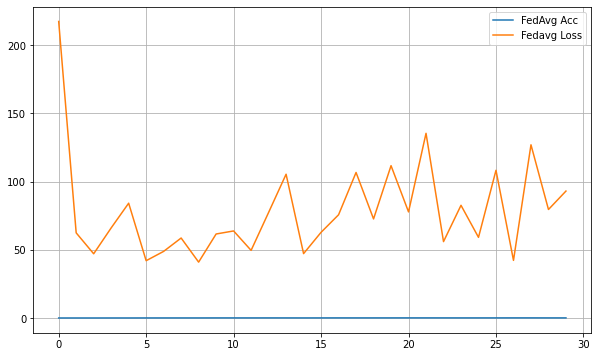

In [16]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

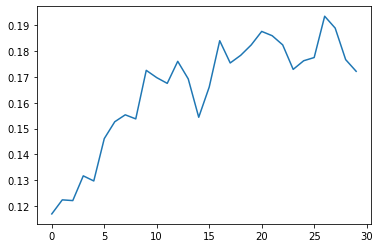

In [17]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [18]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.11696777881847488, 0.12241222353445158, 0.12213000117076767, 0.13170888995130856, 0.12973000142309402, 0.14613222289416525, 0.15266555663612155, 0.15534889019197887, 0.15377000065313445, 0.1725722226003806, 0.1697433340052764, 0.1675311118364334, 0.1760688906742467, 0.16926555625266496, 0.15440222356054517, 0.16610222342941497, 0.1840500021974246, 0.1754311126967271, 0.1784011118941837, 0.18241111321581735, 0.18765111217896147, 0.185983334067795, 0.1824377799199687, 0.1729477793806129, 0.17628777879807686, 0.17753111107481848, 0.19352444484829903, 0.18894111240903536, 0.17672555653585328, 0.17219777868853678] 

[217.4269757297304, 62.49376076724794, 47.171802692943146, 66.12067686584261, 84.23350792858335, 42.09338997602463, 48.92609625524944, 58.71774441136254, 41.05709922181236, 61.66774328284794, 63.90097386704551, 49.658868319458435, 77.44800380071004, 105.46470682356095, 47.289779859118994, 62.897069365448424, 75.7455237613784, 106.76030056476593, 72.71034289267328, 111.7409701

# FedSGD

In [19]:
acc0 = [[], [0.10000000149011612, 0.10000000149011612, 0.133200004696846, 0.10000000149011612, 0.10000000149011612, 0.10300000011920929, 0.10040000081062317, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09910000115633011, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11219999939203262, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10180000215768814], [0.16599999368190765, 0.12970000505447388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11540000140666962, 0.10000000149011612, 0.093299999833107, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10320000350475311, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10980000346899033, 0.11460000276565552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10189999639987946, 0.10000000149011612, 0.10000000149011612, 0.10220000147819519, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.08560000360012054, 0.10000000149011612, 0.13420000672340393, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10450000315904617, 0.10000000149011612, 0.14589999616146088, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612], [0.15629999339580536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12950000166893005, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13619999587535858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10689999908208847, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10480000078678131, 0.10000000149011612, 0.10459999740123749, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10509999841451645, 0.10480000078678131, 0.10000000149011612, 0.10750000178813934, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1062999963760376, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.1527000069618225, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1145000010728836, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12280000001192093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14720000326633453, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10329999774694443, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.10090000182390213, 0.10000000149011612, 0.10010000318288803, 0.1111999973654747, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10689999908208847, 0.10000000149011612, 0.12349999696016312, 0.10000000149011612, 0.10000000149011612, 0.10859999805688858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.10289999842643738], [0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10700000077486038, 0.10000000149011612, 0.10520000010728836, 0.14100000262260437, 0.14159999787807465, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15700000524520874, 0.10000000149011612, 0.1103999987244606, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12489999830722809, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.1128000020980835, 0.10000000149011612, 0.1347000002861023, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0997999981045723, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10000000149011612, 0.1023000031709671, 0.10000000149011612, 0.10000000149011612, 0.14579999446868896, 0.10840000212192535, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.14079999923706055, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1062999963760376, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10220000147819519], [0.10000000149011612, 0.1785999983549118, 0.10159999877214432, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10520000010728836, 0.10000000149011612, 0.1062999963760376, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1607999950647354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16519999504089355, 0.10000000149011612, 0.17110000550746918], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12929999828338623, 0.1412000060081482, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12960000336170197, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.10000000149011612, 0.09830000251531601, 0.10000000149011612, 0.1234000027179718, 0.10000000149011612, 0.10000000149011612, 0.09799999743700027, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14309999346733093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10260000079870224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1031000018119812, 0.09709999710321426, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.11640000343322754, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15629999339580536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.10000000149011612], [0.10000000149011612, 0.10369999706745148, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14010000228881836, 0.11749999970197678, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15610000491142273, 0.11659999936819077, 0.10000000149011612, 0.10199999809265137, 0.1080000028014183, 0.1062999963760376, 0.10429999977350235, 0.10000000149011612, 0.10779999941587448, 0.1720000058412552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12189999967813492, 0.10000000149011612, 0.10000000149011612, 0.14380000531673431, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17710000276565552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.11029999703168869, 0.10000000149011612, 0.13300000131130219, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.1266999989748001, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16060000658035278, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11569999903440475, 0.10220000147819519, 0.18140000104904175, 0.11500000208616257, 0.09989999979734421, 0.10700000077486038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.17299999296665192, 0.120899997651577, 0.12160000205039978, 0.1379999965429306, 0.17839999496936798, 0.14229999482631683, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1193000003695488, 0.10000000149011612, 0.13289999961853027, 0.10000000149011612, 0.10840000212192535, 0.10000000149011612, 0.10000000149011612, 0.13359999656677246, 0.10170000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.133200004696846, 0.10000000149011612, 0.10369999706745148, 0.10000000149011612, 0.10000000149011612], [0.10130000114440918, 0.13750000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15070000290870667, 0.10000000149011612, 0.11580000072717667, 0.10689999908208847, 0.10000000149011612, 0.10000000149011612, 0.15880000591278076, 0.10000000149011612, 0.12200000137090683, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15410000085830688, 0.18940000236034393, 0.20340000092983246, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.15790000557899475, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.1128000020980835, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17669999599456787, 0.10000000149011612, 0.10000000149011612, 0.133200004696846, 0.10000000149011612, 0.1039000004529953, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1809999942779541, 0.10000000149011612, 0.09989999979734421], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09939999878406525, 0.1868000030517578, 0.10000000149011612, 0.12489999830722809, 0.10000000149011612, 0.11330000311136246, 0.10000000149011612, 0.10000000149011612, 0.15440000593662262, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11630000174045563, 0.16290000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1046999990940094, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10939999669790268, 0.10000000149011612, 0.0908999964594841, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12559999525547028, 0.10000000149011612, 0.1826000064611435, 0.10000000149011612, 0.10000000149011612, 0.12639999389648438, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12939999997615814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19939999282360077, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11270000040531158, 0.10000000149011612, 0.10000000149011612, 0.1784999966621399, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.10360000282526016, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612], [0.10000000149011612, 0.1501999944448471, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12349999696016312, 0.10000000149011612, 0.1145000010728836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612, 0.1477999985218048, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1404999941587448, 0.14350000023841858, 0.14790000021457672], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1160999983549118, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13770000636577606, 0.10000000149011612, 0.10409999638795853, 0.10000000149011612, 0.10000000149011612, 0.1362999975681305, 0.16140000522136688, 0.15109999477863312, 0.1324000060558319, 0.10000000149011612, 0.0997999981045723, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11150000244379044, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17239999771118164], [0.12120000272989273, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14550000429153442, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1273999959230423, 0.1412000060081482, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.14710000157356262, 0.16670000553131104, 0.10000000149011612, 0.10840000212192535, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11389999836683273, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10509999841451645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1647000014781952, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10320000350475311, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13699999451637268, 0.14839999377727509, 0.11890000104904175, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10459999740123749, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11659999936819077, 0.10000000149011612, 0.10000000149011612, 0.1265999972820282, 0.10639999806880951, 0.1251000016927719, 0.17110000550746918, 0.10000000149011612, 0.17350000143051147, 0.12099999934434891, 0.10000000149011612, 0.10869999974966049, 0.11330000311136246, 0.15299999713897705, 0.10040000081062317, 0.10000000149011612, 0.11299999803304672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15230000019073486], [0.12929999828338623, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10580000281333923, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12099999934434891, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17080000042915344, 0.14020000398159027, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15189999341964722], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16769999265670776, 0.10000000149011612, 0.10010000318288803, 0.17260000109672546, 0.10000000149011612, 0.10000000149011612, 0.16910000145435333, 0.10000000149011612, 0.10010000318288803, 0.11580000072717667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10199999809265137, 0.14839999377727509, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12939999997615814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22059999406337738]]
loss0 = [[], [2.3371734619140625, 13.816401481628418, 2.308180332183838, 70.7574462890625, 15.084320068359375, 2.6393604278564453, 2.302769184112549, 53.86275100708008, 2.3421411514282227, 17.665302276611328, 59.07524490356445, 91.33684539794922, 2.3039419651031494, 7.264322757720947, 56.5817756652832, 26.737628936767578, 26.835693359375, 2.4334323406219482, 77.89741516113281, 32.81199264526367, 2.3440325260162354, 85.17453002929688, 2.3015336990356445, 2.320474863052368, 43.349754333496094, 52.92720031738281, 2.8695144653320312, 49.810340881347656, 3.171813488006592, 2.3096163272857666], [2.2858164310455322, 2.300602436065674, 2.803351640701294, 3.4395980834960938, 2.420212745666504, 8.028326988220215, 2.304863452911377, 9.359256744384766, 2.304157018661499, 26.16269302368164, 61.405601501464844, 112.92493438720703, 3.495957136154175, 4.250986099243164, 2.311041831970215, 8.31207275390625, 33.771060943603516, 15.803021430969238, 13.078191757202148, 2.3005785942077637, 7.662724018096924, 106.15450286865234, 2.306363582611084, 2.301384925842285, 2.3354928493499756, 2.375274419784546, 13.779754638671875, 8.57797622680664, 108.03475952148438, 2.312685012817383], [99.47206115722656, 2.2900571823120117, 2.298342227935791, 5.364095211029053, 2.3109912872314453, 20.40771484375, 2.3559937477111816, 4.066635608673096, 5.129487037658691, 2.2948431968688965, 17.08060073852539, 2.7819793224334717, 12.730717658996582, 5.064957618713379, 2.4545960426330566, 17.303388595581055, 2.306411027908325, 7.86132287979126, 17.079360961914062, 10.908679962158203, 35.04998016357422, 3.330242156982422, 2.300748825073242, 11.38105583190918, 2.5559191703796387, 10.052122116088867, 11.405502319335938, 2.3042430877685547, 34.577064514160156, 2.454990863800049], [2.2768590450286865, 4.612374305725098, 2.4374618530273438, 38.70996856689453, 2.3015971183776855, 11.52192211151123, 2.2953848838806152, 3.939058303833008, 2.6780154705047607, 68.30670166015625, 23.507699966430664, 2.2968521118164062, 6.239854335784912, 2.399815082550049, 65.50624084472656, 2.482219934463501, 14.817086219787598, 2.7636520862579346, 10.767165184020996, 100.84105682373047, 10.08985424041748, 28.693368911743164, 2.3029584884643555, 27.223102569580078, 2.2804582118988037, 38.50068283081055, 36.640480041503906, 6.250171184539795, 2.567598581314087, 58.83746337890625], [52.48587417602539, 52.50712585449219, 2.376971960067749, 3.9433164596557617, 2.3185057640075684, 56.36133575439453, 2.4441871643066406, 2.3876640796661377, 2.736020088195801, 2.325629472732544, 2.3084897994995117, 2.342142343521118, 82.39106750488281, 2.415257692337036, 2.6590538024902344, 2.33622145652771, 2.6974246501922607, 4.6977715492248535, 2.29974627494812, 5.294625759124756, 4.410507678985596, 9.776020050048828, 2.41198468208313, 2.318908452987671, 8.409465789794922, 2.893888235092163, 12.37010383605957, 2.304824113845825, 2.3046622276306152, 112.50602722167969], [2.4528846740722656, 16.86826515197754, 2.297170877456665, 71.6613998413086, 2.7093000411987305, 4.30375862121582, 3.751537799835205, 2.3613405227661133, 9.450776100158691, 2.7135977745056152, 2.315218925476074, 2.2915844917297363, 2.351691484451294, 2.4170749187469482, 10.792043685913086, 3.2144229412078857, 2.351158380508423, 2.2972047328948975, 10.749417304992676, 2.3089160919189453, 2.2991445064544678, 18.10143280029297, 10.02805233001709, 6.45452356338501, 2.357163190841675, 2.7585201263427734, 2.337445020675659, 2.7518997192382812, 4.143701076507568, 2.3355166912078857], [2.897550106048584, 7.415126800537109, 19.14936065673828, 27.236116409301758, 3.0147645473480225, 46.98973083496094, 40.13228988647461, 36.871273040771484, 2.9764320850372314, 3.1633658409118652, 2.5245261192321777, 4.623782634735107, 68.03096771240234, 3.042001247406006, 40.60435485839844, 2.2981388568878174, 2.3649723529815674, 6.818856239318848, 5.441880702972412, 2.501080274581909, 2.32942795753479, 2.3087823390960693, 2.412721633911133, 2.3496930599212646, 2.436953544616699, 2.269606113433838, 5.519990921020508, 3.1418776512145996, 2.9650309085845947, 2.29343581199646], [2.803339958190918, 3.361177682876587, 2.96878719329834, 5.372838020324707, 7.619142055511475, 2.3205597400665283, 2.3563809394836426, 22.581398010253906, 2.294858932495117, 2.3015389442443848, 6.992271900177002, 2.5536305904388428, 2.311262607574463, 2.34210205078125, 2.5337564945220947, 2.3962936401367188, 3.392857313156128, 2.314258098602295, 10.625438690185547, 2.3847124576568604, 2.9164018630981445, 7.9314188957214355, 2.3077988624572754, 15.825251579284668, 2.513556957244873, 3.403289556503296, 2.3018758296966553, 10.43343448638916, 5.8544793128967285, 2.4890952110290527], [4.173616886138916, 2.9083521366119385, 2.3672056198120117, 2.339566707611084, 2.2886297702789307, 18.487836837768555, 2.286625623703003, 2.293168306350708, 2.2966575622558594, 10.858199119567871, 10.398032188415527, 2.898437023162842, 13.977957725524902, 2.2961678504943848, 2.896388530731201, 2.3786468505859375, 6.7579193115234375, 8.711703300476074, 24.82866859436035, 3.16791033744812, 6.496187686920166, 3.0907042026519775, 3.281489133834839, 5.935234069824219, 3.0368404388427734, 6.065398693084717, 6.671169757843018, 2.376828670501709, 10.147594451904297, 6.816863059997559], [6.749022483825684, 2.317582130432129, 2.3811817169189453, 2.2930736541748047, 3.0238277912139893, 2.687483787536621, 4.454588413238525, 2.8848938941955566, 11.614224433898926, 11.428668975830078, 2.4845519065856934, 4.878493785858154, 2.365741014480591, 3.746051073074341, 9.954350471496582, 5.7195329666137695, 2.8517866134643555, 2.345323085784912, 2.3444862365722656, 2.8354361057281494, 8.482754707336426, 8.592621803283691, 31.263280868530273, 2.415102243423462, 4.616806983947754, 2.4253334999084473, 2.3112990856170654, 5.531688213348389, 2.43234920501709, 2.65254807472229], [8.964202880859375, 9.86622142791748, 2.3216536045074463, 4.232168674468994, 2.3166375160217285, 8.982938766479492, 2.5641419887542725, 2.285266399383545, 2.2970619201660156, 16.61086654663086, 2.435227870941162, 14.00942325592041, 2.5703792572021484, 2.334747314453125, 4.194516181945801, 2.324528694152832, 9.980085372924805, 4.037252902984619, 2.286674976348877, 2.291273355484009, 2.2967424392700195, 3.1583383083343506, 2.7173776626586914, 10.058771133422852, 5.943622589111328, 2.2820658683776855, 4.002403736114502, 15.49583911895752, 7.575197696685791, 2.287262439727783], [2.691277027130127, 2.29180908203125, 2.2994415760040283, 17.2315616607666, 2.4388461112976074, 2.2658088207244873, 4.556788444519043, 2.2968039512634277, 11.462620735168457, 15.279150009155273, 3.9086296558380127, 2.351790428161621, 18.306549072265625, 2.385589361190796, 31.325693130493164, 13.031709671020508, 10.396880149841309, 2.689361095428467, 2.3002774715423584, 5.859489917755127, 16.927490234375, 9.322138786315918, 2.28602933883667, 7.052740573883057, 4.325438499450684, 9.537545204162598, 32.90501403808594, 2.280195713043213, 2.4263575077056885, 2.2844955921173096], [17.80671501159668, 41.122093200683594, 2.3586158752441406, 7.923850059509277, 2.318814516067505, 2.2843210697174072, 3.4690442085266113, 10.007701873779297, 26.95471954345703, 2.280545949935913, 2.7248246669769287, 2.363340139389038, 2.401562213897705, 2.2914345264434814, 11.69425106048584, 2.4609475135803223, 18.478191375732422, 2.3043723106384277, 2.6883513927459717, 18.21590805053711, 2.358877420425415, 2.369985580444336, 3.464515209197998, 16.635419845581055, 2.3495848178863525, 29.331340789794922, 17.266202926635742, 22.120546340942383, 5.748340129852295, 3.173383951187134], [2.5614774227142334, 23.088756561279297, 31.18088722229004, 24.25836944580078, 2.2776200771331787, 2.3375465869903564, 5.956000328063965, 3.620025396347046, 15.748534202575684, 2.2929422855377197, 4.405564785003662, 15.007120132446289, 2.3856194019317627, 27.85858726501465, 9.028839111328125, 32.032936096191406, 2.3021669387817383, 2.332756757736206, 7.625360012054443, 13.821066856384277, 6.077929973602295, 41.55390548706055, 2.348268985748291, 2.406867027282715, 7.342763900756836, 2.4479148387908936, 7.144275665283203, 13.76536750793457, 2.452402114868164, 17.870773315429688], [15.036376953125, 2.3435521125793457, 12.903947830200195, 46.3033561706543, 3.0735690593719482, 2.257680654525757, 2.319689989089966, 20.852256774902344, 14.494587898254395, 12.046958923339844, 30.518455505371094, 2.3145289421081543, 17.284177780151367, 14.661640167236328, 4.999173641204834, 5.602452754974365, 2.7053515911102295, 2.2946090698242188, 2.2806146144866943, 33.844642639160156, 2.323599100112915, 2.310065984725952, 2.2866928577423096, 2.346334457397461, 2.5204174518585205, 2.301178216934204, 2.293142080307007, 37.05855178833008, 2.330350160598755, 14.125670433044434], [21.64779281616211, 2.42345929145813, 12.810039520263672, 5.201453685760498, 2.4437427520751953, 2.868021011352539, 24.951669692993164, 2.2951786518096924, 2.33293080329895, 38.815120697021484, 12.072129249572754, 2.3951756954193115, 2.2477729320526123, 37.35764694213867, 27.33761215209961, 12.48359203338623, 12.091917991638184, 30.245275497436523, 9.70181941986084, 2.32489013671875, 36.981380462646484, 2.738487720489502, 2.297107696533203, 2.8889875411987305, 2.283837080001831, 3.5335233211517334, 2.362502336502075, 35.5201530456543, 9.979544639587402, 4.324492931365967], [18.220016479492188, 2.35133695602417, 11.056673049926758, 12.266643524169922, 13.678918838500977, 13.627778053283691, 2.2512669563293457, 12.466897964477539, 4.156230926513672, 7.812833786010742, 7.583581447601318, 2.39715576171875, 2.502802848815918, 26.335466384887695, 2.7623867988586426, 8.21353816986084, 2.314774513244629, 4.633289813995361, 2.2864468097686768, 2.299123764038086, 2.2645263671875, 2.310755968093872, 2.365291118621826, 2.319197416305542, 2.551081418991089, 2.64418625831604, 2.31915545463562, 26.72686195373535, 25.802030563354492, 2.3160645961761475], [2.2797043323516846, 2.3019702434539795, 2.3138010501861572, 2.2772328853607178, 2.2345752716064453, 2.355682373046875, 4.053154945373535, 2.905349016189575, 23.478137969970703, 22.80962562561035, 2.3598949909210205, 3.490358591079712, 12.913251876831055, 2.2999846935272217, 7.3345046043396, 2.3088064193725586, 15.69803237915039, 2.2781457901000977, 4.675281524658203, 16.833763122558594, 2.2674670219421387, 2.289699077606201, 7.6412577629089355, 3.635516405105591, 20.456157684326172, 2.279691457748413, 9.15394115447998, 2.341095209121704, 6.5428619384765625, 4.709343433380127], [2.276193141937256, 2.576834201812744, 35.00235366821289, 7.336618900299072, 10.315877914428711, 19.44249153137207, 54.92951965332031, 2.296290636062622, 19.058128356933594, 2.3460233211517334, 2.3086578845977783, 29.43817138671875, 29.089977264404297, 2.1886324882507324, 2.3649141788482666, 2.27348256111145, 2.575742483139038, 2.3421754837036133, 30.95305633544922, 10.969155311584473, 46.6375617980957, 16.556758880615234, 2.227257013320923, 2.245678663253784, 2.24776291847229, 2.5443451404571533, 8.746702194213867, 7.401835918426514, 2.5280051231384277, 18.06082534790039], [8.552519798278809, 2.300133466720581, 12.531588554382324, 25.833141326904297, 2.3088626861572266, 2.3230035305023193, 10.330705642700195, 2.7101242542266846, 5.503661632537842, 47.616798400878906, 14.26290512084961, 2.269540786743164, 7.826540470123291, 4.753489971160889, 2.2700157165527344, 14.776874542236328, 2.287782907485962, 27.332624435424805, 35.03236389160156, 19.7541446685791, 4.317261219024658, 3.1163041591644287, 70.93132781982422, 20.272716522216797, 48.49031448364258, 26.896377563476562, 2.389132499694824, 2.2505016326904297, 66.31395721435547, 2.897742748260498], [2.7778308391571045, 24.50006866455078, 2.9090640544891357, 2.7631547451019287, 15.033939361572266, 2.3852803707122803, 2.3929812908172607, 2.25002121925354, 48.79135513305664, 2.2725093364715576, 2.843219757080078, 2.6298422813415527, 10.1423921585083, 16.42313003540039, 2.245563268661499, 2.385560989379883, 82.01046752929688, 3.9742891788482666, 2.242197036743164, 2.265377998352051, 4.351734638214111, 5.622648239135742, 4.851994514465332, 3.2816288471221924, 20.223302841186523, 20.80568504333496, 2.676558494567871, 2.2852494716644287, 4.72192907333374, 11.23255729675293], [25.90447998046875, 2.7307493686676025, 2.4387168884277344, 4.861928462982178, 2.485588550567627, 57.082767486572266, 6.463167667388916, 13.557989120483398, 12.666959762573242, 23.00150489807129, 5.828193187713623, 7.402595520019531, 13.772674560546875, 2.2854647636413574, 13.803906440734863, 2.210010051727295, 23.849365234375, 29.643821716308594, 2.332160472869873, 14.472734451293945, 27.149383544921875, 14.335565567016602, 2.2863688468933105, 35.444637298583984, 6.701651573181152, 17.330141067504883, 58.026588439941406, 2.2919938564300537, 3.7752137184143066, 6.255548477172852], [25.167695999145508, 16.59771156311035, 21.126293182373047, 3.3418726921081543, 2.3000481128692627, 49.74958801269531, 9.596007347106934, 2.2553396224975586, 7.4651408195495605, 44.5179328918457, 51.29617691040039, 26.019906997680664, 74.30106353759766, 31.14504623413086, 42.197689056396484, 77.9525146484375, 28.913618087768555, 28.73370361328125, 3.1260812282562256, 2.462583541870117, 13.946470260620117, 77.36650085449219, 2.304105758666992, 4.398483753204346, 3.293260097503662, 3.295435905456543, 13.42373275756836, 25.86475372314453, 2.3834691047668457, 28.56711196899414], [10.033055305480957, 2.3074870109558105, 6.922701358795166, 23.170122146606445, 23.936622619628906, 96.6933822631836, 2.375138998031616, 3.643057346343994, 16.324369430541992, 14.432753562927246, 21.658363342285156, 15.370290756225586, 2.3045058250427246, 33.655826568603516, 2.3419461250305176, 40.99837112426758, 7.2544779777526855, 23.59222412109375, 2.2556848526000977, 17.38884925842285, 2.895726203918457, 2.4222090244293213, 11.630971908569336, 2.385375738143921, 3.6514499187469482, 5.735363483428955, 13.590049743652344, 2.248387098312378, 2.281315326690674, 2.275390863418579], [4.9992241859436035, 48.02116394042969, 5.181712627410889, 8.040051460266113, 51.24797058105469, 2.273146390914917, 46.10233688354492, 16.905044555664062, 26.367555618286133, 2.2751951217651367, 17.619783401489258, 2.5210084915161133, 77.2095947265625, 6.977968692779541, 2.2344446182250977, 2.228912591934204, 2.3666064739227295, 2.4203553199768066, 8.021010398864746, 2.384040117263794, 3.0110654830932617, 3.512166738510132, 33.73746871948242, 2.3719277381896973, 27.681106567382812, 5.527297496795654, 34.14582061767578, 27.97318458557129, 2.8208820819854736, 2.2541229724884033], [2.276932716369629, 2.559814214706421, 38.92665481567383, 8.114897727966309, 2.217076539993286, 56.13584518432617, 72.26869201660156, 29.784677505493164, 7.457434177398682, 6.4671125411987305, 19.778947830200195, 2.277914047241211, 2.3174238204956055, 6.097614288330078, 13.317380905151367, 2.301549196243286, 19.804838180541992, 16.170297622680664, 2.3213517665863037, 2.257397174835205, 14.70779037475586, 2.5251708030700684, 44.356388092041016, 28.347152709960938, 2.34928035736084, 4.130087375640869, 2.9732606410980225, 6.328590393066406, 2.3156394958496094, 8.623817443847656], [3.13883113861084, 3.057814598083496, 16.9826602935791, 12.506112098693848, 18.71872901916504, 34.28314208984375, 32.04851150512695, 43.35490798950195, 5.753533363342285, 33.44428634643555, 9.307308197021484, 6.261575222015381, 2.3135273456573486, 3.1141397953033447, 8.811668395996094, 18.329504013061523, 2.2689363956451416, 9.222038269042969, 10.971549987792969, 12.87501049041748, 36.10810470581055, 2.4020562171936035, 58.962520599365234, 2.9380602836608887, 72.2855453491211, 5.869326591491699, 2.2610180377960205, 3.4339487552642822, 2.4796884059906006, 22.543424606323242], [10.155078887939453, 3.668527364730835, 2.291619062423706, 27.947803497314453, 10.242432594299316, 7.47747278213501, 23.328353881835938, 42.9974479675293, 2.3455567359924316, 35.52303695678711, 9.36601734161377, 2.2768235206604004, 2.3505859375, 2.3274459838867188, 2.2510623931884766, 18.514320373535156, 2.24470853805542, 2.627373456954956, 2.49421763420105, 2.5006766319274902, 2.284238576889038, 2.348862409591675, 3.3771164417266846, 43.44755935668945, 2.506946325302124, 56.64993667602539, 42.930992126464844, 60.92227554321289, 9.42504596710205, 2.349153995513916], [2.3036954402923584, 23.61018943786621, 2.5947160720825195, 33.31150436401367, 27.96396255493164, 2.3001511096954346, 3.161764144897461, 26.365625381469727, 19.837932586669922, 4.758722305297852, 122.17271423339844, 3.074615955352783, 12.048490524291992, 2.2319531440734863, 12.636082649230957, 18.084444046020508, 12.795910835266113, 48.532691955566406, 47.92387008666992, 2.2030746936798096, 2.2634222507476807, 22.927011489868164, 2.5367355346679688, 17.5705509185791, 8.044188499450684, 18.833206176757812, 43.85745620727539, 17.658689498901367, 21.245290756225586, 2.301248550415039], [37.18132400512695, 3.2721643447875977, 11.139480590820312, 2.208653211593628, 12.798912048339844, 3.7483534812927246, 2.237025022506714, 23.475032806396484, 38.516597747802734, 2.2516298294067383, 40.980804443359375, 2.6147732734680176, 2.3841190338134766, 28.09457778930664, 3.8366575241088867, 7.940552234649658, 25.217531204223633, 39.87103271484375, 2.381779432296753, 2.2873449325561523, 7.15557336807251, 25.60240364074707, 7.36286735534668, 14.605610847473145, 2.3066680431365967, 15.760893821716309, 43.90977096557617, 12.490504264831543, 11.29422378540039, 2.2827723026275635]] 

acc1 = [[], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10570000112056732, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10090000182390213, 0.09849999845027924, 0.10000000149011612, 0.10000000149011612, 0.12839999794960022, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10109999775886536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10949999839067459, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.13680000603199005, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.09969999641180038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10939999669790268, 0.10000000149011612, 0.10249999910593033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10520000010728836, 0.09449999779462814, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10989999771118164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1014999970793724, 0.10000000149011612, 0.11190000176429749, 0.10000000149011612, 0.10000000149011612], [0.11479999870061874, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10379999876022339, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.11129999905824661, 0.10000000149011612, 0.10000000149011612, 0.10729999840259552, 0.13019999861717224, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13840000331401825, 0.11959999799728394, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935], [0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10189999639987946, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.08659999817609787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10379999876022339], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.1624000072479248, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10260000079870224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15479999780654907, 0.10369999706745148], [0.10000000149011612, 0.1315000057220459, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12839999794960022, 0.10890000313520432, 0.12470000237226486, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14059999585151672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12780000269412994, 0.13779999315738678, 0.10000000149011612, 0.10000000149011612, 0.11349999904632568, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1573999971151352, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10819999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10660000145435333, 0.10000000149011612, 0.10819999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10890000313520432, 0.10000000149011612, 0.10159999877214432, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.13079999387264252, 0.10000000149011612, 0.10000000149011612, 0.15889999270439148, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11159999668598175, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13950000703334808, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12359999865293503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10209999978542328, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12049999833106995, 0.10000000149011612, 0.10000000149011612, 0.1687999963760376, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10499999672174454, 0.16110000014305115, 0.11879999935626984, 0.10000000149011612, 0.14740000665187836, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.16979999840259552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.1875, 0.15539999306201935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14319999516010284, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10249999910593033, 0.16449999809265137, 0.11550000309944153, 0.10000000149011612, 0.10000000149011612, 0.18050000071525574, 0.10400000214576721], [0.10000000149011612, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.12680000066757202, 0.10849999636411667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15610000491142273, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11289999634027481, 0.1251000016927719, 0.10000000149011612, 0.10000000149011612, 0.11749999970197678, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.11779999732971191, 0.10000000149011612, 0.13930000364780426, 0.14419999718666077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10400000214576721, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11460000276565552, 0.10000000149011612, 0.16050000488758087, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11840000003576279, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15700000524520874, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17900000512599945, 0.10000000149011612, 0.17669999599456787, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.186599999666214, 0.1273999959230423, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10499999672174454, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1462000012397766, 0.10000000149011612, 0.10499999672174454], [0.09889999777078629, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17649999260902405, 0.10000000149011612, 0.12729999423027039, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13249999284744263, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10790000110864639, 0.14219999313354492, 0.10000000149011612, 0.12549999356269836, 0.15780000388622284], [0.10000000149011612, 0.12809999287128448, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1662999987602234, 0.16990000009536743, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1451999992132187, 0.10000000149011612, 0.10000000149011612, 0.11670000106096268, 0.10000000149011612, 0.10000000149011612, 0.10760000348091125, 0.17000000178813934, 0.10480000078678131, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1080000028014183, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.12200000137090683, 0.10000000149011612, 0.12559999525547028, 0.15809999406337738, 0.1137000024318695, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17239999771118164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14239999651908875, 0.10000000149011612, 0.15880000591278076, 0.10000000149011612, 0.10639999806880951, 0.10000000149011612, 0.10000000149011612, 0.10409999638795853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16519999504089355, 0.1386999934911728, 0.10000000149011612, 0.1379999965429306, 0.14470000565052032, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.147599995136261, 0.10260000079870224, 0.12039999663829803, 0.11680000275373459, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10189999639987946, 0.10130000114440918, 0.10000000149011612, 0.10509999841451645, 0.10429999977350235, 0.10000000149011612, 0.1257999986410141], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14550000429153442, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11879999935626984, 0.10000000149011612, 0.10000000149011612, 0.12600000202655792, 0.10000000149011612, 0.10159999877214432, 0.14000000059604645, 0.16840000450611115, 0.10000000149011612, 0.10000000149011612, 0.17749999463558197, 0.14949999749660492, 0.10000000149011612, 0.10000000149011612, 0.12439999729394913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1088000014424324, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2071000039577484, 0.10000000149011612, 0.12030000239610672, 0.10000000149011612, 0.10000000149011612, 0.18330000340938568, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1298000067472458, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13249999284744263, 0.22910000383853912, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13099999725818634, 0.10689999908208847, 0.10000000149011612, 0.10000000149011612], [0.1868000030517578, 0.10000000149011612, 0.164000004529953, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10109999775886536, 0.10000000149011612, 0.12430000305175781, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2167000025510788, 0.13699999451637268, 0.10000000149011612, 0.13369999825954437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18440000712871552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12370000034570694, 0.10000000149011612, 0.16660000383853912, 0.10000000149011612], [0.14399999380111694, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14480000734329224, 0.15119999647140503, 0.10180000215768814, 0.10000000149011612, 0.14390000700950623, 0.12890000641345978, 0.10000000149011612, 0.18880000710487366, 0.1324000060558319, 0.10000000149011612, 0.10000000149011612, 0.12030000239610672, 0.10000000149011612], [0.15039999783039093, 0.1597999930381775, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19030000269412994, 0.12240000069141388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1160999983549118, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17219999432563782, 0.10000000149011612, 0.1429000049829483, 0.15700000524520874, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18469999730587006, 0.10000000149011612, 0.10450000315904617, 0.10000000149011612], [0.11890000104904175, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16030000150203705, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18250000476837158, 0.1550000011920929, 0.17389999330043793, 0.1256999969482422], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11349999904632568, 0.10000000149011612, 0.14350000023841858, 0.10000000149011612, 0.1096000000834465, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18629999458789825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19220000505447388, 0.1451999992132187, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2071000039577484, 0.11940000206232071, 0.1949000060558319, 0.10000000149011612, 0.16439999639987946, 0.10000000149011612], [0.10000000149011612, 0.14259999990463257, 0.10000000149011612, 0.10570000112056732, 0.10000000149011612, 0.1615999937057495, 0.15790000557899475, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17820000648498535, 0.10000000149011612, 0.13529999554157257, 0.10000000149011612, 0.10000000149011612, 0.13410000503063202, 0.10000000149011612, 0.20239999890327454, 0.10300000011920929, 0.18459999561309814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.1412000060081482, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19040000438690186, 0.10000000149011612, 0.11400000005960464, 0.10000000149011612, 0.1006999984383583, 0.1120000034570694, 0.10000000149011612, 0.11739999800920486, 0.10000000149011612, 0.14710000157356262, 0.19529999792575836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14159999787807465, 0.10000000149011612, 0.10000000149011612, 0.12189999967813492, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.16509999334812164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10559999942779541, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10080000013113022, 0.1143999993801117, 0.10000000149011612, 0.10830000042915344, 0.10000000149011612, 0.10000000149011612, 0.11630000174045563, 0.10000000149011612, 0.10000000149011612, 0.2184000015258789, 0.10000000149011612, 0.10000000149011612, 0.11299999803304672, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11990000307559967, 0.10000000149011612, 0.11240000277757645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19329999387264252, 0.10000000149011612, 0.14219999313354492, 0.10000000149011612, 0.13510000705718994, 0.14820000529289246, 0.20350000262260437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612]]
loss1 = [[], [28.803232192993164, 29.23842430114746, 51.578094482421875, 39.31050109863281, 2.2994325160980225, 81.67220306396484, 76.45925903320312, 31.589374542236328, 41.27607345581055, 137.12156677246094, 79.30195617675781, 22.75429344177246, 22.832244873046875, 20.440074920654297, 2.338754415512085, 2.3034372329711914, 41.07252883911133, 2.330061197280884, 2.3000364303588867, 21.75755500793457, 5.54606294631958, 2.3428258895874023, 19.517902374267578, 2.3824045658111572, 113.98367309570312, 12.410910606384277, 25.134471893310547, 34.90903091430664, 2.5133309364318848, 38.40994644165039], [123.98958587646484, 2.330291986465454, 2.334371566772461, 2.3731348514556885, 55.60600662231445, 75.5542221069336, 9.358405113220215, 32.38190841674805, 8.564226150512695, 8.859432220458984, 30.983837127685547, 83.39155578613281, 2.605591297149658, 2.5140366554260254, 2.504882335662842, 2.720215320587158, 15.59372615814209, 26.20901870727539, 39.34970474243164, 2.316556930541992, 2.660522222518921, 5.864588260650635, 14.261632919311523, 2.3006958961486816, 87.7320327758789, 2.3352088928222656, 2.449273109436035, 2.3288848400115967, 2.3506383895874023, 29.559791564941406], [10.234770774841309, 2.3573877811431885, 66.07919311523438, 3.4946887493133545, 28.67822265625, 2.300682783126831, 103.45558166503906, 2.303997039794922, 12.412931442260742, 19.321640014648438, 2.6170825958251953, 80.64567565917969, 2.3244431018829346, 2.2984044551849365, 2.309619426727295, 10.55735969543457, 2.3126378059387207, 59.36502456665039, 2.469165325164795, 23.079320907592773, 2.454124689102173, 52.17473220825195, 3.35690975189209, 7.099908828735352, 6.257441997528076, 2.301736831665039, 2.379281520843506, 2.298348903656006, 30.862974166870117, 2.406343460083008], [2.297455310821533, 16.293851852416992, 40.82411575317383, 23.157405853271484, 2.299354076385498, 2.3520262241363525, 17.032915115356445, 10.838566780090332, 2.3306922912597656, 11.949182510375977, 2.5282843112945557, 3.4063847064971924, 27.07692527770996, 2.339937925338745, 24.724647521972656, 2.343642234802246, 2.7224936485290527, 2.311471939086914, 2.3415870666503906, 2.324681520462036, 2.2962114810943604, 2.285677433013916, 39.43654251098633, 2.308281660079956, 57.32706069946289, 44.58317947387695, 17.68468475341797, 59.529457092285156, 11.927714347839355, 4.060896873474121], [61.83346176147461, 12.835043907165527, 11.934627532958984, 2.784555435180664, 2.3850793838500977, 5.153789520263672, 2.3434019088745117, 4.415683269500732, 2.2982542514801025, 2.293487071990967, 15.821934700012207, 12.302118301391602, 19.97296714782715, 63.398231506347656, 33.66730499267578, 78.5964126586914, 2.327728509902954, 35.15497970581055, 37.6234016418457, 41.16082000732422, 36.61069869995117, 23.939983367919922, 30.35448455810547, 33.25771713256836, 2.621579647064209, 2.4731504917144775, 15.829145431518555, 70.31016540527344, 48.97199630737305, 2.7352941036224365], [74.9985122680664, 2.3016908168792725, 2.439713954925537, 2.337625026702881, 2.317819833755493, 8.259238243103027, 2.302407741546631, 28.6269474029541, 2.31907057762146, 10.029653549194336, 18.58053970336914, 30.41643524169922, 59.019004821777344, 49.356239318847656, 19.196962356567383, 12.254884719848633, 2.9292073249816895, 2.3264293670654297, 14.910843849182129, 6.392903804779053, 4.546234130859375, 4.670482635498047, 25.373003005981445, 15.77483081817627, 2.2945334911346436, 22.838592529296875, 85.045166015625, 37.48359680175781, 20.223602294921875, 2.3766510486602783], [52.38446044921875, 2.5094358921051025, 2.6682522296905518, 11.68287181854248, 2.31030535697937, 2.3422045707702637, 47.2080192565918, 18.99439811706543, 2.4690895080566406, 13.705633163452148, 6.128355026245117, 2.308298110961914, 2.285811424255371, 3.0176424980163574, 14.132170677185059, 2.356984853744507, 63.89325714111328, 14.571390151977539, 2.3233420848846436, 6.92127799987793, 4.921118259429932, 55.890869140625, 12.311437606811523, 2.4667015075683594, 50.25726318359375, 109.35807800292969, 37.39789581298828, 12.501937866210938, 2.2967026233673096, 2.345182418823242], [29.075468063354492, 2.2942166328430176, 2.4272639751434326, 2.4960856437683105, 28.24929428100586, 16.134334564208984, 45.43561935424805, 2.341925859451294, 2.285186529159546, 2.2917611598968506, 2.3732223510742188, 4.719843864440918, 5.426199913024902, 2.8966007232666016, 7.354038238525391, 2.289358139038086, 56.4148063659668, 2.4042160511016846, 4.34080171585083, 15.486790657043457, 2.289461612701416, 2.2999002933502197, 2.3016574382781982, 2.8372104167938232, 2.379683017730713, 3.038831949234009, 2.2890067100524902, 3.2037439346313477, 3.966416358947754, 15.777299880981445], [24.595687866210938, 46.94157028198242, 9.224830627441406, 25.0875244140625, 2.3991739749908447, 69.41697692871094, 41.80756378173828, 42.63262939453125, 2.32832932472229, 7.880405426025391, 37.82235336303711, 9.031991004943848, 7.083235740661621, 2.394850015640259, 9.934412956237793, 50.15493392944336, 10.171204566955566, 2.331615686416626, 2.2994887828826904, 24.79395866394043, 2.2826039791107178, 7.224075794219971, 29.747474670410156, 7.2178544998168945, 19.527822494506836, 2.27138090133667, 2.9586341381073, 2.7527287006378174, 23.691505432128906, 43.72319412231445], [13.872361183166504, 14.286541938781738, 2.281315326690674, 55.8872184753418, 2.380812406539917, 2.3209805488586426, 82.44400787353516, 31.499418258666992, 2.331625461578369, 2.3384459018707275, 2.321094512939453, 20.977317810058594, 12.943733215332031, 61.138370513916016, 65.50763702392578, 63.11418151855469, 11.282098770141602, 31.52358055114746, 104.24996948242188, 2.2953317165374756, 5.0361857414245605, 57.9731559753418, 31.4649600982666, 5.3356451988220215, 2.305103302001953, 19.393230438232422, 29.482322692871094, 6.303499698638916, 2.336420774459839, 2.44179105758667], [2.531018018722534, 9.998215675354004, 3.6017682552337646, 2.339900255203247, 2.328366279602051, 2.4754340648651123, 4.579301357269287, 60.85715103149414, 2.3168437480926514, 3.049520969390869, 3.096731185913086, 84.88801574707031, 2.330254554748535, 4.616079330444336, 9.382088661193848, 3.8909754753112793, 5.8109283447265625, 2.358274221420288, 3.7244937419891357, 2.8453686237335205, 2.2914137840270996, 4.306934833526611, 2.3441741466522217, 142.07997131347656, 2.2747325897216797, 2.8838396072387695, 2.413417100906372, 3.6882145404815674, 2.304382562637329, 2.46008038520813], [3.165314197540283, 2.303945779800415, 2.3145880699157715, 9.934908866882324, 25.340986251831055, 4.226654529571533, 22.62116813659668, 18.058019638061523, 14.8031644821167, 2.7494311332702637, 8.278037071228027, 2.2795798778533936, 2.3469669818878174, 2.2699198722839355, 8.628650665283203, 8.638608932495117, 11.699378967285156, 2.687746047973633, 26.637380599975586, 2.341430187225342, 14.288437843322754, 12.733085632324219, 24.52859878540039, 2.499098777770996, 2.267503499984741, 2.2877285480499268, 26.550119400024414, 42.374454498291016, 2.283374309539795, 2.389793634414673], [55.27071762084961, 2.735659599304199, 2.520143747329712, 3.36191987991333, 2.233201026916504, 2.285189628601074, 24.069854736328125, 48.03920364379883, 6.16749382019043, 14.951433181762695, 3.2458674907684326, 9.34477710723877, 46.13656997680664, 14.497167587280273, 2.283477544784546, 2.386691093444824, 8.15989875793457, 8.85855484008789, 9.108366012573242, 29.110837936401367, 4.5378828048706055, 30.05783462524414, 2.2789950370788574, 2.2601704597473145, 10.8845796585083, 2.4543063640594482, 2.338592290878296, 10.449623107910156, 14.463233947753906, 9.197907447814941], [8.684419631958008, 57.56018829345703, 2.371551036834717, 3.423541784286499, 2.285421371459961, 2.279650926589966, 43.03053283691406, 43.912418365478516, 3.425489902496338, 2.327279567718506, 94.90663146972656, 15.73071575164795, 3.636216402053833, 3.2482378482818604, 53.59104919433594, 2.293102979660034, 35.00394058227539, 9.10981273651123, 11.530436515808105, 11.447773933410645, 28.61099624633789, 12.700871467590332, 10.879090309143066, 5.837072372436523, 90.24861145019531, 26.640586853027344, 2.2841949462890625, 21.758098602294922, 69.71097564697266, 33.970672607421875], [6.270090103149414, 7.740277290344238, 10.546022415161133, 2.2320311069488525, 16.874528884887695, 24.91985321044922, 25.832019805908203, 23.650774002075195, 15.896476745605469, 21.146312713623047, 2.2704296112060547, 14.353404998779297, 2.274869203567505, 63.45394515991211, 2.384103298187256, 26.934165954589844, 7.254886150360107, 2.265928030014038, 2.303741693496704, 3.30336332321167, 32.29068374633789, 19.020008087158203, 2.335973024368286, 14.076624870300293, 26.719268798828125, 100.3899917602539, 20.35016632080078, 2.3660731315612793, 3.7182230949401855, 2.3753538131713867], [2.286891222000122, 2.6168649196624756, 16.55470085144043, 2.357736825942993, 124.87789916992188, 17.728788375854492, 2.2268826961517334, 16.138051986694336, 2.284526824951172, 55.00159454345703, 33.14327621459961, 28.640575408935547, 26.325580596923828, 15.159012794494629, 2.832165002822876, 16.936140060424805, 15.475482940673828, 18.344728469848633, 26.746606826782227, 45.16515350341797, 2.3063182830810547, 8.933267593383789, 13.660603523254395, 8.72636604309082, 26.937284469604492, 2.3340089321136475, 2.276705741882324, 5.299271583557129, 2.2669854164123535, 2.2691915035247803], [22.195270538330078, 2.2326064109802246, 17.18858528137207, 37.01529312133789, 33.90166091918945, 13.199838638305664, 8.008565902709961, 59.46791076660156, 2.277658700942993, 2.424368381500244, 61.97968673706055, 3.38486909866333, 18.46691131591797, 2.210914134979248, 8.413887023925781, 4.718424320220947, 2.320662498474121, 5.7451863288879395, 7.904569625854492, 2.2793524265289307, 2.224290132522583, 3.723203182220459, 104.99833679199219, 26.952444076538086, 9.846732139587402, 7.8970255851745605, 10.277259826660156, 3.622457504272461, 58.017669677734375, 16.129901885986328], [45.58057403564453, 2.3085811138153076, 8.773515701293945, 2.6101484298706055, 2.2633283138275146, 2.357529640197754, 114.97695922851562, 3.034552812576294, 23.84769058227539, 13.852590560913086, 13.231673240661621, 2.254709005355835, 44.646873474121094, 11.647305488586426, 113.87447357177734, 2.2908685207366943, 12.101426124572754, 2.3308308124542236, 5.905066013336182, 2.421903610229492, 4.44728422164917, 44.717105865478516, 2.30653977394104, 30.154150009155273, 4.033874034881592, 11.354424476623535, 17.68039321899414, 4.507393836975098, 17.27396011352539, 28.957805633544922], [86.77108001708984, 25.400894165039062, 9.716551780700684, 2.2636067867279053, 2.223667621612549, 94.99723052978516, 2.3178694248199463, 2.277094841003418, 133.13768005371094, 22.244949340820312, 101.0246353149414, 2.323070526123047, 2.4727718830108643, 2.27382493019104, 2.2933506965637207, 24.409624099731445, 9.668452262878418, 2.441270351409912, 8.310171127319336, 67.81431579589844, 50.426998138427734, 8.036513328552246, 4.568610668182373, 2.4514834880828857, 4.100476264953613, 23.447919845581055, 2.3360912799835205, 2.425171375274658, 16.45053482055664, 2.275644302368164], [23.512544631958008, 76.62043762207031, 9.685057640075684, 2.279097557067871, 128.45980834960938, 74.82108306884766, 20.43901252746582, 2.41348934173584, 4.840179920196533, 160.4274444580078, 2.3393735885620117, 2.511742115020752, 3.01557993888855, 2.2789716720581055, 2.2617251873016357, 31.806947708129883, 128.90817260742188, 2.2614004611968994, 2.222207546234131, 29.47566032409668, 28.927228927612305, 2.3423686027526855, 12.620991706848145, 33.451194763183594, 5.292115688323975, 3.070427179336548, 51.902427673339844, 12.697747230529785, 25.966896057128906, 29.95488739013672], [34.61564636230469, 23.63096809387207, 2.274862289428711, 8.200241088867188, 2.292440891265869, 19.268152236938477, 3.4104506969451904, 2.267059087753296, 30.701152801513672, 35.21742248535156, 22.587921142578125, 114.88633728027344, 45.648590087890625, 2.431424140930176, 29.1086368560791, 83.23231506347656, 37.84901809692383, 2.495189666748047, 72.57865905761719, 49.62911605834961, 41.30738067626953, 2.277811288833618, 2.1931965351104736, 35.90838623046875, 72.0965347290039, 53.46517562866211, 2.2854933738708496, 3.252322196960449, 91.19891357421875, 85.91973876953125], [2.3513176441192627, 94.93364715576172, 2.2603187561035156, 22.358659744262695, 2.4648118019104004, 2.8740108013153076, 5.130071640014648, 2.648636817932129, 29.959558486938477, 2.283008337020874, 70.14852142333984, 29.790246963500977, 2.4572770595550537, 2.1841583251953125, 2.260605812072754, 20.538427352905273, 2.2899954319000244, 2.9844985008239746, 22.062850952148438, 65.56031036376953, 2.2714638710021973, 28.7114315032959, 9.599183082580566, 17.983034133911133, 17.797147750854492, 18.47528648376465, 2.3253986835479736, 46.18573760986328, 2.314807891845703, 22.556493759155273], [2.888324737548828, 74.45320892333984, 27.24565315246582, 7.417768955230713, 9.765828132629395, 26.94257164001465, 125.56538391113281, 31.38802146911621, 11.264718055725098, 8.829654693603516, 29.6761474609375, 23.031129837036133, 8.611356735229492, 48.11086654663086, 70.88383483886719, 140.76715087890625, 37.099884033203125, 2.334703207015991, 2.2221128940582275, 3.439615249633789, 2.5742838382720947, 2.4740540981292725, 3.0145819187164307, 26.34747886657715, 2.2684457302093506, 2.2480506896972656, 19.28403663635254, 11.539788246154785, 2.7488365173339844, 127.20657348632812], [2.2767677307128906, 3.2804038524627686, 28.380409240722656, 38.39897918701172, 48.153263092041016, 176.38368225097656, 2.2963225841522217, 2.3335342407226562, 50.3239860534668, 72.85296630859375, 20.567420959472656, 2.3589773178100586, 35.083580017089844, 17.97926902770996, 132.35862731933594, 23.310771942138672, 57.1642951965332, 2.2880971431732178, 33.72814178466797, 2.201706647872925, 2.293879508972168, 123.22515106201172, 11.380796432495117, 44.85258102416992, 29.690147399902344, 4.374301910400391, 2.2201828956604004, 18.78282928466797, 3.159552574157715, 37.43148422241211], [2.4107534885406494, 32.24635696411133, 66.9365463256836, 20.94855308532715, 22.326610565185547, 41.08562088012695, 29.617412567138672, 30.985408782958984, 71.61869049072266, 29.818584442138672, 9.55512523651123, 2.296799898147583, 8.655654907226562, 21.070039749145508, 50.122867584228516, 94.82440948486328, 130.00523376464844, 34.44115447998047, 128.6038055419922, 17.06226921081543, 7.044170379638672, 28.154922485351562, 31.55365562438965, 18.629169464111328, 54.10487365722656, 21.676441192626953, 2.329202651977539, 2.5199062824249268, 2.228550434112549, 2.7298460006713867], [80.45936584472656, 71.5855941772461, 44.52423095703125, 2.2908248901367188, 35.89874267578125, 2.29670786857605, 68.11109924316406, 2.2603096961975098, 54.781585693359375, 115.8009262084961, 103.67585754394531, 20.106666564941406, 11.93054485321045, 2.853184938430786, 12.836835861206055, 2.180997848510742, 84.12110137939453, 60.081275939941406, 27.080928802490234, 2.2080018520355225, 2.942030429840088, 12.724370002746582, 29.670089721679688, 38.52817916870117, 2.1906139850616455, 2.2296342849731445, 2.3938820362091064, 47.66716384887695, 2.240689277648926, 27.8435115814209], [55.65321731567383, 2.4057281017303467, 13.945652961730957, 2.767503023147583, 9.18655776977539, 2.2317938804626465, 2.2353105545043945, 24.298038482666016, 79.97813415527344, 25.011322021484375, 3.803920030593872, 36.015892028808594, 55.967201232910156, 2.3712456226348877, 6.89627742767334, 2.3353826999664307, 32.582801818847656, 46.49409103393555, 2.352689743041992, 7.015451431274414, 2.1895813941955566, 2.5602176189422607, 2.2711501121520996, 56.16914367675781, 20.99675178527832, 76.21575164794922, 42.770179748535156, 76.03685760498047, 29.987274169921875, 2.691357135772705], [13.154768943786621, 2.424172878265381, 133.90396118164062, 64.12506866455078, 61.6663932800293, 135.4955291748047, 154.19223022460938, 6.982354640960693, 2.1745855808258057, 30.445714950561523, 2.314007520675659, 4.551651477813721, 3.403700351715088, 7.014069557189941, 29.887908935546875, 2.5579535961151123, 43.1731071472168, 2.2788596153259277, 2.1617953777313232, 160.66880798339844, 187.242919921875, 129.913818359375, 11.375619888305664, 38.00007629394531, 2.381021738052368, 86.15714263916016, 39.800201416015625, 2.9256701469421387, 3.4184792041778564, 14.519367218017578], [35.63250732421875, 6.6679182052612305, 2.224519729614258, 6.257605075836182, 25.61223030090332, 15.762354850769043, 62.641517639160156, 3.2863969802856445, 32.99462890625, 67.99095916748047, 28.981794357299805, 115.17281341552734, 14.371670722961426, 2.7156295776367188, 2.54954195022583, 4.307738304138184, 117.87958526611328, 4.6175408363342285, 42.593727111816406, 73.671630859375, 2.3688771724700928, 35.86812973022461, 63.54901123046875, 2.1800971031188965, 43.93950653076172, 10.943960189819336, 3.1872599124908447, 57.39861297607422, 52.48110580444336, 2.372723340988159], [30.250812530517578, 15.932720184326172, 25.275806427001953, 2.222905397415161, 6.882416248321533, 2.302976131439209, 103.8114242553711, 75.79735565185547, 34.81556701660156, 43.664276123046875, 2.2855565547943115, 35.74213790893555, 2.2499983310699463, 19.555219650268555, 2.268242359161377, 2.2635412216186523, 2.2044363021850586, 53.34410095214844, 3.7971057891845703, 89.98626708984375, 13.690924644470215, 24.402141571044922, 63.604129791259766, 13.576688766479492, 137.87158203125, 31.15357780456543, 2.6083121299743652, 64.20359802246094, 29.306371688842773, 2.493805170059204]] 

acc2 = [[], [0.11569999903440475, 0.10000000149011612, 0.08820000290870667, 0.10000000149011612, 0.10000000149011612, 0.15929999947547913, 0.10000000149011612, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10670000314712524, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10540000349283218, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16670000553131104, 0.1096000000834465, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10209999978542328, 0.10000000149011612, 0.13189999759197235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10520000010728836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10570000112056732, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14219999313354492, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15160000324249268, 0.1103999987244606, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.11400000005960464, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.12939999997615814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10980000346899033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10760000348091125, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10999999940395355, 0.10000000149011612, 0.10289999842643738, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10239999741315842, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508], [0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10249999910593033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10520000010728836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11209999769926071, 0.10000000149011612], [0.120899997651577, 0.10000000149011612, 0.12690000236034393, 0.09960000216960907, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09960000216960907, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10909999907016754, 0.18790000677108765, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.12680000066757202, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.1216999962925911, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1136000007390976], [0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.15610000491142273, 0.10000000149011612, 0.1476999968290329, 0.10000000149011612, 0.10000000149011612, 0.14810000360012054, 0.15479999780654907, 0.1363999992609024, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10090000182390213, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15080000460147858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10509999841451645, 0.10000000149011612, 0.10000000149011612, 0.1867000013589859, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16339999437332153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10930000245571136, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11810000240802765, 0.10000000149011612, 0.1696999967098236, 0.17239999771118164, 0.10329999774694443, 0.10000000149011612, 0.10360000282526016, 0.10000000149011612, 0.10000000149011612, 0.14810000360012054, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13519999384880066, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10220000147819519, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1664000004529953, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1657000035047531, 0.10189999639987946, 0.1152999997138977, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.1590999960899353, 0.10000000149011612, 0.10000000149011612, 0.14710000157356262, 0.10000000149011612, 0.13930000364780426, 0.10000000149011612, 0.10000000149011612, 0.16380000114440918, 0.1420000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.133200004696846, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.16110000014305115, 0.10000000149011612, 0.15119999647140503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12200000137090683], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10559999942779541, 0.10000000149011612, 0.10000000149011612, 0.10109999775886536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1761000007390976, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.08869999647140503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1445000022649765, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12790000438690186, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11469999700784683, 0.13359999656677246, 0.15919999778270721, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.13359999656677246, 0.10000000149011612, 0.10000000149011612, 0.1632000058889389, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15240000188350677, 0.10000000149011612, 0.10000000149011612, 0.13120000064373016, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14720000326633453, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10840000212192535, 0.12919999659061432, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10790000110864639, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10159999877214432, 0.11289999634027481, 0.15629999339580536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14110000431537628, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10360000282526016, 0.10000000149011612, 0.10000000149011612, 0.13040000200271606, 0.10000000149011612, 0.10429999977350235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864], [0.1005999967455864, 0.10000000149011612, 0.10000000149011612, 0.1420000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1535000056028366, 0.10040000081062317, 0.10000000149011612, 0.1096000000834465, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10189999639987946, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.1282999962568283, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10840000212192535, 0.10000000149011612, 0.10100000351667404, 0.10180000215768814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15369999408721924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1356000006198883], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18230000138282776, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.12780000269412994, 0.10000000149011612, 0.10000000149011612, 0.14820000529289246, 0.10000000149011612, 0.10000000149011612, 0.12189999967813492, 0.1793999969959259, 0.10000000149011612, 0.10000000149011612, 0.10790000110864639, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16089999675750732], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10649999976158142, 0.10000000149011612, 0.14309999346733093, 0.156700000166893, 0.1282999962568283, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14650000631809235, 0.10000000149011612, 0.10000000149011612, 0.11659999936819077, 0.16349999606609344, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10090000182390213, 0.11940000206232071, 0.10000000149011612], [0.10000000149011612, 0.11069999635219574, 0.10000000149011612, 0.10100000351667404, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2312999963760376, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10599999874830246, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612, 0.19539999961853027, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13130000233650208, 0.1046999990940094, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13490000367164612, 0.1273999959230423, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09189999848604202, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10849999636411667, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10239999741315842, 0.10000000149011612, 0.10000000149011612, 0.1728000044822693, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18770000338554382, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14880000054836273, 0.10000000149011612, 0.11559999734163284, 0.10000000149011612, 0.17890000343322754, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.16419999301433563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12439999729394913, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10040000081062317, 0.10000000149011612, 0.12970000505447388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10000000149011612, 0.09929999709129333, 0.10140000283718109, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.1655000001192093, 0.10000000149011612], [0.10000000149011612, 0.11749999970197678, 0.10000000149011612, 0.10000000149011612, 0.10970000177621841, 0.1784999966621399, 0.10239999741315842, 0.10000000149011612, 0.10000000149011612, 0.16050000488758087, 0.10000000149011612, 0.10000000149011612, 0.16220000386238098, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727, 0.10000000149011612, 0.10000000149011612, 0.10289999842643738, 0.10000000149011612, 0.16990000009536743, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.11800000071525574, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10429999977350235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20319999754428864, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17669999599456787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1712999939918518, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10209999978542328], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.164000004529953, 0.10000000149011612, 0.18039999902248383, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15330000221729279, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15929999947547913, 0.15719999372959137, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10199999809265137, 0.14990000426769257, 0.10000000149011612, 0.15459999442100525, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10080000013113022, 0.24490000307559967, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10909999907016754, 0.11079999804496765, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1800999939441681, 0.10000000149011612, 0.11240000277757645, 0.10000000149011612, 0.1006999984383583, 0.17249999940395355, 0.10000000149011612, 0.10000000149011612]]
loss2 = [[], [2.303281545639038, 6.563013076782227, 2.3190643787384033, 6.401333808898926, 45.48486328125, 2.7047362327575684, 100.93463897705078, 23.286588668823242, 2.4860401153564453, 66.54277801513672, 66.18035888671875, 2.395728826522827, 2.6495680809020996, 12.32895278930664, 29.2163028717041, 30.714624404907227, 16.80120086669922, 58.5452880859375, 23.490398406982422, 101.88241577148438, 3.060136318206787, 2.3082587718963623, 51.101444244384766, 51.01947784423828, 24.742891311645508, 2.344514846801758, 4.427192211151123, 146.10989379882812, 29.38932228088379, 89.36385345458984], [12.252076148986816, 42.54243469238281, 110.737548828125, 14.527912139892578, 44.567161560058594, 70.44891357421875, 72.08106994628906, 2.5454888343811035, 2.3105013370513916, 41.319236755371094, 28.5614070892334, 64.51445770263672, 11.259288787841797, 9.49409294128418, 2.7542715072631836, 2.5698723793029785, 2.3021833896636963, 25.778522491455078, 32.85483932495117, 20.05237579345703, 59.403804779052734, 2.3025014400482178, 2.372990608215332, 9.432860374450684, 2.379326105117798, 32.85002517700195, 2.344229221343994, 14.368498802185059, 2.310939311981201, 26.638309478759766], [8.240504264831543, 69.53488159179688, 85.98975372314453, 9.283058166503906, 4.378987789154053, 20.026412963867188, 37.76567840576172, 2.412236452102661, 23.118167877197266, 36.898406982421875, 9.707185745239258, 4.072912693023682, 9.162984848022461, 2.3031253814697266, 19.10148811340332, 2.2995872497558594, 2.5042805671691895, 2.458319902420044, 123.60710906982422, 23.518396377563477, 2.4722063541412354, 17.78053092956543, 9.443649291992188, 73.69086456298828, 9.60344409942627, 2.301886796951294, 46.548614501953125, 2.314514636993408, 35.60704803466797, 9.689783096313477], [43.34901428222656, 2.3276925086975098, 22.619413375854492, 2.3617660999298096, 2.738116502761841, 52.013999938964844, 2.297407388687134, 4.369511604309082, 30.099336624145508, 64.837646484375, 49.97821044921875, 78.43728637695312, 40.00639343261719, 11.238533973693848, 2.365830183029175, 16.31254768371582, 15.650412559509277, 2.304866313934326, 2.3359034061431885, 2.3884260654449463, 14.88431453704834, 17.37263298034668, 2.327287197113037, 23.037683486938477, 4.287088871002197, 9.319948196411133, 3.1661300659179688, 2.3805391788482666, 2.312711238861084, 69.216552734375], [58.89649200439453, 2.3269269466400146, 2.391404390335083, 2.307436943054199, 9.76693344116211, 3.810351610183716, 12.246743202209473, 2.356583595275879, 15.997334480285645, 3.8652122020721436, 10.64976692199707, 4.048955917358398, 2.3570539951324463, 23.160274505615234, 6.651873588562012, 3.583894968032837, 5.023135662078857, 2.29500675201416, 13.204157829284668, 2.3009989261627197, 16.23931884765625, 2.598618745803833, 4.470224380493164, 2.299990653991699, 2.3918416500091553, 3.622199535369873, 4.960244655609131, 5.518590450286865, 35.724327087402344, 2.3011014461517334], [2.3531408309936523, 2.805626153945923, 3.6296956539154053, 5.85525369644165, 15.10030460357666, 2.4598145484924316, 2.307934284210205, 2.6758761405944824, 30.02781867980957, 5.851552963256836, 2.702763795852661, 2.469278573989868, 2.4470369815826416, 20.23343849182129, 10.149650573730469, 2.5358834266662598, 18.8221492767334, 13.170178413391113, 2.557032346725464, 36.9310417175293, 6.798237323760986, 12.078434944152832, 17.41892433166504, 17.811017990112305, 2.595167875289917, 2.424553871154785, 9.363614082336426, 18.479658126831055, 2.3935420513153076, 21.134042739868164], [2.474083423614502, 7.9502482414245605, 2.3148999214172363, 51.16044235229492, 29.30992889404297, 4.576899528503418, 9.999979019165039, 6.95528507232666, 41.0781364440918, 4.216178894042969, 2.558394432067871, 4.973560333251953, 2.3207712173461914, 2.349628448486328, 29.3078556060791, 2.625054121017456, 8.873160362243652, 8.734715461730957, 6.833454608917236, 44.902862548828125, 11.757621765136719, 24.094463348388672, 16.9390926361084, 2.431419849395752, 2.5000643730163574, 4.700042724609375, 39.96080780029297, 18.402429580688477, 2.2977030277252197, 2.4319629669189453], [2.29305362701416, 24.6318359375, 2.3511056900024414, 2.3009517192840576, 14.101865768432617, 15.835159301757812, 7.084135055541992, 33.31671905517578, 2.4219915866851807, 4.54738187789917, 2.325834035873413, 13.174734115600586, 12.142626762390137, 2.4355666637420654, 34.45489501953125, 7.310730457305908, 140.3847198486328, 22.633602142333984, 14.233892440795898, 2.6439311504364014, 23.325130462646484, 3.265907049179077, 5.48278284072876, 2.3888332843780518, 2.4608054161071777, 2.316561222076416, 97.21023559570312, 2.39816951751709, 13.601863861083984, 2.321913242340088], [48.57502365112305, 2.527862787246704, 2.293412685394287, 43.493019104003906, 33.95728302001953, 2.578550100326538, 39.875404357910156, 34.88814926147461, 3.22363543510437, 18.586563110351562, 20.31549644470215, 2.2988064289093018, 3.191711664199829, 35.15898895263672, 2.324820041656494, 29.37760353088379, 41.464691162109375, 2.7834525108337402, 23.832313537597656, 50.54914474487305, 2.29413104057312, 39.34354019165039, 35.96767807006836, 19.791311264038086, 31.987058639526367, 32.1546745300293, 2.684542417526245, 18.993938446044922, 31.630287170410156, 2.288715124130249], [7.577447891235352, 2.51629638671875, 2.453594207763672, 12.512151718139648, 2.294048309326172, 42.97175979614258, 2.290956497192383, 74.83120727539062, 48.5218391418457, 2.5110018253326416, 2.3110432624816895, 2.3964550495147705, 63.7705078125, 17.08318328857422, 24.562227249145508, 2.3021137714385986, 28.729307174682617, 23.74066925048828, 7.916618824005127, 42.888126373291016, 3.775428533554077, 96.05569458007812, 62.569664001464844, 2.9987874031066895, 8.484089851379395, 14.552690505981445, 12.99374771118164, 16.480239868164062, 2.347170829772949, 27.911575317382812], [2.312894821166992, 2.2946228981018066, 51.99599075317383, 2.343773126602173, 2.284790277481079, 30.572494506835938, 37.7285270690918, 70.09515380859375, 2.359675645828247, 2.3498358726501465, 46.130653381347656, 2.2898037433624268, 9.315067291259766, 17.508241653442383, 29.6016788482666, 2.3037304878234863, 40.348880767822266, 41.52626037597656, 2.30082631111145, 17.428543090820312, 26.5540714263916, 2.870229482650757, 9.77612018585205, 31.419950485229492, 16.416645050048828, 11.913288116455078, 20.984418869018555, 2.3621623516082764, 9.928853988647461, 20.789100646972656], [6.820379734039307, 28.920034408569336, 48.733158111572266, 2.330087184906006, 41.69945526123047, 12.934836387634277, 2.3325860500335693, 30.863805770874023, 2.2780094146728516, 2.285076379776001, 2.3038880825042725, 2.90649151802063, 2.2953293323516846, 33.390235900878906, 47.46500015258789, 2.3021483421325684, 6.550673007965088, 73.64935302734375, 2.5878987312316895, 5.521258354187012, 62.59273910522461, 12.280162811279297, 28.356325149536133, 12.375563621520996, 2.2814767360687256, 6.296823501586914, 102.0115966796875, 2.57002329826355, 47.55764389038086, 22.584800720214844], [2.61191725730896, 101.97345733642578, 92.60399627685547, 27.30409049987793, 3.2992477416992188, 3.314607858657837, 135.57711791992188, 22.365583419799805, 2.274362802505493, 36.94217300415039, 73.82051849365234, 2.3660290241241455, 57.88130187988281, 2.274944543838501, 3.850377321243286, 12.944259643554688, 5.7311625480651855, 3.271937608718872, 17.139970779418945, 50.71202087402344, 8.847066879272461, 16.628868103027344, 31.612712860107422, 46.495826721191406, 2.3798165321350098, 2.975789785385132, 2.4231717586517334, 10.491311073303223, 62.602481842041016, 7.734671115875244], [2.2786731719970703, 21.83294105529785, 74.74173736572266, 2.24269437789917, 64.1211166381836, 2.4983456134796143, 44.15562438964844, 72.9464340209961, 2.2995288372039795, 2.300929546356201, 80.28858184814453, 5.546113967895508, 14.816226959228516, 47.445674896240234, 46.606536865234375, 50.63399124145508, 2.4671995639801025, 71.36481475830078, 2.533409595489502, 43.507843017578125, 14.5197172164917, 2.280683755874634, 27.07776641845703, 2.2855398654937744, 21.839702606201172, 54.20705032348633, 59.61582946777344, 21.459400177001953, 8.147507667541504, 2.4016406536102295], [23.72061538696289, 73.38243103027344, 106.77257537841797, 2.300246477127075, 17.675861358642578, 2.300037384033203, 2.4454283714294434, 53.45582580566406, 48.803245544433594, 26.98557472229004, 12.934504508972168, 24.02884292602539, 26.86379623413086, 38.13788604736328, 26.896047592163086, 2.3808164596557617, 2.3666651248931885, 18.216392517089844, 59.66893005371094, 16.171550750732422, 2.3179874420166016, 11.972898483276367, 25.485271453857422, 2.3686985969543457, 21.9532413482666, 5.823173999786377, 22.2153263092041, 2.2894694805145264, 13.78864860534668, 80.38618469238281], [2.668729066848755, 15.794219970703125, 17.54888153076172, 26.59465980529785, 2.287628650665283, 27.349075317382812, 2.640596389770508, 8.946297645568848, 32.877281188964844, 55.70283126831055, 23.141115188598633, 2.3130476474761963, 2.2976326942443848, 2.3129520416259766, 2.5877304077148438, 24.593223571777344, 33.28291320800781, 2.374664783477783, 42.77403259277344, 81.08839416503906, 17.94694709777832, 43.52947235107422, 66.4924087524414, 56.513301849365234, 2.3007354736328125, 67.68397521972656, 9.0153226852417, 7.505904674530029, 20.909446716308594, 28.649547576904297], [2.2775468826293945, 18.7448673248291, 2.422412395477295, 2.3736555576324463, 4.400264263153076, 34.192169189453125, 29.82858657836914, 2.330695390701294, 10.19031047821045, 4.102938652038574, 3.6204590797424316, 21.5203914642334, 4.594031810760498, 101.07937622070312, 4.511862277984619, 3.296525478363037, 46.890621185302734, 2.3490052223205566, 15.498977661132812, 22.089494705200195, 49.63298034667969, 99.5605697631836, 2.285547971725464, 2.3641135692596436, 20.561735153198242, 34.60808181762695, 30.284427642822266, 78.65115356445312, 2.368040084838867, 64.51558685302734], [107.22720336914062, 25.559755325317383, 2.3402256965637207, 2.3559305667877197, 2.3693621158599854, 11.707526206970215, 2.3373563289642334, 107.92406463623047, 34.360008239746094, 33.51359558105469, 2.278019666671753, 17.374235153198242, 41.57904052734375, 14.739311218261719, 38.84554672241211, 41.47483444213867, 44.06963348388672, 122.50569915771484, 37.48426055908203, 2.2894411087036133, 2.92476487159729, 68.76514434814453, 2.298201560974121, 25.184627532958984, 2.3457248210906982, 12.559853553771973, 60.01862335205078, 17.44597625732422, 105.27259063720703, 2.3339009284973145], [2.3193743228912354, 2.6231725215911865, 10.297750473022461, 2.2805709838867188, 10.668485641479492, 31.04912757873535, 77.45645904541016, 19.560810089111328, 64.46092987060547, 2.3262128829956055, 2.3410913944244385, 161.26234436035156, 2.3914668560028076, 49.15498352050781, 12.184078216552734, 62.55049514770508, 27.503128051757812, 2.312499523162842, 45.88523864746094, 6.1029205322265625, 11.610841751098633, 72.82689666748047, 2.30214524269104, 128.62335205078125, 2.3001441955566406, 45.50520706176758, 25.583091735839844, 41.777183532714844, 130.5650634765625, 61.30424499511719], [58.11479187011719, 78.8805160522461, 2.401545524597168, 9.55576229095459, 27.164825439453125, 54.52745056152344, 43.71449661254883, 7.461692810058594, 13.668954849243164, 47.19209289550781, 3.2020421028137207, 2.2764923572540283, 75.46467590332031, 2.2898623943328857, 2.339155673980713, 7.253902435302734, 47.02047348022461, 131.12826538085938, 2.2625575065612793, 126.26679992675781, 49.35172653198242, 71.7905502319336, 29.87165069580078, 28.855331420898438, 29.852062225341797, 44.297996520996094, 53.745391845703125, 36.44617462158203, 53.285579681396484, 2.3058834075927734], [38.067020416259766, 10.78467845916748, 69.77972412109375, 4.686908721923828, 33.85383605957031, 74.06092834472656, 31.840187072753906, 15.424840927124023, 37.755401611328125, 6.536518573760986, 26.754384994506836, 2.2463560104370117, 33.915767669677734, 2.545523166656494, 12.756070137023926, 2.241663932800293, 9.070988655090332, 24.316192626953125, 2.2617225646972656, 89.94141387939453, 31.600290298461914, 2.5039517879486084, 2.2788655757904053, 23.906064987182617, 66.92240905761719, 2.471771717071533, 8.81902027130127, 75.80314636230469, 19.820541381835938, 2.694943428039551], [2.93984055519104, 14.3761625289917, 29.230424880981445, 13.108092308044434, 12.220312118530273, 2.662566900253296, 7.121256351470947, 2.3273212909698486, 2.476957321166992, 2.303701877593994, 54.955848693847656, 46.53193283081055, 50.52217483520508, 2.385037422180176, 11.902130126953125, 6.928159236907959, 2.9736075401306152, 2.2739250659942627, 159.92477416992188, 48.162498474121094, 2.7269961833953857, 2.266845703125, 54.21391296386719, 13.76061725616455, 19.383241653442383, 16.690614700317383, 31.088991165161133, 4.4255900382995605, 4.819520473480225, 43.10684585571289], [42.656524658203125, 2.4488542079925537, 14.66657543182373, 2.592773675918579, 20.96693992614746, 32.08106994628906, 52.249229431152344, 106.65901184082031, 2.1958515644073486, 7.388345241546631, 27.92694091796875, 25.082290649414062, 2.507054567337036, 49.41697311401367, 10.988801002502441, 24.46834945678711, 14.975415229797363, 17.187198638916016, 2.32639217376709, 26.057737350463867, 2.264810800552368, 71.4625015258789, 24.21783447265625, 2.6762211322784424, 51.76484298706055, 30.16213035583496, 13.430810928344727, 20.352519989013672, 82.36634063720703, 22.99173355102539], [108.39295196533203, 3.3549797534942627, 49.9317512512207, 52.464881896972656, 6.466048240661621, 51.034420013427734, 2.261836051940918, 2.2822043895721436, 96.18877410888672, 48.91537857055664, 126.62767791748047, 2.3440423011779785, 2.6036362648010254, 25.347211837768555, 52.60316848754883, 70.82315063476562, 49.12437438964844, 6.866621017456055, 2.3140218257904053, 52.34135055541992, 2.325338840484619, 51.43887710571289, 2.2598838806152344, 39.5670280456543, 53.7913932800293, 102.55052185058594, 2.3427696228027344, 62.791343688964844, 33.1203498840332, 54.182376861572266], [2.479661703109741, 103.57315826416016, 98.12832641601562, 2.2981715202331543, 140.37698364257812, 44.85675048828125, 8.128031730651855, 137.2587890625, 63.113624572753906, 45.21379089355469, 35.510292053222656, 2.318408250808716, 20.4545841217041, 42.227054595947266, 24.08826446533203, 49.11682891845703, 30.805191040039062, 26.012737274169922, 2.3346922397613525, 44.49485778808594, 2.306668758392334, 73.64795684814453, 2.2895750999450684, 3.51297664642334, 63.46206283569336, 55.00873565673828, 2.288703441619873, 36.2186164855957, 7.635822772979736, 41.47268295288086], [36.33306121826172, 26.00198745727539, 30.429433822631836, 122.21458435058594, 19.363182067871094, 112.33936309814453, 29.121877670288086, 2.3744876384735107, 4.606965065002441, 10.430938720703125, 2.7963905334472656, 2.3092188835144043, 38.77469253540039, 2.271045207977295, 43.82818603515625, 57.200775146484375, 73.53157043457031, 7.444328784942627, 27.24273681640625, 16.99723243713379, 2.5136637687683105, 22.3884220123291, 2.334352731704712, 2.386402130126953, 28.423391342163086, 115.29499053955078, 2.348430871963501, 18.216846466064453, 2.2251412868499756, 5.332079887390137], [67.56549072265625, 4.236367225646973, 3.179856538772583, 11.134922981262207, 2.759150505065918, 2.245818614959717, 4.774957656860352, 30.518449783325195, 68.32357025146484, 2.237744092941284, 7.972936630249023, 107.43113708496094, 2.400083541870117, 98.71347045898438, 67.79563903808594, 115.2032470703125, 2.794085741043091, 2.7273623943328857, 33.502193450927734, 3.8776917457580566, 134.31387329101562, 2.2884364128112793, 48.32223892211914, 22.609121322631836, 109.14205169677734, 64.43685150146484, 102.86032104492188, 31.71111297607422, 57.65883255004883, 8.459186553955078], [2.4211554527282715, 17.741397857666016, 54.08089828491211, 22.28957748413086, 2.624530553817749, 20.894563674926758, 2.2797727584838867, 154.76063537597656, 15.93176555633545, 61.760169982910156, 3.46644926071167, 2.245798110961914, 32.868560791015625, 2.3030264377593994, 34.89818572998047, 28.367847442626953, 16.66253089904785, 2.323124647140503, 18.503225326538086, 101.74825286865234, 2.2699179649353027, 29.961496353149414, 47.72711944580078, 2.2379403114318848, 3.8124680519104004, 36.60700225830078, 19.95060920715332, 92.87810516357422, 2.719205379486084, 2.424781560897827], [4.1758503913879395, 17.842557907104492, 38.700740814208984, 2.288559675216675, 97.74666595458984, 3.175961971282959, 2.8163225650787354, 78.04441833496094, 61.51286315917969, 2.345855474472046, 43.66607666015625, 35.09791946411133, 5.962314128875732, 230.2330780029297, 53.78606414794922, 2.2720818519592285, 2.2567098140716553, 48.373558044433594, 35.83775329589844, 65.8447036743164, 81.8673095703125, 118.63279724121094, 19.919986724853516, 2.464245080947876, 2.309264659881592, 17.00353240966797, 2.2324373722076416, 64.5221939086914, 2.512357711791992, 29.317644119262695], [37.31220245361328, 2.306952476501465, 2.141711950302124, 2.367847204208374, 74.99140930175781, 112.75222778320312, 37.97084045410156, 40.65952682495117, 2.281338691711426, 2.307227611541748, 122.74798583984375, 3.8718855381011963, 41.241207122802734, 39.68567657470703, 88.79347229003906, 66.27734375, 76.25190734863281, 29.600984573364258, 10.989875793457031, 31.871734619140625, 12.521637916564941, 45.233890533447266, 2.2583680152893066, 38.822967529296875, 2.2777397632598877, 77.56645202636719, 3.7176995277404785, 2.2604153156280518, 130.78831481933594, 44.227664947509766]] 


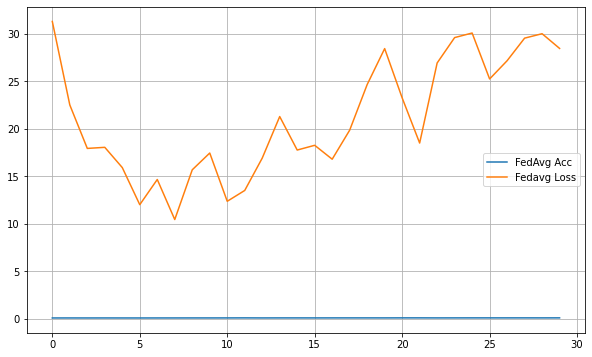

In [20]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

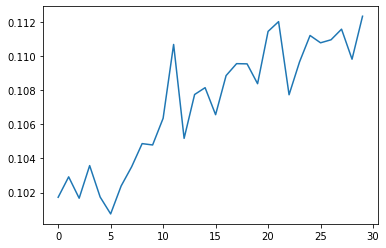

In [21]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [22]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.10172222356001535, 0.10292111254400677, 0.1016666677263048, 0.10358222317364481, 0.10173666783505016, 0.10074444587032, 0.10238555686341393, 0.10351222339603637, 0.10487333453363844, 0.10479444563388825, 0.10636111224691074, 0.11069666751556927, 0.10518333456582492, 0.10775777904523742, 0.10815888999236956, 0.10657222304079267, 0.1088688901729054, 0.10957000056902566, 0.10955777880218294, 0.10839222330186103, 0.11146333465973536, 0.11203777872853808, 0.10774333468741841, 0.10967666746841537, 0.11122444553507699, 0.11079444587230682, 0.1109722232653035, 0.1115955564710829, 0.10983111204372513, 0.11235444537467426] 

[31.266675284173754, 22.49071513811747, 17.92244175275167, 18.03732951482137, 15.908992417653403, 12.008351673020258, 14.65684027671814, 10.448004314634536, 15.674353570408291, 17.438912071122065, 12.365522951549954, 13.503582874933878, 16.901208289464314, 21.271505369080437, 17.75212655597263, 18.25036544005076, 16.788980950249567, 19.84162531428867, 24.636798834800725, 

# Our algorithm

In [23]:
acc0 = [[], [0.10369999706745148, 0.1362999975681305, 0.13349999487400055, 0.1071000024676323, 0.0997999981045723, 0.10790000110864639, 0.1006999984383583, 0.11469999700784683, 0.17010000348091125, 0.10119999945163727, 0.17749999463558197, 0.1006999984383583, 0.10000000149011612, 0.16429999470710754, 0.15839999914169312, 0.10270000249147415, 0.12720000743865967, 0.10000000149011612, 0.10040000081062317, 0.10100000351667404, 0.12070000171661377, 0.1266999989748001, 0.15760000050067902, 0.11060000211000443, 0.09989999979734421, 0.12470000237226486, 0.10769999772310257, 0.13590000569820404, 0.11550000309944153, 0.10029999911785126], [0.10050000250339508, 0.11670000106096268, 0.1665000021457672, 0.15649999678134918, 0.12430000305175781, 0.1111999973654747, 0.10000000149011612, 0.15929999947547913, 0.17509999871253967, 0.16060000658035278, 0.1306000053882599, 0.10899999737739563, 0.19370000064373016, 0.1459999978542328, 0.10289999842643738, 0.1476999968290329, 0.13740000128746033, 0.1509000062942505, 0.17159999907016754, 0.20260000228881836, 0.10180000215768814, 0.16920000314712524, 0.14959999918937683, 0.20900000631809235, 0.12770000100135803, 0.10670000314712524, 0.10350000113248825, 0.10570000112056732, 0.16300000250339508, 0.13899999856948853], [0.241799995303154, 0.18979999423027039, 0.20509999990463257, 0.14069999754428864, 0.19589999318122864, 0.1590999960899353, 0.19089999794960022, 0.15459999442100525, 0.22100000083446503, 0.19300000369548798, 0.22450000047683716, 0.1776999980211258, 0.10339999943971634, 0.10119999945163727, 0.1404999941587448, 0.133200004696846, 0.07890000194311142, 0.18289999663829803, 0.20020000636577606, 0.1274999976158142, 0.1647000014781952, 0.2037000060081482, 0.16740000247955322, 0.23510000109672546, 0.12070000171661377, 0.2305999994277954, 0.1648000031709671, 0.1818999946117401, 0.14630000293254852, 0.17020000517368317], [0.19349999725818634, 0.2320999950170517, 0.21119999885559082, 0.20080000162124634, 0.15800000727176666, 0.16619999706745148, 0.1687999963760376, 0.2467000037431717, 0.120899997651577, 0.10289999842643738, 0.19589999318122864, 0.12530000507831573, 0.13349999487400055, 0.15160000324249268, 0.10000000149011612, 0.0957999974489212, 0.20059999823570251, 0.11240000277757645, 0.19619999825954437, 0.15330000221729279, 0.18860000371932983, 0.1535000056028366, 0.1890999972820282, 0.16110000014305115, 0.1444000005722046, 0.17900000512599945, 0.16940000653266907, 0.1996999979019165, 0.20419999957084656, 0.1436000019311905], [0.2152000069618225, 0.13510000705718994, 0.18490000069141388, 0.2646999955177307, 0.20810000598430634, 0.2289000004529953, 0.16349999606609344, 0.22470000386238098, 0.20630000531673431, 0.22349999845027924, 0.24210000038146973, 0.18469999730587006, 0.16410000622272491, 0.18860000371932983, 0.18979999423027039, 0.2280000001192093, 0.1817999929189682, 0.23639999330043793, 0.24809999763965607, 0.20389999449253082, 0.27950000762939453, 0.2378000020980835, 0.22460000216960907, 0.26159998774528503, 0.23839999735355377, 0.1940000057220459, 0.2012999951839447, 0.2727000117301941, 0.18060000240802765, 0.23070000112056732], [0.21459999680519104, 0.28519999980926514, 0.16099999845027924, 0.24889999628067017, 0.2304999977350235, 0.21789999306201935, 0.26429998874664307, 0.24860000610351562, 0.22339999675750732, 0.18080000579357147, 0.2378000020980835, 0.19380000233650208, 0.20020000636577606, 0.1843000054359436, 0.1655000001192093, 0.20250000059604645, 0.27549999952316284, 0.2572999894618988, 0.22990000247955322, 0.25600001215934753, 0.24070000648498535, 0.20839999616146088, 0.1784999966621399, 0.23839999735355377, 0.23749999701976776, 0.1785999983549118, 0.2425999939441681, 0.18410000205039978, 0.18359999358654022, 0.1889999955892563], [0.266400009393692, 0.26589998602867126, 0.29120001196861267, 0.24140000343322754, 0.2703000009059906, 0.21220000088214874, 0.23980000615119934, 0.1573999971151352, 0.19599999487400055, 0.2045000046491623, 0.26829999685287476, 0.2540999948978424, 0.2337999939918518, 0.24889999628067017, 0.2912999987602234, 0.25040000677108765, 0.19009999930858612, 0.27799999713897705, 0.22759999334812164, 0.2328999936580658, 0.2522999942302704, 0.2720000147819519, 0.24529999494552612, 0.23849999904632568, 0.23489999771118164, 0.26649999618530273, 0.25609999895095825, 0.24410000443458557, 0.23919999599456787, 0.2076999992132187], [0.2370000034570694, 0.17249999940395355, 0.2851000130176544, 0.2160000056028366, 0.24379999935626984, 0.23749999701976776, 0.24500000476837158, 0.20270000398159027, 0.25450000166893005, 0.2531999945640564, 0.2637999951839447, 0.2572999894618988, 0.25870001316070557, 0.23489999771118164, 0.21619999408721924, 0.24089999496936798, 0.2500999867916107, 0.23579999804496765, 0.23360000550746918, 0.2529999911785126, 0.2791999876499176, 0.2249000072479248, 0.2402999997138977, 0.19859999418258667, 0.2451000064611435, 0.2957000136375427, 0.2662000060081482, 0.1949000060558319, 0.22840000689029694, 0.20839999616146088], [0.2515000104904175, 0.2639000117778778, 0.2969000041484833, 0.26460000872612, 0.2703000009059906, 0.30809998512268066, 0.28529998660087585, 0.27880001068115234, 0.2393999993801117, 0.2687999904155731, 0.26100000739097595, 0.31049999594688416, 0.2312999963760376, 0.25870001316070557, 0.2709999978542328, 0.2012999951839447, 0.298799991607666, 0.2955000102519989, 0.2784999907016754, 0.30160000920295715, 0.2168000042438507, 0.17190000414848328, 0.30489999055862427, 0.319599986076355, 0.267300009727478, 0.2870999872684479, 0.20069999992847443, 0.3052000105381012, 0.32199999690055847, 0.2994999885559082], [0.21359999477863312, 0.26499998569488525, 0.25450000166893005, 0.2393999993801117, 0.24420000612735748, 0.24089999496936798, 0.2296999990940094, 0.2524000108242035, 0.23600000143051147, 0.24950000643730164, 0.2547999918460846, 0.29089999198913574, 0.20020000636577606, 0.21060000360012054, 0.25870001316070557, 0.25459998846054077, 0.24449999630451202, 0.22460000216960907, 0.1875, 0.2784000039100647, 0.2775999903678894, 0.2816999852657318, 0.241799995303154, 0.25929999351501465, 0.2558000087738037, 0.22220000624656677, 0.2930000126361847, 0.2240999937057495, 0.22390000522136688, 0.30329999327659607], [0.28630000352859497, 0.28760001063346863, 0.2718999981880188, 0.27630001306533813, 0.2401999980211258, 0.2912999987602234, 0.2777999937534332, 0.2800999879837036, 0.30149999260902405, 0.17710000276565552, 0.2815000116825104, 0.21320000290870667, 0.2705000042915344, 0.33180001378059387, 0.28220000863075256, 0.3228999972343445, 0.27059999108314514, 0.287200003862381, 0.24699999392032623, 0.29679998755455017, 0.2759000062942505, 0.2987000048160553, 0.24539999663829803, 0.2280000001192093, 0.2784999907016754, 0.2207999974489212, 0.2913999855518341, 0.23960000276565552, 0.24860000610351562, 0.3068000078201294], [0.23880000412464142, 0.29499998688697815, 0.24660000205039978, 0.24120000004768372, 0.2930999994277954, 0.24889999628067017, 0.2906999886035919, 0.2924000024795532, 0.24420000612735748, 0.2354000061750412, 0.28780001401901245, 0.30630001425743103, 0.29440000653266907, 0.2533999979496002, 0.27129998803138733, 0.26109999418258667, 0.2802000045776367, 0.29510000348091125, 0.29789999127388, 0.28519999980926514, 0.2718000113964081, 0.2498999983072281, 0.2590999901294708, 0.2784999907016754, 0.2694000005722046, 0.28369998931884766, 0.23240000009536743, 0.26750001311302185, 0.2540000081062317, 0.2903999984264374], [0.2574999928474426, 0.2554999887943268, 0.27459999918937683, 0.27219998836517334, 0.3197000026702881, 0.30970001220703125, 0.2084999978542328, 0.3027999997138977, 0.30219998955726624, 0.2976999878883362, 0.2502000033855438, 0.2703999876976013, 0.1842000037431717, 0.25769999623298645, 0.24449999630451202, 0.3111000061035156, 0.2345999926328659, 0.2741999924182892, 0.3052000105381012, 0.2831000089645386, 0.2777000069618225, 0.2702000141143799, 0.2485000044107437, 0.33489999175071716, 0.2533999979496002, 0.24079999327659607, 0.3181999921798706, 0.28619998693466187, 0.2930000126361847, 0.23309999704360962], [0.3400999903678894, 0.3154999911785126, 0.31839999556541443, 0.2775999903678894, 0.30720001459121704, 0.24799999594688416, 0.29829999804496765, 0.3043000102043152, 0.2581999897956848, 0.28859999775886536, 0.29350000619888306, 0.34769999980926514, 0.2851000130176544, 0.31690001487731934, 0.28619998693466187, 0.3001999855041504, 0.26010000705718994, 0.24169999361038208, 0.3018999993801117, 0.2766999900341034, 0.2711000144481659, 0.2721000015735626, 0.2329999953508377, 0.33379998803138733, 0.3147999942302704, 0.30480000376701355, 0.30820000171661377, 0.2451000064611435, 0.3230000138282776, 0.28760001063346863], [0.3068000078201294, 0.3142000138759613, 0.2272000014781952, 0.20020000636577606, 0.2791999876499176, 0.2962000072002411, 0.2599000036716461, 0.23890000581741333, 0.3255000114440918, 0.30820000171661377, 0.28119999170303345, 0.23849999904632568, 0.241799995303154, 0.289000004529953, 0.2669000029563904, 0.26820001006126404, 0.29170000553131104, 0.329800009727478, 0.3124000132083893, 0.33070001006126404, 0.2827000021934509, 0.2809000015258789, 0.2687000036239624, 0.2870999872684479, 0.26899999380111694, 0.28360000252723694, 0.2827000021934509, 0.20890000462532043, 0.2572000026702881, 0.3052000105381012], [0.26249998807907104, 0.28049999475479126, 0.29109999537467957, 0.30970001220703125, 0.3294000029563904, 0.3278000056743622, 0.27480000257492065, 0.24899999797344208, 0.2687999904155731, 0.22949999570846558, 0.3093000054359436, 0.3122999966144562, 0.2651999890804291, 0.3034999966621399, 0.27469998598098755, 0.30790001153945923, 0.30410000681877136, 0.3068000078201294, 0.29269999265670776, 0.29989999532699585, 0.27239999175071716, 0.2964000105857849, 0.3237000107765198, 0.26260000467300415, 0.3167000114917755, 0.2897999882698059, 0.335099995136261, 0.2770000100135803, 0.3093999922275543, 0.33660000562667847], [0.2840000092983246, 0.2922999858856201, 0.2879999876022339, 0.26030001044273376, 0.3061000108718872, 0.3278000056743622, 0.23839999735355377, 0.2705000042915344, 0.2563999891281128, 0.2816999852657318, 0.3303999900817871, 0.24169999361038208, 0.31929999589920044, 0.29989999532699585, 0.2962000072002411, 0.2874000072479248, 0.33070001006126404, 0.33559998869895935, 0.2922999858856201, 0.32850000262260437, 0.2401999980211258, 0.3093999922275543, 0.3449000120162964, 0.3264000117778778, 0.2833000123500824, 0.3463999927043915, 0.31040000915527344, 0.28299999237060547, 0.2402999997138977, 0.2660999894142151], [0.30230000615119934, 0.2808000147342682, 0.2660999894142151, 0.299699991941452, 0.2662999927997589, 0.2572000026702881, 0.28700000047683716, 0.3303000032901764, 0.2842999994754791, 0.3418000042438507, 0.31450000405311584, 0.2973000109195709, 0.27549999952316284, 0.3490999937057495, 0.21809999644756317, 0.2802000045776367, 0.303600013256073, 0.32269999384880066, 0.3122999966144562, 0.26669999957084656, 0.2806999981403351, 0.3292999863624573, 0.29170000553131104, 0.2720000147819519, 0.32409998774528503, 0.26840001344680786, 0.31790000200271606, 0.24199999868869781, 0.33880001306533813, 0.32850000262260437], [0.3100999891757965, 0.3059999942779541, 0.3009999990463257, 0.27559998631477356, 0.27900001406669617, 0.3271999955177307, 0.289900004863739, 0.25049999356269836, 0.25220000743865967, 0.25360000133514404, 0.2671000063419342, 0.29019999504089355, 0.3377000093460083, 0.3149999976158142, 0.3391999900341034, 0.3109999895095825, 0.2777999937534332, 0.33820000290870667, 0.2994999885559082, 0.3303000032901764, 0.31119999289512634, 0.2890999913215637, 0.32760000228881836, 0.3659999966621399, 0.2572000026702881, 0.3357999920845032, 0.2919999957084656, 0.31139999628067017, 0.31119999289512634, 0.28600001335144043], [0.28540000319480896, 0.25769999623298645, 0.3382999897003174, 0.3416000008583069, 0.33640000224113464, 0.20309999585151672, 0.3176000118255615, 0.2953000068664551, 0.30480000376701355, 0.21660000085830688, 0.31310001015663147, 0.31290000677108765, 0.3285999894142151, 0.21699999272823334, 0.32199999690055847, 0.32030001282691956, 0.3246999979019165, 0.3352999985218048, 0.27410000562667847, 0.32499998807907104, 0.22370000183582306, 0.28619998693466187, 0.3165000081062317, 0.2985999882221222, 0.3199999928474426, 0.33379998803138733, 0.33320000767707825, 0.3434999883174896, 0.24009999632835388, 0.33230000734329224], [0.3402000069618225, 0.243599995970726, 0.2565000057220459, 0.30959999561309814, 0.3262999951839447, 0.2854999899864197, 0.29010000824928284, 0.34459999203681946, 0.26019999384880066, 0.303600013256073, 0.3434000015258789, 0.29829999804496765, 0.3142000138759613, 0.2777999937534332, 0.2815999984741211, 0.3077999949455261, 0.20180000364780426, 0.25850000977516174, 0.3208000063896179, 0.33149999380111694, 0.32269999384880066, 0.22519999742507935, 0.27399998903274536, 0.30709999799728394, 0.3384999930858612, 0.24089999496936798, 0.26579999923706055, 0.2506999969482422, 0.32019999623298645, 0.3393999934196472], [0.3260999917984009, 0.33340001106262207, 0.3066999912261963, 0.3330000042915344, 0.3411000072956085, 0.2996000051498413, 0.3327000141143799, 0.30730000138282776, 0.27140000462532043, 0.3555000126361847, 0.30660000443458557, 0.32499998807907104, 0.3066999912261963, 0.31060001254081726, 0.32519999146461487, 0.2919999957084656, 0.34860000014305115, 0.3167000114917755, 0.32179999351501465, 0.263700008392334, 0.3278999924659729, 0.3212999999523163, 0.24050000309944153, 0.31790000200271606, 0.31940001249313354, 0.3495999872684479, 0.23829999566078186, 0.32019999623298645, 0.34850001335144043, 0.2816999852657318], [0.36320000886917114, 0.25040000677108765, 0.2685000002384186, 0.25540000200271606, 0.2840000092983246, 0.31690001487731934, 0.30169999599456787, 0.28780001401901245, 0.31139999628067017, 0.28139999508857727, 0.31850001215934753, 0.25369998812675476, 0.3301999866962433, 0.2694999873638153, 0.33799999952316284, 0.302700012922287, 0.30640000104904175, 0.27160000801086426, 0.30390000343322754, 0.2957000136375427, 0.3165999948978424, 0.3596999943256378, 0.34540000557899475, 0.26080000400543213, 0.31029999256134033, 0.305400013923645, 0.3154999911785126, 0.3111000061035156, 0.33250001072883606, 0.267300009727478], [0.2500999867916107, 0.31690001487731934, 0.3391000032424927, 0.32249999046325684, 0.2808000147342682, 0.31940001249313354, 0.3276999890804291, 0.2605000138282776, 0.3327000141143799, 0.329800009727478, 0.27489998936653137, 0.26109999418258667, 0.28760001063346863, 0.3407999873161316, 0.29170000553131104, 0.3059999942779541, 0.290800005197525, 0.3230000138282776, 0.28700000047683716, 0.22859999537467957, 0.32600000500679016, 0.35120001435279846, 0.290800005197525, 0.2964000105857849, 0.36000001430511475, 0.32339999079704285, 0.32820001244544983, 0.33629998564720154, 0.24070000648498535, 0.2903999984264374], [0.24709999561309814, 0.29249998927116394, 0.2198999971151352, 0.2538999915122986, 0.3237000107765198, 0.3158000111579895, 0.2272000014781952, 0.3605000078678131, 0.30660000443458557, 0.3398999869823456, 0.3409000039100647, 0.3172999918460846, 0.27810001373291016, 0.2630999982357025, 0.3188000023365021, 0.21889999508857727, 0.3179999887943268, 0.31119999289512634, 0.3271999955177307, 0.35740000009536743, 0.3077000081539154, 0.2935999929904938, 0.319599986076355, 0.3537999987602234, 0.3084000051021576, 0.38830000162124634, 0.33160001039505005, 0.25589999556541443, 0.3582000136375427, 0.30880001187324524], [0.26249998807907104, 0.3151000142097473, 0.2847000062465668, 0.24899999797344208, 0.3310999870300293, 0.3391999900341034, 0.34790000319480896, 0.3246999979019165, 0.31119999289512634, 0.36890000104904175, 0.32919999957084656, 0.3571000099182129, 0.3456000089645386, 0.2231999933719635, 0.3172000050544739, 0.322299987077713, 0.266400009393692, 0.2635999917984009, 0.3188000023365021, 0.23199999332427979, 0.3142000138759613, 0.33410000801086426, 0.33500000834465027, 0.3122999966144562, 0.289900004863739, 0.2962000072002411, 0.3361999988555908, 0.3052000105381012, 0.2831000089645386, 0.36230000853538513], [0.3271999955177307, 0.34119999408721924, 0.262800008058548, 0.3497999906539917, 0.30640000104904175, 0.3188000023365021, 0.33219999074935913, 0.19869999587535858, 0.303600013256073, 0.3375999927520752, 0.3003999888896942, 0.31200000643730164, 0.31619998812675476, 0.2694000005722046, 0.31139999628067017, 0.28999999165534973, 0.3086000084877014, 0.32249999046325684, 0.2669000029563904, 0.3303000032901764, 0.2648000121116638, 0.3248000144958496, 0.3262999951839447, 0.3361000120639801, 0.28529998660087585, 0.34310001134872437, 0.2824000120162964, 0.288100004196167, 0.24529999494552612, 0.3544999957084656], [0.3336000144481659, 0.34450000524520874, 0.34040001034736633, 0.29510000348091125, 0.33079999685287476, 0.3497999906539917, 0.3447999954223633, 0.353300005197525, 0.2635999917984009, 0.25760000944137573, 0.3582000136375427, 0.3109999895095825, 0.28529998660087585, 0.3797999918460846, 0.3264000117778778, 0.24410000443458557, 0.34040001034736633, 0.3418000042438507, 0.3499999940395355, 0.26179999113082886, 0.35749998688697815, 0.3010999858379364, 0.3059999942779541, 0.38600000739097595, 0.3188000023365021, 0.3398999869823456, 0.3587000072002411, 0.2012999951839447, 0.361299991607666, 0.37220001220703125], [0.35420000553131104, 0.28200000524520874, 0.27559998631477356, 0.27059999108314514, 0.3671000003814697, 0.3052999973297119, 0.3188999891281128, 0.29280000925064087, 0.33970001339912415, 0.3736000061035156, 0.2962999939918518, 0.23399999737739563, 0.30169999599456787, 0.3075000047683716, 0.37689998745918274, 0.32280001044273376, 0.3059999942779541, 0.37450000643730164, 0.3472000062465668, 0.34529998898506165, 0.2915000021457672, 0.2883000075817108, 0.3393000066280365, 0.2468000054359436, 0.3000999987125397, 0.3140999972820282, 0.32850000262260437, 0.3402000069618225, 0.33489999175071716, 0.24310000240802765], [0.3176000118255615, 0.35920000076293945, 0.3582000136375427, 0.319599986076355, 0.3107999861240387, 0.3628000020980835, 0.3212999999523163, 0.320499986410141, 0.22689999639987946, 0.32839998602867126, 0.3018999993801117, 0.2759999930858612, 0.38580000400543213, 0.33799999952316284, 0.26579999923706055, 0.36800000071525574, 0.32919999957084656, 0.3312999904155731, 0.2676999866962433, 0.31450000405311584, 0.320499986410141, 0.3725000023841858, 0.38449999690055847, 0.2671000063419342, 0.24330000579357147, 0.29260000586509705, 0.3589000105857849, 0.3285999894142151, 0.3743000030517578, 0.3546000123023987]]
loss0 = [[], [2.544417381286621, 2.5679948329925537, 2.285163164138794, 2.30438494682312, 2.512328863143921, 2.317887306213379, 2.3213798999786377, 2.2840828895568848, 2.4025397300720215, 2.7438528537750244, 2.242405652999878, 2.596113443374634, 3.4644715785980225, 2.4299092292785645, 2.971832036972046, 2.2940688133239746, 2.397578239440918, 2.366852045059204, 2.357564926147461, 2.306154489517212, 3.224738359451294, 2.4004390239715576, 2.2941718101501465, 2.400383710861206, 2.581235885620117, 2.3786847591400146, 2.32185959815979, 2.5396153926849365, 2.35379695892334, 2.436739444732666], [2.4963760375976562, 2.533950090408325, 2.323869466781616, 2.492948532104492, 2.4692938327789307, 2.626053810119629, 2.400634765625, 2.3905835151672363, 2.272603988647461, 2.4844911098480225, 2.3167505264282227, 3.020979404449463, 2.2386815547943115, 2.2546067237854004, 2.365792751312256, 2.2338719367980957, 2.664132833480835, 2.417421579360962, 2.3496713638305664, 2.2711803913116455, 2.5822770595550537, 2.2399115562438965, 2.3850855827331543, 2.276981830596924, 2.636972665786743, 2.306753396987915, 2.2833540439605713, 2.5787224769592285, 2.3573803901672363, 2.438481092453003], [2.310957670211792, 2.655667304992676, 2.2165188789367676, 3.2197794914245605, 2.296565532684326, 2.5359883308410645, 2.362527847290039, 2.665396213531494, 2.586963176727295, 2.6759727001190186, 2.2131197452545166, 2.611480474472046, 2.8733294010162354, 2.2941949367523193, 2.914825201034546, 2.353165864944458, 2.747469425201416, 2.3103251457214355, 2.2451515197753906, 3.5710480213165283, 2.4822354316711426, 2.382891893386841, 2.434237480163574, 2.732557535171509, 2.906069755554199, 2.170335054397583, 2.5619513988494873, 2.5454938411712646, 3.8153960704803467, 2.602311134338379], [2.268745183944702, 2.2833354473114014, 2.2824959754943848, 2.6127169132232666, 2.4042859077453613, 2.452385663986206, 2.4992716312408447, 2.065770387649536, 2.29219388961792, 2.5044362545013428, 2.3360793590545654, 3.5115065574645996, 2.247814655303955, 2.4905929565429688, 2.417470932006836, 2.417973518371582, 2.203136444091797, 3.1640853881835938, 2.387958288192749, 2.4148247241973877, 2.3586418628692627, 2.3807950019836426, 2.253283977508545, 2.7596218585968018, 2.3316309452056885, 2.753678798675537, 2.193080425262451, 2.5507044792175293, 2.1224138736724854, 2.3604164123535156], [2.398531913757324, 3.6118838787078857, 2.7336013317108154, 2.1597673892974854, 2.832397222518921, 2.8646159172058105, 3.110363006591797, 2.787033796310425, 2.4919848442077637, 2.3063745498657227, 2.332517623901367, 2.459421396255493, 2.4879608154296875, 2.6418423652648926, 2.4629931449890137, 2.288426637649536, 2.695265054702759, 2.07951021194458, 2.5926802158355713, 3.297649621963501, 2.3738036155700684, 2.511462926864624, 2.295917510986328, 2.12898850440979, 2.323441743850708, 3.5999135971069336, 2.69564151763916, 2.3359038829803467, 2.3817498683929443, 2.4034793376922607], [2.442370653152466, 2.197471857070923, 3.5674195289611816, 2.308727741241455, 2.4169743061065674, 2.6185286045074463, 2.2207136154174805, 2.1945419311523438, 2.420161724090576, 2.5193095207214355, 2.437723398208618, 2.2442538738250732, 2.1704001426696777, 2.2127342224121094, 2.9599270820617676, 2.258427619934082, 2.279257297515869, 2.413978338241577, 2.2410428524017334, 2.085968494415283, 2.244227886199951, 3.001530170440674, 2.3324151039123535, 2.2047836780548096, 2.1217451095581055, 2.337975263595581, 2.2321112155914307, 2.842639923095703, 2.276385545730591, 3.64359450340271], [2.9880199432373047, 2.3779585361480713, 2.195120096206665, 3.6288418769836426, 2.5365989208221436, 2.426361322402954, 2.281050682067871, 2.7235805988311768, 3.2566611766815186, 3.147928476333618, 2.3881006240844727, 2.5263280868530273, 2.7274386882781982, 2.537169933319092, 2.2810728549957275, 2.578873634338379, 3.1759347915649414, 2.5089850425720215, 2.1903128623962402, 2.765030860900879, 2.5651252269744873, 2.3328161239624023, 2.98128604888916, 2.622161388397217, 3.023549795150757, 2.172672748565674, 3.002190351486206, 2.2216711044311523, 2.630096912384033, 3.326625347137451], [2.3724782466888428, 3.2604284286499023, 2.289828062057495, 2.2717621326446533, 3.1961371898651123, 2.628633499145508, 2.8563735485076904, 2.410115957260132, 2.195359230041504, 2.590953826904297, 2.0730719566345215, 2.5073280334472656, 2.196483850479126, 2.636483907699585, 3.6037020683288574, 3.012366771697998, 3.6932270526885986, 3.1287918090820312, 2.5501692295074463, 2.7125232219696045, 2.780489206314087, 2.5117626190185547, 2.1548473834991455, 2.5282375812530518, 2.28120493888855, 2.2358148097991943, 2.501340627670288, 2.452346086502075, 2.3809871673583984, 2.300391435623169], [3.138653039932251, 2.6946773529052734, 2.672908067703247, 2.539808750152588, 2.5395476818084717, 2.4208664894104004, 3.365050792694092, 2.9235899448394775, 3.373770236968994, 2.5954854488372803, 2.5429844856262207, 2.1530346870422363, 2.6703908443450928, 2.531618595123291, 2.788301467895508, 2.720792770385742, 3.0742862224578857, 2.574023723602295, 2.607487916946411, 2.5870847702026367, 3.544370651245117, 3.960336685180664, 2.716169834136963, 2.5082435607910156, 3.0528552532196045, 2.585310459136963, 3.578547954559326, 2.492175579071045, 2.2118678092956543, 2.3881113529205322], [3.451403856277466, 3.0390048027038574, 3.6829605102539062, 2.746427536010742, 2.661717176437378, 2.255631446838379, 2.547729253768921, 2.746344566345215, 2.550248146057129, 2.631521463394165, 2.777924060821533, 2.6722495555877686, 2.735097885131836, 3.044160842895508, 2.913586139678955, 2.6227359771728516, 2.840088129043579, 3.1926944255828857, 3.842404365539551, 2.128084659576416, 2.2793519496917725, 2.9639430046081543, 3.2822301387786865, 2.7460789680480957, 2.985142230987549, 2.4464781284332275, 2.5000548362731934, 2.624542236328125, 5.832523822784424, 2.508141040802002], [2.8493494987487793, 2.642263412475586, 2.987199306488037, 2.7102653980255127, 3.382866382598877, 3.2142562866210938, 3.365182876586914, 2.6212997436523438, 3.366140127182007, 3.842121124267578, 2.6901800632476807, 4.699290752410889, 2.7400357723236084, 2.19254994392395, 3.4936301708221436, 3.128849744796753, 3.760329008102417, 3.1673882007598877, 3.0383403301239014, 3.0960798263549805, 2.5879485607147217, 2.820394277572632, 2.941572427749634, 4.489618301391602, 3.3426907062530518, 3.531620979309082, 3.29400634765625, 3.070000171661377, 2.9840190410614014, 2.317021131515503], [3.3111534118652344, 2.461350917816162, 2.813706159591675, 2.4928503036499023, 2.606265068054199, 2.8558855056762695, 2.1580848693847656, 2.5929386615753174, 3.6714627742767334, 2.329479694366455, 2.852271556854248, 2.7978973388671875, 2.923464775085449, 2.3831305503845215, 2.5892751216888428, 3.333176612854004, 2.583428382873535, 2.696101188659668, 2.7122254371643066, 2.646488904953003, 3.5301175117492676, 2.4385387897491455, 3.0880117416381836, 2.5561389923095703, 2.655932903289795, 2.527797222137451, 3.0031819343566895, 2.9194369316101074, 2.4953129291534424, 2.434056282043457], [3.1388425827026367, 2.9554152488708496, 3.474013328552246, 2.5968801975250244, 3.057513475418091, 2.3191633224487305, 4.276439666748047, 2.8429415225982666, 2.8274154663085938, 2.8183090686798096, 2.951150894165039, 3.2155137062072754, 5.061913967132568, 3.464247941970825, 4.523473739624023, 2.837372303009033, 5.817500114440918, 3.4814085960388184, 2.5315136909484863, 3.0567359924316406, 3.179978847503662, 4.820799827575684, 3.5926358699798584, 2.879469156265259, 2.774913787841797, 2.644582509994507, 3.0009751319885254, 2.8245389461517334, 3.790823459625244, 3.376422643661499], [2.305922269821167, 2.732004404067993, 2.7619435787200928, 3.069061040878296, 3.2386529445648193, 2.740535020828247, 2.835721254348755, 2.5741755962371826, 2.564990997314453, 3.425853967666626, 3.001709461212158, 2.547379970550537, 3.323050022125244, 2.7786478996276855, 3.078641653060913, 2.880758285522461, 3.009899854660034, 3.643561601638794, 3.0959935188293457, 2.9775912761688232, 2.8546090126037598, 2.6695408821105957, 4.332361698150635, 2.5925374031066895, 2.4457828998565674, 2.2301511764526367, 2.8952760696411133, 3.582512617111206, 2.522458791732788, 3.4727020263671875], [2.8315036296844482, 3.447968006134033, 4.90543270111084, 5.247200965881348, 2.6932127475738525, 3.1802546977996826, 3.7223246097564697, 4.883267402648926, 2.328937292098999, 2.5137698650360107, 3.006641149520874, 3.0158982276916504, 2.65116286277771, 3.1709506511688232, 3.633075475692749, 3.2932558059692383, 2.972656011581421, 2.6746034622192383, 2.484018564224243, 2.69185471534729, 2.745185136795044, 3.7876954078674316, 3.0015182495117188, 2.7827320098876953, 3.3246054649353027, 3.186889410018921, 2.73223614692688, 4.166273593902588, 2.9931156635284424, 2.8038582801818848], [2.6235570907592773, 3.0458648204803467, 3.0195188522338867, 2.5981459617614746, 2.7421159744262695, 2.5891940593719482, 2.905700445175171, 3.4686453342437744, 3.2178592681884766, 3.3132855892181396, 2.799654960632324, 2.6248114109039307, 3.1189162731170654, 2.932438373565674, 2.957888603210449, 3.0889241695404053, 3.3333334922790527, 2.398071765899658, 2.3839426040649414, 2.5922229290008545, 2.9174251556396484, 2.6409621238708496, 3.0632762908935547, 3.4287309646606445, 2.9825000762939453, 2.6300947666168213, 2.7264480590820312, 4.863643169403076, 2.6486282348632812, 2.611569881439209], [3.4429709911346436, 3.1919384002685547, 2.819941282272339, 3.1748569011688232, 3.2525761127471924, 2.9742038249969482, 4.632184028625488, 3.3292367458343506, 4.071014881134033, 3.3413403034210205, 2.202707290649414, 3.859999179840088, 3.2186949253082275, 2.681995391845703, 3.287745714187622, 3.2683563232421875, 2.6007633209228516, 2.912161111831665, 3.6445624828338623, 2.836712598800659, 4.070100784301758, 2.8724005222320557, 2.7590391635894775, 2.4904582500457764, 3.9274773597717285, 2.69940185546875, 2.83673095703125, 3.1022298336029053, 4.046928405761719, 3.1214804649353027], [2.889065980911255, 3.113064765930176, 2.8242385387420654, 2.7295494079589844, 3.1979429721832275, 3.087616205215454, 3.1291613578796387, 2.5592269897460938, 3.104796886444092, 3.039902448654175, 2.525796413421631, 3.0266010761260986, 3.487805128097534, 2.612985849380493, 5.216977596282959, 3.133570432662964, 3.685896158218384, 2.969879627227783, 2.9197895526885986, 2.6655170917510986, 3.180008888244629, 2.852896213531494, 2.984341859817505, 3.7946856021881104, 3.1727852821350098, 3.0796186923980713, 2.618312358856201, 3.1727099418640137, 2.384786605834961, 3.031541585922241], [2.493950843811035, 3.2365543842315674, 2.6422979831695557, 3.6332292556762695, 3.6776187419891357, 3.2205889225006104, 4.078880786895752, 3.5665535926818848, 3.753430128097534, 3.291548490524292, 3.4097371101379395, 3.0479650497436523, 2.7438337802886963, 2.4540278911590576, 2.8808560371398926, 3.2818686962127686, 3.84152889251709, 2.8143885135650635, 3.3330535888671875, 2.875838041305542, 2.4164083003997803, 2.9440979957580566, 2.4593846797943115, 2.978585958480835, 3.2108170986175537, 3.0838024616241455, 2.916999340057373, 2.5851082801818848, 3.3530163764953613, 3.439117908477783], [3.225903272628784, 3.706188201904297, 2.8776943683624268, 3.2757513523101807, 2.5768895149230957, 6.018818378448486, 2.8378071784973145, 3.3534395694732666, 2.6720573902130127, 3.833982467651367, 3.0975403785705566, 3.790769577026367, 2.9761486053466797, 5.745138168334961, 3.0439059734344482, 3.054671287536621, 2.9281768798828125, 3.1110618114471436, 3.70898699760437, 3.7500078678131104, 5.314914226531982, 3.406747341156006, 4.009968280792236, 2.784269332885742, 3.1059820652008057, 3.016874313354492, 3.1665284633636475, 2.9425456523895264, 3.5884950160980225, 3.474062919616699], [2.633824586868286, 3.862401247024536, 5.344286918640137, 3.3351855278015137, 2.82265305519104, 3.273442268371582, 3.2390224933624268, 3.3411152362823486, 2.738870859146118, 3.2814297676086426, 2.4083962440490723, 2.7719502449035645, 3.006260395050049, 3.087822198867798, 3.4060258865356445, 2.955810546875, 8.33462142944336, 3.51404070854187, 2.988755226135254, 2.712996482849121, 2.6431241035461426, 4.681136131286621, 2.942347764968872, 2.623983144760132, 3.2655727863311768, 3.9376204013824463, 2.7556324005126953, 4.719841957092285, 2.4945943355560303, 3.0904674530029297], [2.586690664291382, 3.5108113288879395, 3.6241488456726074, 3.2123935222625732, 2.9389708042144775, 3.2118706703186035, 3.3846027851104736, 2.9578773975372314, 3.700803518295288, 2.8272926807403564, 3.0584628582000732, 3.6760499477386475, 2.763284206390381, 3.4196856021881104, 2.61092209815979, 3.0462257862091064, 2.6243510246276855, 3.754868745803833, 3.4173355102539062, 4.04690408706665, 3.8030526638031006, 3.6078906059265137, 4.460627555847168, 3.6566429138183594, 2.7491543292999268, 3.385319948196411, 4.666375160217285, 3.9137566089630127, 3.0581297874450684, 3.085042715072632], [2.2397782802581787, 3.1980719566345215, 2.5662841796875, 3.264328718185425, 3.229783535003662, 3.1834335327148438, 3.0436367988586426, 3.1990649700164795, 2.775247097015381, 2.9933269023895264, 3.315607786178589, 3.626067638397217, 2.7910561561584473, 3.5469906330108643, 2.472808361053467, 3.3143527507781982, 2.776930809020996, 4.0033488273620605, 3.295351982116699, 3.907782793045044, 3.114969253540039, 3.6095569133758545, 2.7930259704589844, 4.072917461395264, 2.8739383220672607, 3.248636484146118, 3.2072436809539795, 2.6225922107696533, 3.372591018676758, 3.66033673286438], [4.927973747253418, 3.1950626373291016, 3.6303000450134277, 3.4059619903564453, 3.6442461013793945, 3.9753682613372803, 3.1809234619140625, 3.4541983604431152, 3.266164541244507, 3.5927796363830566, 3.8714828491210938, 3.657515525817871, 2.887819528579712, 2.840484380722046, 3.4184813499450684, 2.9125092029571533, 3.9921863079071045, 2.926145315170288, 4.922428131103516, 4.62394380569458, 2.6488757133483887, 3.336150884628296, 3.111973524093628, 2.8435583114624023, 2.4528119564056396, 2.418038845062256, 2.827969551086426, 3.2252840995788574, 4.871406078338623, 3.217836618423462], [3.458627462387085, 3.7557315826416016, 6.188436985015869, 3.090472936630249, 3.0090813636779785, 3.4330484867095947, 4.296566963195801, 3.2272965908050537, 4.752381801605225, 2.8473095893859863, 3.18143367767334, 2.9097630977630615, 3.9948418140411377, 4.4521355628967285, 2.9262256622314453, 3.3130860328674316, 3.113377094268799, 3.5013725757598877, 3.0452518463134766, 2.6542487144470215, 2.7853715419769287, 4.036529064178467, 2.8879096508026123, 3.9613723754882812, 3.0226776599884033, 2.3726303577423096, 3.3985373973846436, 3.247711420059204, 3.1141011714935303, 3.58829927444458], [3.6587698459625244, 3.6012070178985596, 3.775635242462158, 3.364755868911743, 2.7030208110809326, 2.8251841068267822, 3.4770989418029785, 3.173596143722534, 2.868502378463745, 2.4029579162597656, 3.0584568977355957, 3.21242356300354, 2.8708527088165283, 6.086736679077148, 2.365630865097046, 2.791149377822876, 3.832504987716675, 3.5415260791778564, 3.3021159172058105, 3.62825870513916, 3.763172149658203, 3.400984764099121, 2.777578353881836, 2.7305643558502197, 3.2003366947174072, 4.094714164733887, 2.95670223236084, 3.802685499191284, 2.751347303390503, 2.630692720413208], [3.6624839305877686, 3.1920909881591797, 2.970287799835205, 2.637586832046509, 3.513435125350952, 3.0742850303649902, 2.958615779876709, 5.4174699783325195, 3.400437831878662, 2.6251237392425537, 2.968400716781616, 2.9628946781158447, 5.102077007293701, 3.5871269702911377, 3.6138663291931152, 3.024974822998047, 3.8315632343292236, 3.1188559532165527, 3.491368055343628, 2.52006459236145, 3.0975751876831055, 2.9979820251464844, 3.4705312252044678, 2.9010562896728516, 3.2719857692718506, 2.8292558193206787, 3.560157537460327, 2.763768196105957, 6.116797924041748, 2.7568938732147217], [2.7790985107421875, 2.6714484691619873, 3.190574884414673, 3.181987762451172, 3.6425788402557373, 2.4129409790039062, 3.222548484802246, 2.8255934715270996, 3.8395469188690186, 4.232269763946533, 2.6307382583618164, 4.610702037811279, 3.9813058376312256, 3.6667160987854004, 3.067732810974121, 4.046091079711914, 4.461803436279297, 3.5064456462860107, 2.5734691619873047, 3.4418890476226807, 3.379401922225952, 3.2201993465423584, 3.005225419998169, 2.5274622440338135, 3.422654628753662, 3.247332811355591, 2.7836251258850098, 5.134978294372559, 2.95168399810791, 3.17142391204834], [2.6934328079223633, 3.6063694953918457, 3.2205300331115723, 3.753587007522583, 2.8786683082580566, 4.0775017738342285, 3.0346922874450684, 3.912789821624756, 3.2469115257263184, 2.629962205886841, 3.5220754146575928, 4.786543369293213, 3.768946886062622, 3.4288551807403564, 2.880915403366089, 2.6590192317962646, 3.817112445831299, 2.9413716793060303, 3.1063289642333984, 3.246549367904663, 3.9956016540527344, 3.613243341445923, 3.0966079235076904, 4.0128493309021, 3.700364112854004, 3.255685806274414, 3.0639030933380127, 3.222877264022827, 2.765934467315674, 4.517694473266602], [3.399620771408081, 2.816371202468872, 3.487680435180664, 2.843846559524536, 3.6164753437042236, 2.740417003631592, 2.797558307647705, 4.3959808349609375, 4.34600830078125, 2.8397536277770996, 2.728621244430542, 4.245099067687988, 3.1845157146453857, 3.361882448196411, 6.003222942352295, 3.038118362426758, 3.999000310897827, 2.8444204330444336, 5.448180675506592, 5.005143165588379, 3.285843849182129, 2.5572612285614014, 2.566635847091675, 4.201244354248047, 6.245476722717285, 5.525124549865723, 3.061917781829834, 3.5561182498931885, 3.2225494384765625, 3.5944981575012207]] 

acc1 = [[], [0.11029999703168869, 0.17970000207424164, 0.14100000262260437, 0.13410000503063202, 0.09549999982118607, 0.15850000083446503, 0.14079999923706055, 0.10840000212192535, 0.08240000158548355, 0.10090000182390213, 0.09799999743700027, 0.10660000145435333, 0.1152999997138977, 0.0934000015258789, 0.10400000214576721, 0.1316000074148178, 0.1868000030517578, 0.09600000083446503, 0.10019999742507935, 0.10459999740123749, 0.11230000108480453, 0.11559999734163284, 0.1598999947309494, 0.15410000085830688, 0.13019999861717224, 0.1200999990105629, 0.1062999963760376, 0.15719999372959137, 0.1160999983549118, 0.1340000033378601], [0.1031000018119812, 0.14970000088214874, 0.17880000174045563, 0.10000000149011612, 0.09929999709129333, 0.12720000743865967, 0.11680000275373459, 0.13019999861717224, 0.16580000519752502, 0.149399995803833, 0.11680000275373459, 0.14190000295639038, 0.10000000149011612, 0.15929999947547913, 0.1234000027179718, 0.2069000005722046, 0.13420000672340393, 0.10000000149011612, 0.09989999979734421, 0.10779999941587448, 0.15970000624656677, 0.14920000731945038, 0.19900000095367432, 0.17659999430179596, 0.18719999492168427, 0.16259999573230743, 0.10830000042915344, 0.17299999296665192, 0.12099999934434891, 0.10329999774694443], [0.10409999638795853, 0.13289999961853027, 0.15970000624656677, 0.18449999392032623, 0.1216999962925911, 0.11230000108480453, 0.10750000178813934, 0.18729999661445618, 0.11749999970197678, 0.14839999377727509, 0.17910000681877136, 0.10019999742507935, 0.18870000541210175, 0.19089999794960022, 0.1607999950647354, 0.1526000052690506, 0.16300000250339508, 0.1762000024318695, 0.21410000324249268, 0.1704999953508377, 0.1687999963760376, 0.14390000700950623, 0.13570000231266022, 0.17170000076293945, 0.20190000534057617, 0.1476999968290329, 0.19460000097751617, 0.18529999256134033, 0.11599999666213989, 0.1981000006198883], [0.1525000035762787, 0.20200000703334808, 0.20100000500679016, 0.1851000040769577, 0.22509999573230743, 0.10000000149011612, 0.1151999980211258, 0.20960000157356262, 0.21950000524520874, 0.11879999935626984, 0.16019999980926514, 0.1535000056028366, 0.20250000059604645, 0.15569999814033508, 0.18060000240802765, 0.10209999978542328, 0.16670000553131104, 0.20329999923706055, 0.16899999976158142, 0.20200000703334808, 0.1923999935388565, 0.19740000367164612, 0.1525000035762787, 0.24650000035762787, 0.18219999969005585, 0.10620000213384628, 0.17339999973773956, 0.19020000100135803, 0.18970000743865967, 0.16500000655651093], [0.2046000063419342, 0.15000000596046448, 0.22529999911785126, 0.21379999816417694, 0.21330000460147858, 0.22599999606609344, 0.24220000207424164, 0.23880000412464142, 0.18940000236034393, 0.19830000400543213, 0.10279999673366547, 0.2662000060081482, 0.22439999878406525, 0.21789999306201935, 0.20319999754428864, 0.23839999735355377, 0.1973000019788742, 0.23880000412464142, 0.2410999983549118, 0.20600000023841858, 0.17229999601840973, 0.2660999894142151, 0.1745000034570694, 0.17350000143051147, 0.22709999978542328, 0.18330000340938568, 0.2012999951839447, 0.17759999632835388, 0.19380000233650208, 0.18440000712871552], [0.16920000314712524, 0.16869999468326569, 0.21289999783039093, 0.2305999994277954, 0.19380000233650208, 0.22169999778270721, 0.17509999871253967, 0.2071000039577484, 0.19089999794960022, 0.18050000071525574, 0.19519999623298645, 0.18549999594688416, 0.22220000624656677, 0.22840000689029694, 0.22429999709129333, 0.20469999313354492, 0.2387000024318695, 0.19609999656677246, 0.2029000073671341, 0.22619999945163727, 0.1656000018119812, 0.2425999939441681, 0.20839999616146088, 0.16200000047683716, 0.25600001215934753, 0.20810000598430634, 0.193900004029274, 0.21629999577999115, 0.23970000445842743, 0.22280000150203705], [0.2533000111579895, 0.2574000060558319, 0.2143000066280365, 0.1152999997138977, 0.2475000023841858, 0.2662999927997589, 0.2937999963760376, 0.21559999883174896, 0.20029999315738678, 0.2685000002384186, 0.19789999723434448, 0.2793999910354614, 0.29350000619888306, 0.1809999942779541, 0.2240000069141388, 0.1817999929189682, 0.2045000046491623, 0.15719999372959137, 0.22920000553131104, 0.26649999618530273, 0.22439999878406525, 0.2721000015735626, 0.24570000171661377, 0.2190999984741211, 0.19599999487400055, 0.1995999962091446, 0.218299999833107, 0.2345999926328659, 0.2401999980211258, 0.2653999924659729], [0.2558000087738037, 0.2619999945163727, 0.2529999911785126, 0.21709999442100525, 0.26440000534057617, 0.22179999947547913, 0.22040000557899475, 0.2535000145435333, 0.18610000610351562, 0.22269999980926514, 0.24089999496936798, 0.18060000240802765, 0.21289999783039093, 0.19140000641345978, 0.25119999051094055, 0.23929999768733978, 0.19110000133514404, 0.16439999639987946, 0.2134999930858612, 0.24740000069141388, 0.23960000276565552, 0.23389999568462372, 0.218299999833107, 0.2443999946117401, 0.24140000343322754, 0.24379999935626984, 0.24740000069141388, 0.2563999891281128, 0.1784999966621399, 0.2750000059604645], [0.2535000145435333, 0.23420000076293945, 0.22380000352859497, 0.23579999804496765, 0.30239999294281006, 0.22859999537467957, 0.2549999952316284, 0.26930001378059387, 0.26669999957084656, 0.20479999482631683, 0.28360000252723694, 0.24410000443458557, 0.1956000030040741, 0.27799999713897705, 0.22599999606609344, 0.25589999556541443, 0.21559999883174896, 0.2703999876976013, 0.24459999799728394, 0.19629999995231628, 0.21619999408721924, 0.24150000512599945, 0.2980000078678131, 0.23109999299049377, 0.25369998812675476, 0.28700000047683716, 0.24420000612735748, 0.19589999318122864, 0.2612999975681305, 0.2379000037908554], [0.2476000040769577, 0.24869999289512634, 0.2614000141620636, 0.22020000219345093, 0.23350000381469727, 0.24969999492168427, 0.23669999837875366, 0.28119999170303345, 0.24869999289512634, 0.2354000061750412, 0.25029999017715454, 0.2387000024318695, 0.25699999928474426, 0.2922999858856201, 0.22310000658035278, 0.27140000462532043, 0.25049999356269836, 0.17820000648498535, 0.22390000522136688, 0.29249998927116394, 0.25060001015663147, 0.2784999907016754, 0.2287999987602234, 0.2526000142097473, 0.24369999766349792, 0.2370000034570694, 0.2522999942302704, 0.23600000143051147, 0.25859999656677246, 0.2639000117778778], [0.28459998965263367, 0.29440000653266907, 0.29420000314712524, 0.27720001339912415, 0.2736000120639801, 0.27950000762939453, 0.25290000438690186, 0.2842000126838684, 0.29170000553131104, 0.24539999663829803, 0.17350000143051147, 0.24660000205039978, 0.25380000472068787, 0.2870999872684479, 0.22450000047683716, 0.22779999673366547, 0.24070000648498535, 0.2615000009536743, 0.2694000005722046, 0.2985999882221222, 0.28859999775886536, 0.2606000006198883, 0.2833999991416931, 0.1915999948978424, 0.21289999783039093, 0.2624000012874603, 0.3163999915122986, 0.26660001277923584, 0.3018999993801117, 0.2565999925136566], [0.26600000262260437, 0.2971999943256378, 0.29490000009536743, 0.14499999582767487, 0.263700008392334, 0.29190000891685486, 0.225600004196167, 0.29789999127388, 0.30329999327659607, 0.2597000002861023, 0.26499998569488525, 0.23819999396800995, 0.2451999932527542, 0.19300000369548798, 0.24529999494552612, 0.27570000290870667, 0.23919999599456787, 0.2791999876499176, 0.2425999939441681, 0.27810001373291016, 0.25060001015663147, 0.2971999943256378, 0.27000001072883606, 0.30970001220703125, 0.2655999958515167, 0.2556000053882599, 0.2418999969959259, 0.2800000011920929, 0.25270000100135803, 0.2985999882221222], [0.26669999957084656, 0.2930000126361847, 0.2824999988079071, 0.23839999735355377, 0.2393999993801117, 0.25619998574256897, 0.30000001192092896, 0.272599995136261, 0.28209999203681946, 0.29840001463890076, 0.26159998774528503, 0.25099998712539673, 0.24879999458789825, 0.27709999680519104, 0.31439998745918274, 0.25209999084472656, 0.26930001378059387, 0.25999999046325684, 0.2280000001192093, 0.29580000042915344, 0.2583000063896179, 0.2653999924659729, 0.2750000059604645, 0.32199999690055847, 0.2513999938964844, 0.28940001130104065, 0.23759999871253967, 0.2777000069618225, 0.2773999869823456, 0.24050000309944153], [0.2222999930381775, 0.2953999936580658, 0.24860000610351562, 0.2906999886035919, 0.2750000059604645, 0.2971999943256378, 0.2572000026702881, 0.25949999690055847, 0.25290000438690186, 0.2363000065088272, 0.2838999927043915, 0.2574999928474426, 0.26829999685287476, 0.2818000018596649, 0.26159998774528503, 0.24770000576972961, 0.26440000534057617, 0.22779999673366547, 0.3102000057697296, 0.2851000130176544, 0.2721000015735626, 0.2953000068664551, 0.31630000472068787, 0.273499995470047, 0.2937000095844269, 0.263700008392334, 0.2883000075817108, 0.29679998755455017, 0.23340000212192535, 0.31360000371932983], [0.26100000739097595, 0.2888999879360199, 0.3206000030040741, 0.2849000096321106, 0.2849999964237213, 0.2906999886035919, 0.26570001244544983, 0.2727000117301941, 0.24089999496936798, 0.30630001425743103, 0.24619999527931213, 0.2824999988079071, 0.2791000008583069, 0.2410999983549118, 0.28360000252723694, 0.3140999972820282, 0.29809999465942383, 0.24770000576972961, 0.29820001125335693, 0.2800000011920929, 0.26510000228881836, 0.2231999933719635, 0.3061000108718872, 0.2630999982357025, 0.3025999963283539, 0.27709999680519104, 0.28029999136924744, 0.23319999873638153, 0.2865999937057495, 0.3109999895095825], [0.2418999969959259, 0.243599995970726, 0.2919999957084656, 0.33219999074935913, 0.30090001225471497, 0.334199994802475, 0.24959999322891235, 0.265500009059906, 0.3244999945163727, 0.21119999885559082, 0.2671000063419342, 0.20640000700950623, 0.31709998846054077, 0.3248000144958496, 0.25459998846054077, 0.2896000146865845, 0.2678999900817871, 0.3084999918937683, 0.2345000058412552, 0.3027999997138977, 0.3165999948978424, 0.2646999955177307, 0.30149999260902405, 0.2766000032424927, 0.2694000005722046, 0.2741999924182892, 0.30970001220703125, 0.2371000051498413, 0.2678999900817871, 0.28540000319480896], [0.2540000081062317, 0.30070000886917114, 0.32120001316070557, 0.3221000134944916, 0.21549999713897705, 0.3133000135421753, 0.2526000142097473, 0.21809999644756317, 0.2883000075817108, 0.262800008058548, 0.31200000643730164, 0.2644999921321869, 0.2831999957561493, 0.2524000108242035, 0.21559999883174896, 0.30979999899864197, 0.31700000166893005, 0.25429999828338623, 0.23409999907016754, 0.27239999175071716, 0.28540000319480896, 0.30640000104904175, 0.32919999957084656, 0.328900009393692, 0.2337000072002411, 0.28870001435279846, 0.30889999866485596, 0.3010999858379364, 0.23600000143051147, 0.32089999318122864], [0.3296999931335449, 0.301800012588501, 0.23510000109672546, 0.31220000982284546, 0.2791999876499176, 0.2361000031232834, 0.28450000286102295, 0.29980000853538513, 0.29499998688697815, 0.2596000134944916, 0.33880001306533813, 0.3328000009059906, 0.2833999991416931, 0.267300009727478, 0.305400013923645, 0.2874000072479248, 0.28700000047683716, 0.30979999899864197, 0.29019999504089355, 0.28780001401901245, 0.2809999883174896, 0.27720001339912415, 0.2957000136375427, 0.3529999852180481, 0.30070000886917114, 0.29490000009536743, 0.3239000141620636, 0.2660999894142151, 0.2930000126361847, 0.2953999936580658], [0.3070000112056732, 0.27880001068115234, 0.27570000290870667, 0.31060001254081726, 0.33390000462532043, 0.32600000500679016, 0.29350000619888306, 0.2937999963760376, 0.3183000087738037, 0.29409998655319214, 0.29490000009536743, 0.29280000925064087, 0.25029999017715454, 0.28049999475479126, 0.313400000333786, 0.2994999885559082, 0.28439998626708984, 0.32339999079704285, 0.35839998722076416, 0.3278000056743622, 0.3100999891757965, 0.28380000591278076, 0.3131999969482422, 0.2867000102996826, 0.2151000052690506, 0.28700000047683716, 0.25780001282691956, 0.3149000108242035, 0.30079999566078186, 0.2980000078678131], [0.21899999678134918, 0.28600001335144043, 0.28450000286102295, 0.3061000108718872, 0.2856999933719635, 0.28200000524520874, 0.32409998774528503, 0.2971999943256378, 0.28299999237060547, 0.3357999920845032, 0.2987000048160553, 0.28850001096725464, 0.273499995470047, 0.3334999978542328, 0.18060000240802765, 0.2948000133037567, 0.24140000343322754, 0.3100000023841858, 0.2903999984264374, 0.35089999437332153, 0.2712000012397766, 0.26100000739097595, 0.32600000500679016, 0.31209999322891235, 0.23669999837875366, 0.2994999885559082, 0.2572999894618988, 0.24699999392032623, 0.29760000109672546, 0.27399998903274536], [0.30140000581741333, 0.3231000006198883, 0.31709998846054077, 0.2904999852180481, 0.31349998712539673, 0.3133000135421753, 0.2718999981880188, 0.31520000100135803, 0.3294999897480011, 0.30059999227523804, 0.26809999346733093, 0.3046000003814697, 0.3269999921321869, 0.3034000098705292, 0.3587999939918518, 0.31700000166893005, 0.25619998574256897, 0.302700012922287, 0.3334999978542328, 0.26080000400543213, 0.30059999227523804, 0.298799991607666, 0.2791000008583069, 0.33550000190734863, 0.3109000027179718, 0.2606000006198883, 0.23100000619888306, 0.3095000088214874, 0.2935999929904938, 0.3386000096797943], [0.31929999589920044, 0.28380000591278076, 0.2935999929904938, 0.20499999821186066, 0.2944999933242798, 0.2526000142097473, 0.26350000500679016, 0.31779998540878296, 0.30730000138282776, 0.2849999964237213, 0.26820001006126404, 0.3061000108718872, 0.3012999892234802, 0.32580000162124634, 0.2962000072002411, 0.2728999853134155, 0.301800012588501, 0.3138999938964844, 0.34689998626708984, 0.35569998621940613, 0.31200000643730164, 0.2651999890804291, 0.33480000495910645, 0.30709999799728394, 0.27320000529289246, 0.301800012588501, 0.28209999203681946, 0.2824999988079071, 0.2904999852180481, 0.29829999804496765], [0.24449999630451202, 0.32760000228881836, 0.3208000063896179, 0.31119999289512634, 0.31060001254081726, 0.2766000032424927, 0.30970001220703125, 0.29319998621940613, 0.2800999879837036, 0.28780001401901245, 0.2800999879837036, 0.3057999908924103, 0.19539999961853027, 0.31869998574256897, 0.29490000009536743, 0.3061000108718872, 0.3343000113964081, 0.3382999897003174, 0.2847000062465668, 0.3264000117778778, 0.32330000400543213, 0.2978000044822693, 0.33320000767707825, 0.3465000092983246, 0.3197999894618988, 0.28859999775886536, 0.31380000710487366, 0.3231000006198883, 0.3005000054836273, 0.313400000333786], [0.3021000027656555, 0.3095000088214874, 0.3260999917984009, 0.3158000111579895, 0.2773999869823456, 0.27730000019073486, 0.30250000953674316, 0.3221000134944916, 0.3481000065803528, 0.304500013589859, 0.37470000982284546, 0.3391000032424927, 0.3246000111103058, 0.29679998755455017, 0.2930999994277954, 0.3560999929904938, 0.3197000026702881, 0.2290000021457672, 0.32339999079704285, 0.325300008058548, 0.2896000146865845, 0.27250000834465027, 0.31439998745918274, 0.323199987411499, 0.31850001215934753, 0.2768000066280365, 0.2711000144481659, 0.3433000147342682, 0.2029000073671341, 0.3601999878883362], [0.29109999537467957, 0.3208000063896179, 0.30869999527931213, 0.34360000491142273, 0.30090001225471497, 0.34150001406669617, 0.2989000082015991, 0.3409999907016754, 0.2793000042438507, 0.2856999933719635, 0.2556999921798706, 0.3246999979019165, 0.3587000072002411, 0.35260000824928284, 0.2827000021934509, 0.3449000120162964, 0.2955999970436096, 0.3012999892234802, 0.3240000009536743, 0.296099990606308, 0.3562000095844269, 0.28600001335144043, 0.28049999475479126, 0.303600013256073, 0.272599995136261, 0.3147999942302704, 0.3334999978542328, 0.35530000925064087, 0.33090001344680786, 0.3280999958515167], [0.3529999852180481, 0.3384000062942505, 0.33980000019073486, 0.289900004863739, 0.27900001406669617, 0.31220000982284546, 0.3343999981880188, 0.3093999922275543, 0.3041999936103821, 0.2793999910354614, 0.32499998807907104, 0.28290000557899475, 0.3433000147342682, 0.2883000075817108, 0.32499998807907104, 0.320499986410141, 0.3255999982357025, 0.2800999879837036, 0.33250001072883606, 0.3384000062942505, 0.3183000087738037, 0.2793999910354614, 0.24770000576972961, 0.2815000116825104, 0.35089999437332153, 0.32010000944137573, 0.26179999113082886, 0.3019999861717224, 0.3059999942779541, 0.35280001163482666], [0.34279999136924744, 0.2475000023841858, 0.321399986743927, 0.3077000081539154, 0.351500004529953, 0.24269999563694, 0.32670000195503235, 0.21559999883174896, 0.2694000005722046, 0.2702000141143799, 0.3100999891757965, 0.35280001163482666, 0.33559998869895935, 0.2572000026702881, 0.31040000915527344, 0.32429999113082886, 0.34610000252723694, 0.34130001068115234, 0.3095000088214874, 0.29989999532699585, 0.32019999623298645, 0.33640000224113464, 0.3206999897956848, 0.3059999942779541, 0.27469998598098755, 0.3109999895095825, 0.2816999852657318, 0.31310001015663147, 0.3116999864578247, 0.2944999933242798], [0.243599995970726, 0.29010000824928284, 0.3540000021457672, 0.3158999979496002, 0.30320000648498535, 0.3310000002384186, 0.26660001277923584, 0.3402000069618225, 0.3052999973297119, 0.31709998846054077, 0.29499998688697815, 0.36090001463890076, 0.26910001039505005, 0.3086000084877014, 0.3156000077724457, 0.3066999912261963, 0.3296000063419342, 0.29409998655319214, 0.2874000072479248, 0.3262999951839447, 0.3425000011920929, 0.26330000162124634, 0.271699994802475, 0.3578000068664551, 0.29100000858306885, 0.31790000200271606, 0.2953000068664551, 0.26930001378059387, 0.2964000105857849, 0.29829999804496765], [0.3488999903202057, 0.2962999939918518, 0.274399995803833, 0.2547999918460846, 0.3463999927043915, 0.3325999975204468, 0.3635999858379364, 0.3400000035762787, 0.3163999915122986, 0.3553999960422516, 0.36340001225471497, 0.35910001397132874, 0.36660000681877136, 0.35910001397132874, 0.3695000112056732, 0.26429998874664307, 0.2386000007390976, 0.35659998655319214, 0.32829999923706055, 0.3271999955177307, 0.3296999931335449, 0.2996000051498413, 0.3138999938964844, 0.362199991941452, 0.33719998598098755, 0.24650000035762787, 0.32919999957084656, 0.2985000014305115, 0.3605000078678131, 0.28220000863075256], [0.34689998626708984, 0.3271999955177307, 0.35440000891685486, 0.30160000920295715, 0.31679999828338623, 0.303600013256073, 0.33009999990463257, 0.335099995136261, 0.2460000067949295, 0.3765000104904175, 0.3546000123023987, 0.32749998569488525, 0.32850000262260437, 0.3285999894142151, 0.34360000491142273, 0.3059000074863434, 0.3138999938964844, 0.3057999908924103, 0.32100000977516174, 0.31700000166893005, 0.32829999923706055, 0.31769999861717224, 0.22869999706745148, 0.27379998564720154, 0.2606000006198883, 0.32350000739097595, 0.35580000281333923, 0.34470000863075256, 0.2678999900817871, 0.34450000524520874]]
loss1 = [[], [2.4362800121307373, 2.2673661708831787, 2.951261281967163, 2.299361228942871, 2.569605588912964, 2.689619541168213, 2.37105655670166, 2.345628499984741, 3.1632375717163086, 2.35901141166687, 2.8973567485809326, 2.4499127864837646, 2.4134469032287598, 2.6053929328918457, 2.419107437133789, 2.33671236038208, 2.240471363067627, 2.4409241676330566, 2.327059030532837, 2.4210898876190186, 2.2953436374664307, 2.3045432567596436, 2.4863696098327637, 2.482287645339966, 2.84793758392334, 2.375269889831543, 2.5614500045776367, 2.327263832092285, 2.415397882461548, 2.4658026695251465], [2.3583602905273438, 2.945455551147461, 2.7250001430511475, 2.3411874771118164, 2.38871431350708, 2.5059304237365723, 2.3181040287017822, 2.3934834003448486, 2.2090563774108887, 2.306718587875366, 3.4358327388763428, 3.3163492679595947, 2.8219175338745117, 2.6748735904693604, 2.3247530460357666, 2.261425495147705, 2.3408052921295166, 2.393521785736084, 2.564417839050293, 2.2982990741729736, 2.6612281799316406, 2.3072829246520996, 2.387197732925415, 2.7673592567443848, 2.2330029010772705, 2.2969093322753906, 2.4296956062316895, 2.2624917030334473, 2.3846418857574463, 2.5502569675445557], [2.6656057834625244, 2.42012357711792, 2.259868860244751, 2.5046751499176025, 2.196078300476074, 2.257254123687744, 2.694786548614502, 2.3973276615142822, 2.469395875930786, 2.6546003818511963, 2.340712308883667, 2.4024817943573, 2.2110915184020996, 2.369581937789917, 2.71341609954834, 2.4886720180511475, 2.483830690383911, 2.6127572059631348, 2.3633487224578857, 2.498344659805298, 2.4133241176605225, 2.4326729774475098, 2.594304323196411, 2.4566712379455566, 2.460965156555176, 2.64090633392334, 2.541782855987549, 2.4043493270874023, 2.604614734649658, 2.295759916305542], [2.230868339538574, 2.233153820037842, 2.218012809753418, 2.2720515727996826, 3.1761672496795654, 2.584815740585327, 2.3003342151641846, 2.2823028564453125, 2.244042158126831, 2.2960872650146484, 2.364389181137085, 2.2611031532287598, 2.6636736392974854, 2.384962320327759, 2.427791118621826, 2.3536932468414307, 2.504453420639038, 2.4133622646331787, 2.4404962062835693, 2.4295060634613037, 2.1557791233062744, 2.2309298515319824, 2.23982572555542, 2.2671191692352295, 2.7820913791656494, 2.821316719055176, 2.469646692276001, 2.345890522003174, 2.2187604904174805, 2.4696128368377686], [2.7334747314453125, 2.945068597793579, 2.5517148971557617, 2.4275259971618652, 2.721280336380005, 2.7838873863220215, 2.460710048675537, 2.386869430541992, 3.0511252880096436, 3.3245742321014404, 3.1743667125701904, 2.226445198059082, 2.2122981548309326, 2.7333550453186035, 2.1998965740203857, 2.282810688018799, 2.245342254638672, 2.369680881500244, 2.377224922180176, 2.341801643371582, 2.438232898712158, 2.3659534454345703, 2.3787732124328613, 2.5522162914276123, 2.2626893520355225, 2.519986391067505, 2.4072186946868896, 2.380488395690918, 2.4265334606170654, 2.668503761291504], [2.558152437210083, 2.24383282661438, 2.9520599842071533, 2.1433892250061035, 2.4713268280029297, 2.303961753845215, 2.420172929763794, 2.2747111320495605, 2.196676254272461, 2.3399722576141357, 2.3640897274017334, 2.395946979522705, 2.268869638442993, 2.3252804279327393, 2.4869940280914307, 2.4730098247528076, 2.4119927883148193, 2.369699716567993, 2.460672378540039, 2.139791965484619, 2.4880855083465576, 2.3549582958221436, 2.2067110538482666, 2.2436940670013428, 2.1720383167266846, 2.451490879058838, 2.3056554794311523, 2.578526258468628, 2.6894991397857666, 3.027829170227051], [2.4338226318359375, 2.6307547092437744, 2.3625478744506836, 2.6083736419677734, 2.9099559783935547, 2.329883098602295, 2.2745254039764404, 2.612037420272827, 2.6249775886535645, 2.4164786338806152, 3.1267127990722656, 2.3607676029205322, 2.343146324157715, 2.8056018352508545, 2.95235538482666, 3.920830488204956, 2.7214772701263428, 3.6087253093719482, 2.392218589782715, 2.3282673358917236, 2.5970873832702637, 2.441220998764038, 2.8284144401550293, 2.2456772327423096, 2.8543128967285156, 3.038128614425659, 2.964635133743286, 2.7062487602233887, 2.5641846656799316, 2.4448485374450684], [2.361241102218628, 2.8075478076934814, 2.4146382808685303, 2.440019130706787, 2.50240421295166, 2.5860888957977295, 2.7968156337738037, 2.3509795665740967, 2.483888864517212, 3.4670374393463135, 3.1311516761779785, 2.3803389072418213, 3.0778987407684326, 3.2915265560150146, 2.277482032775879, 2.309257984161377, 2.443852186203003, 2.9014840126037598, 2.338181734085083, 2.1864521503448486, 2.4346466064453125, 2.2034711837768555, 2.813032627105713, 3.101661443710327, 2.2960057258605957, 2.474198341369629, 2.0389888286590576, 2.325024366378784, 3.360292673110962, 2.2587873935699463], [2.9696638584136963, 4.524949550628662, 2.9383387565612793, 3.3451578617095947, 2.5904693603515625, 3.2634148597717285, 2.8638432025909424, 2.665470600128174, 3.116934299468994, 2.8369216918945312, 2.5331332683563232, 2.9170970916748047, 3.2864956855773926, 2.612668037414551, 2.603874921798706, 3.3446078300476074, 2.9162588119506836, 2.707486391067505, 2.624756097793579, 3.385763168334961, 3.9954159259796143, 2.423229694366455, 3.35780668258667, 3.6680665016174316, 2.3968989849090576, 2.699920415878296, 2.929708242416382, 3.23523211479187, 2.5026838779449463, 3.2125325202941895], [3.013641119003296, 2.5866382122039795, 2.2166340351104736, 3.329735040664673, 2.359067678451538, 2.340867280960083, 2.3003082275390625, 2.7642822265625, 3.063781499862671, 2.8106446266174316, 2.683856725692749, 2.1693549156188965, 2.6458897590637207, 2.3267157077789307, 2.53161358833313, 2.6448652744293213, 2.2464096546173096, 5.012648105621338, 2.5948150157928467, 2.609156370162964, 2.610839605331421, 2.3641133308410645, 3.0589442253112793, 2.708012819290161, 2.433816909790039, 3.229759454727173, 2.2432329654693604, 2.9876880645751953, 3.451408624649048, 3.246675729751587], [2.4160258769989014, 2.564069986343384, 3.0338895320892334, 2.8645315170288086, 3.0231621265411377, 2.554809331893921, 3.203441619873047, 3.151231050491333, 2.948697328567505, 2.9697864055633545, 4.358127117156982, 2.6255571842193604, 2.771850824356079, 2.673306941986084, 3.853226661682129, 3.0388529300689697, 3.6729366779327393, 3.143225908279419, 3.0813891887664795, 2.582597494125366, 2.8306374549865723, 2.830747127532959, 3.0004947185516357, 4.066917419433594, 3.4452459812164307, 3.252182722091675, 2.770887613296509, 2.424203634262085, 2.923468828201294, 2.8144521713256836], [2.2904863357543945, 2.6586060523986816, 2.882629632949829, 3.8334007263183594, 3.4140350818634033, 2.2829983234405518, 3.3975117206573486, 2.4305286407470703, 2.644068956375122, 2.749248743057251, 2.9369137287139893, 3.055497884750366, 2.9270403385162354, 2.677607297897339, 2.881169557571411, 2.6592650413513184, 3.1716880798339844, 2.8255577087402344, 4.082920074462891, 2.5101940631866455, 2.553743600845337, 2.754953145980835, 2.8416948318481445, 2.5288476943969727, 2.3249895572662354, 2.583526134490967, 3.1252923011779785, 2.6108129024505615, 3.0666310787200928, 2.970275640487671], [3.893794059753418, 2.6012275218963623, 2.8848705291748047, 2.6512954235076904, 2.4471118450164795, 3.9524753093719482, 3.0726282596588135, 3.2255465984344482, 3.155972957611084, 3.4564690589904785, 3.6264209747314453, 2.4702746868133545, 2.987032890319824, 2.600215435028076, 2.8571937084198, 3.540484666824341, 2.7302865982055664, 2.5020859241485596, 2.785947799682617, 2.43533992767334, 2.675893783569336, 2.9698543548583984, 2.6845109462738037, 2.520845890045166, 3.2773468494415283, 2.436927318572998, 3.2278199195861816, 3.2522077560424805, 2.67590594291687, 2.6437463760375977], [3.0490002632141113, 3.387620687484741, 3.0869827270507812, 3.034947395324707, 2.7080495357513428, 3.041092872619629, 4.015383720397949, 3.5093934535980225, 2.690964698791504, 4.062588214874268, 2.884192943572998, 3.9412739276885986, 2.3507227897644043, 3.864318370819092, 2.921571969985962, 4.134827136993408, 3.6563472747802734, 3.160362482070923, 2.963822603225708, 2.818392038345337, 2.7151505947113037, 3.3229875564575195, 2.6572747230529785, 3.0935921669006348, 2.4641525745391846, 2.692440986633301, 3.6945226192474365, 2.606947183609009, 3.0921828746795654, 2.5433127880096436], [3.404163360595703, 2.668534755706787, 2.446054697036743, 2.607476234436035, 2.8572781085968018, 2.277916193008423, 2.9459099769592285, 3.203594923019409, 2.8662900924682617, 2.573288917541504, 3.731376886367798, 2.8140945434570312, 2.485077381134033, 3.2214674949645996, 2.778289556503296, 2.829440116882324, 2.607038736343384, 2.9575557708740234, 2.85569167137146, 3.0509374141693115, 2.9666590690612793, 2.9995970726013184, 2.4214465618133545, 2.5892627239227295, 2.4888927936553955, 3.0371789932250977, 2.6575779914855957, 3.2609341144561768, 3.330531597137451, 3.0105111598968506], [3.0157318115234375, 3.384305953979492, 2.8100738525390625, 2.344090700149536, 2.956737518310547, 2.6483066082000732, 2.5700695514678955, 3.922524929046631, 2.259056568145752, 4.149170398712158, 2.7268271446228027, 3.4677717685699463, 2.8753855228424072, 2.430734157562256, 2.752048969268799, 2.6737749576568604, 2.7368061542510986, 3.0133237838745117, 5.522537708282471, 2.9490408897399902, 2.4754061698913574, 2.5547468662261963, 2.580101490020752, 3.149876356124878, 3.3327577114105225, 3.065610885620117, 2.574150800704956, 3.424438238143921, 3.073918342590332, 3.1186683177948], [3.4835941791534424, 3.5506608486175537, 3.1935644149780273, 3.0925450325012207, 3.839573383331299, 3.4492764472961426, 3.2458088397979736, 5.860440254211426, 2.4141452312469482, 3.083638906478882, 2.9966161251068115, 4.165266990661621, 2.9296529293060303, 3.1402552127838135, 3.129392147064209, 3.527052402496338, 2.6358630657196045, 6.693518161773682, 3.4761273860931396, 2.7197513580322266, 2.9558122158050537, 3.173851251602173, 2.3259994983673096, 2.9813334941864014, 3.527907371520996, 3.514233112335205, 2.8611042499542236, 3.572232723236084, 2.6260287761688232, 2.730696678161621], [2.5049550533294678, 2.57019305229187, 4.840099811553955, 2.9541914463043213, 2.789412021636963, 3.237168312072754, 2.71451473236084, 3.034601926803589, 2.567042589187622, 2.87846302986145, 2.3103487491607666, 3.0017006397247314, 3.412151575088501, 3.234497547149658, 3.3979332447052, 3.6745307445526123, 3.1925032138824463, 2.9892079830169678, 3.16586971282959, 2.7866623401641846, 2.6302812099456787, 2.5112152099609375, 2.4525084495544434, 2.840557336807251, 3.641786813735962, 3.145339250564575, 2.6224722862243652, 2.9250741004943848, 3.034482479095459, 3.2274365425109863], [3.074490547180176, 2.834322929382324, 3.560464382171631, 2.6598305702209473, 2.64825701713562, 3.1402180194854736, 2.8350765705108643, 2.6595406532287598, 2.9079511165618896, 2.6944150924682617, 2.4854202270507812, 2.5484297275543213, 3.5287106037139893, 2.7492175102233887, 2.829439640045166, 2.4508256912231445, 2.8279268741607666, 2.9811718463897705, 2.1030657291412354, 3.327846050262451, 3.324371576309204, 3.5653903484344482, 3.1821181774139404, 2.8582186698913574, 3.2466394901275635, 2.6556155681610107, 4.586227893829346, 2.8606579303741455, 2.7140917778015137, 4.0204668045043945], [3.4848992824554443, 3.2681868076324463, 2.9432942867279053, 3.0916078090667725, 3.8539514541625977, 2.961942672729492, 3.0462396144866943, 3.1042072772979736, 3.0189640522003174, 3.0509722232818604, 3.0217480659484863, 4.257562160491943, 3.266249179840088, 3.0566275119781494, 7.221923351287842, 4.858792304992676, 3.78887939453125, 2.598374128341675, 3.4170210361480713, 2.6836578845977783, 3.800762414932251, 3.6595382690429688, 3.0062782764434814, 3.4169492721557617, 3.506340980529785, 3.451961040496826, 2.6794512271881104, 3.5663321018218994, 3.0492279529571533, 3.3407094478607178], [2.8401198387145996, 2.6592118740081787, 3.4430155754089355, 3.391223907470703, 2.9520649909973145, 3.469449281692505, 3.1219356060028076, 2.803027391433716, 3.553236246109009, 2.8413047790527344, 4.14883279800415, 3.1027708053588867, 3.3289875984191895, 3.1924664974212646, 3.0189566612243652, 3.3457674980163574, 3.730241060256958, 3.3584258556365967, 3.1072051525115967, 3.3982741832733154, 2.7161924839019775, 2.9998013973236084, 3.4578020572662354, 2.5125303268432617, 2.5414693355560303, 3.4125959873199463, 3.8446524143218994, 4.352754592895508, 2.802549362182617, 2.6619341373443604], [3.3880984783172607, 3.1664600372314453, 3.5668840408325195, 5.882663249969482, 3.80771803855896, 3.806854009628296, 3.0844485759735107, 4.2230377197265625, 3.8546316623687744, 2.8573381900787354, 3.095977783203125, 4.1462082862854, 2.349698066711426, 2.8874452114105225, 3.259479284286499, 5.059285640716553, 2.4288785457611084, 2.8233819007873535, 3.458604574203491, 2.3813483715057373, 3.73063588142395, 3.400803565979004, 2.9479081630706787, 3.0190930366516113, 3.94197416305542, 3.984205961227417, 2.9576661586761475, 4.591311931610107, 3.0591061115264893, 3.1130666732788086], [5.343565464019775, 2.882340908050537, 3.0194270610809326, 3.02221417427063, 2.746264934539795, 2.806957960128784, 2.537229299545288, 3.4010090827941895, 2.9549801349639893, 3.6780242919921875, 3.2715604305267334, 3.3448286056518555, 4.34866189956665, 2.472088575363159, 2.121821403503418, 2.8772480487823486, 3.070922374725342, 3.343332052230835, 3.2467634677886963, 2.7082338333129883, 2.946232557296753, 3.35664963722229, 3.0956075191497803, 2.794376850128174, 2.9696786403656006, 3.3564109802246094, 3.3720273971557617, 2.380345344543457, 2.551401376724243, 2.760974645614624], [3.2274324893951416, 3.16104793548584, 2.85031795501709, 2.5632145404815674, 3.2934229373931885, 3.4090871810913086, 3.63462495803833, 3.0595741271972656, 2.705362319946289, 3.4785518646240234, 2.6998491287231445, 2.8754239082336426, 2.8949475288391113, 2.84564208984375, 4.129405498504639, 2.434767961502075, 2.7478227615356445, 5.385570526123047, 2.553122043609619, 2.643394708633423, 2.823338031768799, 4.107446670532227, 2.8572845458984375, 3.2102322578430176, 3.038226366043091, 3.484369993209839, 2.459587574005127, 3.1624510288238525, 5.869887828826904, 2.5507283210754395], [3.6097636222839355, 2.707104206085205, 2.6772913932800293, 2.4162118434906006, 2.7307851314544678, 2.6127004623413086, 3.115459680557251, 3.123710870742798, 3.3867640495300293, 3.3961679935455322, 3.07645320892334, 2.68694806098938, 3.7296395301818848, 3.1538987159729004, 3.0677030086517334, 2.580944061279297, 3.1536903381347656, 2.62218976020813, 3.490962505340576, 4.2407546043396, 2.97896671295166, 2.7963645458221436, 3.614238739013672, 3.2972042560577393, 3.568852663040161, 3.6297550201416016, 2.7961361408233643, 2.285133123397827, 2.9289231300354004, 3.130619525909424], [2.9086339473724365, 3.213852882385254, 3.8433945178985596, 2.997525453567505, 2.42895770072937, 2.739258289337158, 3.1329827308654785, 3.2185492515563965, 2.9501054286956787, 3.246526002883911, 3.2740695476531982, 3.0977087020874023, 2.402480125427246, 3.3898401260375977, 2.6548705101013184, 3.903130054473877, 2.774930953979492, 3.322753429412842, 2.375434160232544, 2.533275842666626, 3.015310525894165, 3.5874440670013428, 3.658294916152954, 3.639453172683716, 2.4579918384552, 2.9040863513946533, 4.497408390045166, 2.71874737739563, 3.069112777709961, 2.727071523666382], [2.9062280654907227, 3.487083673477173, 3.526998519897461, 3.7174367904663086, 3.105757713317871, 5.0137248039245605, 2.4466094970703125, 5.715516567230225, 4.019785404205322, 3.0137784481048584, 2.567904472351074, 3.479076623916626, 3.315764904022217, 5.028439998626709, 3.562807321548462, 2.7355241775512695, 2.788459062576294, 2.7611403465270996, 3.558178424835205, 2.813427209854126, 3.109713554382324, 3.351938009262085, 3.3062386512756348, 3.207406520843506, 3.8262362480163574, 3.035015344619751, 2.984945058822632, 2.998450517654419, 4.238111972808838, 3.6884047985076904], [4.350552558898926, 3.2160215377807617, 2.4778592586517334, 3.5799620151519775, 3.3753082752227783, 2.821746349334717, 4.654600143432617, 2.2671022415161133, 3.009988784790039, 3.000101327896118, 3.8420803546905518, 3.0012340545654297, 3.597996950149536, 3.479749917984009, 4.470170021057129, 2.8491334915161133, 3.076263904571533, 4.003425121307373, 2.9838197231292725, 3.4340391159057617, 2.651158094406128, 3.3748860359191895, 3.638077735900879, 2.864910840988159, 4.2585930824279785, 4.05593729019165, 3.269591808319092, 4.395590305328369, 3.7091355323791504, 3.3560309410095215], [2.7312979698181152, 2.8811187744140625, 3.777104377746582, 4.716370105743408, 3.119844675064087, 2.857327699661255, 2.399198055267334, 2.2570905685424805, 3.169832706451416, 2.7025866508483887, 2.4482665061950684, 2.7138545513153076, 2.6873040199279785, 2.891969919204712, 2.63957142829895, 3.3752405643463135, 4.646933078765869, 3.7537128925323486, 3.0698986053466797, 3.108102321624756, 3.4061789512634277, 4.3529253005981445, 2.980586051940918, 2.8767571449279785, 2.6514837741851807, 4.782037734985352, 2.6027884483337402, 4.153914928436279, 3.153701066970825, 3.248436212539673], [2.7007968425750732, 2.7505438327789307, 3.074665069580078, 3.759442090988159, 2.735690116882324, 4.310335159301758, 3.1518750190734863, 2.6065914630889893, 3.5440375804901123, 2.2150278091430664, 2.818922281265259, 3.4090750217437744, 2.6701548099517822, 2.5521724224090576, 2.586409091949463, 2.9072012901306152, 3.040548324584961, 3.756103038787842, 3.5542774200439453, 3.5563039779663086, 3.355269432067871, 2.681654214859009, 3.9709343910217285, 4.906269073486328, 3.1701204776763916, 3.1872434616088867, 3.040949583053589, 3.600454330444336, 3.454693078994751, 2.9865963459014893]] 

acc2 = [[], [0.15449999272823334, 0.10080000013113022, 0.16179999709129333, 0.13269999623298645, 0.10239999741315842, 0.09860000014305115, 0.15219999849796295, 0.11069999635219574, 0.09449999779462814, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.12020000070333481, 0.1582999974489212, 0.10750000178813934, 0.1071000024676323, 0.14900000393390656, 0.13680000603199005, 0.09749999642372131, 0.11630000174045563, 0.17170000076293945, 0.11460000276565552, 0.18639999628067017, 0.10010000318288803, 0.1143999993801117, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612], [0.15049999952316284, 0.14300000667572021, 0.11959999799728394, 0.1761000007390976, 0.08429999649524689, 0.10939999669790268, 0.09520000219345093, 0.17149999737739563, 0.18379999697208405, 0.10000000149011612, 0.17560000717639923, 0.1264999955892563, 0.10490000247955322, 0.17839999496936798, 0.1444000005722046, 0.1324000060558319, 0.12070000171661377, 0.1535000056028366, 0.18019999563694, 0.10109999775886536, 0.17470000684261322, 0.10130000114440918, 0.17710000276565552, 0.10109999775886536, 0.09960000216960907, 0.16670000553131104, 0.18469999730587006, 0.18979999423027039, 0.1835000067949295, 0.16189999878406525], [0.13249999284744263, 0.20800000429153442, 0.13220000267028809, 0.16740000247955322, 0.164000004529953, 0.12139999866485596, 0.19089999794960022, 0.1251000016927719, 0.1876000016927719, 0.11900000274181366, 0.22349999845027924, 0.14079999923706055, 0.1517000049352646, 0.17720000445842743, 0.1550000011920929, 0.17649999260902405, 0.1784999966621399, 0.14720000326633453, 0.20329999923706055, 0.23029999434947968, 0.14470000565052032, 0.24779999256134033, 0.19750000536441803, 0.1362999975681305, 0.16580000519752502, 0.15189999341964722, 0.1923999935388565, 0.2012999951839447, 0.1696999967098236, 0.1858000010251999], [0.17020000517368317, 0.18000000715255737, 0.18209999799728394, 0.19380000233650208, 0.17730000615119934, 0.10000000149011612, 0.18850000202655792, 0.21410000324249268, 0.17839999496936798, 0.1932000070810318, 0.20829999446868896, 0.14550000429153442, 0.20360000431537628, 0.19030000269412994, 0.19820000231266022, 0.1817999929189682, 0.11869999766349792, 0.19699999690055847, 0.21389999985694885, 0.257999986410141, 0.12610000371932983, 0.1704999953508377, 0.16269999742507935, 0.23160000145435333, 0.16619999706745148, 0.1518000066280365, 0.1817999929189682, 0.20200000703334808, 0.1468999981880188, 0.24140000343322754], [0.20550000667572021, 0.21529999375343323, 0.2572999894618988, 0.1761000007390976, 0.24379999935626984, 0.26339998841285706, 0.24629999697208405, 0.1956000030040741, 0.1396999955177307, 0.20810000598430634, 0.18790000677108765, 0.2865999937057495, 0.25220000743865967, 0.19050000607967377, 0.23170000314712524, 0.24390000104904175, 0.22100000083446503, 0.17440000176429749, 0.19869999587535858, 0.26179999113082886, 0.20569999516010284, 0.2540999948978424, 0.2502000033855438, 0.1671999990940094, 0.21250000596046448, 0.2554999887943268, 0.17599999904632568, 0.2117999941110611, 0.2459000051021576, 0.2838999927043915], [0.13079999387264252, 0.27810001373291016, 0.2070000022649765, 0.24879999458789825, 0.21480000019073486, 0.2159000039100647, 0.227400004863739, 0.22949999570846558, 0.18279999494552612, 0.15809999406337738, 0.21770000457763672, 0.2775000035762787, 0.22699999809265137, 0.22619999945163727, 0.25049999356269836, 0.22050000727176666, 0.1891999989748001, 0.23819999396800995, 0.2653999924659729, 0.23669999837875366, 0.1695999950170517, 0.17030000686645508, 0.2037000060081482, 0.24539999663829803, 0.19580000638961792, 0.2500999867916107, 0.1949000060558319, 0.2800999879837036, 0.24709999561309814, 0.2021999955177307], [0.17810000479221344, 0.26429998874664307, 0.267300009727478, 0.21649999916553497, 0.186599999666214, 0.24860000610351562, 0.2879999876022339, 0.2160000056028366, 0.2793999910354614, 0.18549999594688416, 0.21230000257492065, 0.25850000977516174, 0.24320000410079956, 0.257099986076355, 0.2434999942779541, 0.21570000052452087, 0.2337999939918518, 0.2653000056743622, 0.13770000636577606, 0.1881999969482422, 0.22120000422000885, 0.28769999742507935, 0.20250000059604645, 0.2590000033378601, 0.2370000034570694, 0.27300000190734863, 0.2337000072002411, 0.2493000030517578, 0.26170000433921814, 0.20919999480247498], [0.2240000069141388, 0.26989999413490295, 0.1573999971151352, 0.23330000042915344, 0.18330000340938568, 0.24860000610351562, 0.23469999432563782, 0.26840001344680786, 0.22920000553131104, 0.22930000722408295, 0.27149999141693115, 0.2526000142097473, 0.23989999294281006, 0.21889999508857727, 0.2720000147819519, 0.17010000348091125, 0.23989999294281006, 0.23100000619888306, 0.2766000032424927, 0.2134000062942505, 0.25519999861717224, 0.24570000171661377, 0.2508000135421753, 0.2379000037908554, 0.22779999673366547, 0.2655999958515167, 0.27160000801086426, 0.2824000120162964, 0.2921999990940094, 0.26660001277923584], [0.26420000195503235, 0.2980000078678131, 0.2533000111579895, 0.2662999927997589, 0.2662000060081482, 0.2712000012397766, 0.24799999594688416, 0.27950000762939453, 0.24729999899864197, 0.23770000040531158, 0.28110000491142273, 0.25130000710487366, 0.2944999933242798, 0.2581999897956848, 0.26600000262260437, 0.23690000176429749, 0.25940001010894775, 0.29409998655319214, 0.22439999878406525, 0.2870999872684479, 0.2151000052690506, 0.2574999928474426, 0.2198999971151352, 0.2833999991416931, 0.2953000068664551, 0.2741999924182892, 0.2827000021934509, 0.25769999623298645, 0.2590999901294708, 0.2757999897003174], [0.26170000433921814, 0.30320000648498535, 0.2312999963760376, 0.27639999985694885, 0.26109999418258667, 0.2718999981880188, 0.2526000142097473, 0.2815000116825104, 0.24320000410079956, 0.27489998936653137, 0.24609999358654022, 0.2363000065088272, 0.26820001006126404, 0.22310000658035278, 0.23340000212192535, 0.2502000033855438, 0.2840000092983246, 0.2702000141143799, 0.219200000166893, 0.31310001015663147, 0.25929999351501465, 0.26759999990463257, 0.26269999146461487, 0.24310000240802765, 0.28949999809265137, 0.2451000064611435, 0.23669999837875366, 0.23409999907016754, 0.24480000138282776, 0.2443999946117401], [0.2451000064611435, 0.22529999911785126, 0.27090001106262207, 0.2345999926328659, 0.28130000829696655, 0.29190000891685486, 0.24619999527931213, 0.2863999903202057, 0.3050999939441681, 0.20630000531673431, 0.28439998626708984, 0.29260000586509705, 0.2660999894142151, 0.28850001096725464, 0.2612000107765198, 0.24310000240802765, 0.2757999897003174, 0.30090001225471497, 0.28940001130104065, 0.30970001220703125, 0.27619999647140503, 0.2567000091075897, 0.2540999948978424, 0.27000001072883606, 0.2493000030517578, 0.31450000405311584, 0.17509999871253967, 0.25920000672340393, 0.22130000591278076, 0.28459998965263367], [0.3052000105381012, 0.23479999601840973, 0.2624000012874603, 0.1664000004529953, 0.28369998931884766, 0.26489999890327454, 0.27230000495910645, 0.19699999690055847, 0.2662999927997589, 0.29350000619888306, 0.26570001244544983, 0.2867000102996826, 0.26739999651908875, 0.29350000619888306, 0.2483000010251999, 0.3034000098705292, 0.29899999499320984, 0.2797999978065491, 0.257999986410141, 0.26350000500679016, 0.26980000734329224, 0.3100999891757965, 0.2678000032901764, 0.2619999945163727, 0.2623000144958496, 0.24629999697208405, 0.23729999363422394, 0.2955999970436096, 0.30379998683929443, 0.28119999170303345], [0.27649998664855957, 0.28929999470710754, 0.30309998989105225, 0.27320000529289246, 0.2689000070095062, 0.26930001378059387, 0.23489999771118164, 0.25949999690055847, 0.28040000796318054, 0.2660999894142151, 0.2635999917984009, 0.302700012922287, 0.2648000121116638, 0.2639000117778778, 0.29739999771118164, 0.2517000138759613, 0.25279998779296875, 0.26440000534057617, 0.2768999934196472, 0.3061000108718872, 0.2786000072956085, 0.3125, 0.31200000643730164, 0.2662000060081482, 0.28790000081062317, 0.3310999870300293, 0.3098999857902527, 0.2793999910354614, 0.28850001096725464, 0.2451999932527542], [0.298799991607666, 0.2680000066757202, 0.301800012588501, 0.2946999967098236, 0.30239999294281006, 0.26600000262260437, 0.2572000026702881, 0.3125, 0.22089999914169312, 0.2750999927520752, 0.2651999890804291, 0.30399999022483826, 0.24560000002384186, 0.27630001306533813, 0.2824999988079071, 0.29490000009536743, 0.3409000039100647, 0.27000001072883606, 0.29420000314712524, 0.2587999999523163, 0.28859999775886536, 0.26190000772476196, 0.24529999494552612, 0.29420000314712524, 0.31360000371932983, 0.29179999232292175, 0.21819999814033508, 0.2337999939918518, 0.30880001187324524, 0.3156999945640564], [0.24879999458789825, 0.26489999890327454, 0.2777999937534332, 0.24390000104904175, 0.32589998841285706, 0.2775000035762787, 0.28290000557899475, 0.29420000314712524, 0.2865999937057495, 0.251800000667572, 0.2567000091075897, 0.3034999966621399, 0.28200000524520874, 0.27630001306533813, 0.3122999966144562, 0.27320000529289246, 0.26980000734329224, 0.30489999055862427, 0.27950000762939453, 0.23399999737739563, 0.20589999854564667, 0.26179999113082886, 0.298799991607666, 0.29429998993873596, 0.2969000041484833, 0.302700012922287, 0.2906000018119812, 0.32899999618530273, 0.2678999900817871, 0.27239999175071716], [0.2554999887943268, 0.31380000710487366, 0.2782999873161316, 0.32170000672340393, 0.31459999084472656, 0.26350000500679016, 0.20200000703334808, 0.27469998598098755, 0.2639000117778778, 0.3165999948978424, 0.30489999055862427, 0.24940000474452972, 0.3142000138759613, 0.3179999887943268, 0.25369998812675476, 0.24959999322891235, 0.2671999931335449, 0.3156999945640564, 0.30090001225471497, 0.3377000093460083, 0.2969000041484833, 0.3050999939441681, 0.32260000705718994, 0.32910001277923584, 0.29100000858306885, 0.29919999837875366, 0.2842000126838684, 0.2800000011920929, 0.3091000020503998, 0.15919999778270721], [0.2847999930381775, 0.2094999998807907, 0.26750001311302185, 0.3246999979019165, 0.31470000743865967, 0.2775000035762787, 0.22509999573230743, 0.18809999525547028, 0.2700999975204468, 0.2802000045776367, 0.27090001106262207, 0.3163999915122986, 0.27709999680519104, 0.2736999988555908, 0.29789999127388, 0.32030001282691956, 0.2827000021934509, 0.24420000612735748, 0.2842000126838684, 0.2865000069141388, 0.3012999892234802, 0.31940001249313354, 0.2535000145435333, 0.3073999881744385, 0.2944999933242798, 0.2680000066757202, 0.310699999332428, 0.2847999930381775, 0.31869998574256897, 0.29339998960494995], [0.2985000014305115, 0.30959999561309814, 0.3001999855041504, 0.2791000008583069, 0.2874000072479248, 0.31189998984336853, 0.1800999939441681, 0.3052999973297119, 0.32749998569488525, 0.335999995470047, 0.32019999623298645, 0.2694999873638153, 0.31459999084472656, 0.2574000060558319, 0.2890999913215637, 0.3165000081062317, 0.29750001430511475, 0.2606000006198883, 0.3075000047683716, 0.257099986076355, 0.2754000127315521, 0.30660000443458557, 0.31470000743865967, 0.29750001430511475, 0.2791000008583069, 0.33410000801086426, 0.25780001282691956, 0.34389999508857727, 0.25220000743865967, 0.3005000054836273], [0.21719999611377716, 0.2671000063419342, 0.2840999960899353, 0.33889999985694885, 0.31779998540878296, 0.3082999885082245, 0.2872999906539917, 0.30320000648498535, 0.2615000009536743, 0.2962000072002411, 0.31369999051094055, 0.3208000063896179, 0.25609999895095825, 0.2937999963760376, 0.2962999939918518, 0.24770000576972961, 0.2851000130176544, 0.27149999141693115, 0.2851000130176544, 0.2476000040769577, 0.3458999991416931, 0.32829999923706055, 0.3513999879360199, 0.31290000677108765, 0.2475000023841858, 0.29030001163482666, 0.20270000398159027, 0.2371000051498413, 0.29670000076293945, 0.288100004196167], [0.2676999866962433, 0.2985000014305115, 0.24779999256134033, 0.27090001106262207, 0.31929999589920044, 0.3066999912261963, 0.20550000667572021, 0.20200000703334808, 0.28850001096725464, 0.3224000036716461, 0.2624000012874603, 0.2257000058889389, 0.3005000054836273, 0.26350000500679016, 0.28619998693466187, 0.23980000615119934, 0.27950000762939453, 0.32739999890327454, 0.2872999906539917, 0.3021000027656555, 0.3066999912261963, 0.31949999928474426, 0.3190000057220459, 0.31619998812675476, 0.31470000743865967, 0.2743000090122223, 0.32190001010894775, 0.2475000023841858, 0.2906000018119812, 0.31529998779296875], [0.2703000009059906, 0.3091000020503998, 0.3366999924182892, 0.3156000077724457, 0.3449000120162964, 0.25679999589920044, 0.31349998712539673, 0.3075999915599823, 0.3009999990463257, 0.3447999954223633, 0.28349998593330383, 0.28850001096725464, 0.305400013923645, 0.3091000020503998, 0.3109999895095825, 0.3221000134944916, 0.27129998803138733, 0.27149999141693115, 0.34310001134872437, 0.29109999537467957, 0.31709998846054077, 0.30709999799728394, 0.28850001096725464, 0.26010000705718994, 0.29679998755455017, 0.2587999999523163, 0.30219998955726624, 0.3222000002861023, 0.3003000020980835, 0.28600001335144043], [0.24940000474452972, 0.3012000024318695, 0.29660001397132874, 0.31450000405311584, 0.2896000146865845, 0.2766999900341034, 0.29660001397132874, 0.25200000405311584, 0.32330000400543213, 0.3296000063419342, 0.3208000063896179, 0.3167000114917755, 0.2581999897956848, 0.31769999861717224, 0.29120001196861267, 0.31139999628067017, 0.24940000474452972, 0.29319998621940613, 0.2879999876022339, 0.2818000018596649, 0.32330000400543213, 0.2973000109195709, 0.27079999446868896, 0.3280999958515167, 0.3082999885082245, 0.3125999867916107, 0.29989999532699585, 0.28519999980926514, 0.3375999927520752, 0.2883000075817108], [0.3596999943256378, 0.2578999996185303, 0.32409998774528503, 0.22930000722408295, 0.26170000433921814, 0.12549999356269836, 0.34869998693466187, 0.3346000015735626, 0.3303999900817871, 0.3057999908924103, 0.28630000352859497, 0.3100000023841858, 0.30489999055862427, 0.26089999079704285, 0.30239999294281006, 0.31119999289512634, 0.32339999079704285, 0.3343000113964081, 0.2685000002384186, 0.33970001339912415, 0.31520000100135803, 0.299699991941452, 0.3084000051021576, 0.26510000228881836, 0.3215000033378601, 0.34790000319480896, 0.32339999079704285, 0.2809999883174896, 0.310699999332428, 0.3359000086784363], [0.3301999866962433, 0.3034000098705292, 0.2969000041484833, 0.2971000075340271, 0.2502000033855438, 0.23190000653266907, 0.30730000138282776, 0.31779998540878296, 0.3190999925136566, 0.3345000147819519, 0.30079999566078186, 0.31290000677108765, 0.31779998540878296, 0.3107999861240387, 0.2824999988079071, 0.2249000072479248, 0.3431999981403351, 0.33340001106262207, 0.35249999165534973, 0.32409998774528503, 0.32179999351501465, 0.3057999908924103, 0.32739999890327454, 0.30390000343322754, 0.2630999982357025, 0.3330000042915344, 0.2635999917984009, 0.32749998569488525, 0.33899998664855957, 0.3131999969482422], [0.3158000111579895, 0.33739998936653137, 0.27140000462532043, 0.26460000872612, 0.3260999917984009, 0.3483999967575073, 0.3447999954223633, 0.31690001487731934, 0.3336000144481659, 0.3050000071525574, 0.33000001311302185, 0.31130000948905945, 0.2305999994277954, 0.24449999630451202, 0.328900009393692, 0.296099990606308, 0.3043999969959259, 0.3328999876976013, 0.2930999994277954, 0.32760000228881836, 0.32030001282691956, 0.30550000071525574, 0.32109999656677246, 0.2930000126361847, 0.2775000035762787, 0.28119999170303345, 0.27559998631477356, 0.32589998841285706, 0.1687999963760376, 0.3273000121116638], [0.3125, 0.31279999017715454, 0.3070000112056732, 0.34360000491142273, 0.29089999198913574, 0.2556999921798706, 0.30550000071525574, 0.2847999930381775, 0.26440000534057617, 0.337799996137619, 0.3001999855041504, 0.335099995136261, 0.24799999594688416, 0.32519999146461487, 0.2953000068664551, 0.32580000162124634, 0.33329999446868896, 0.3147999942302704, 0.32269999384880066, 0.33970001339912415, 0.2558000087738037, 0.30730000138282776, 0.32339999079704285, 0.3215999901294708, 0.24690000712871552, 0.3418000042438507, 0.31060001254081726, 0.3140999972820282, 0.299699991941452, 0.3492000102996826], [0.3467000126838684, 0.30160000920295715, 0.26420000195503235, 0.2976999878883362, 0.2897000014781952, 0.296099990606308, 0.3192000091075897, 0.3294999897480011, 0.30559998750686646, 0.3163999915122986, 0.3206000030040741, 0.3488999903202057, 0.28209999203681946, 0.3449000120162964, 0.33149999380111694, 0.3458999991416931, 0.311599999666214, 0.30149999260902405, 0.2705000042915344, 0.31450000405311584, 0.2538999915122986, 0.2939999997615814, 0.3440999984741211, 0.2786000072956085, 0.3449999988079071, 0.329800009727478, 0.30300000309944153, 0.3407000005245209, 0.3253999948501587, 0.34360000491142273], [0.27970001101493835, 0.3303999900817871, 0.3255999982357025, 0.31949999928474426, 0.2773999869823456, 0.3424000144004822, 0.30329999327659607, 0.33230000734329224, 0.3458999991416931, 0.3093999922275543, 0.29510000348091125, 0.314300000667572, 0.35420000553131104, 0.2815000116825104, 0.3034000098705292, 0.31369999051094055, 0.2752000093460083, 0.334199994802475, 0.3276999890804291, 0.265500009059906, 0.29100000858306885, 0.3328999876976013, 0.3368000090122223, 0.3366999924182892, 0.2944999933242798, 0.33809998631477356, 0.3327000141143799, 0.3603000044822693, 0.28619998693466187, 0.22030000388622284], [0.3301999866962433, 0.3571000099182129, 0.3700000047683716, 0.3312999904155731, 0.2345000058412552, 0.3206999897956848, 0.3165999948978424, 0.33709999918937683, 0.2816999852657318, 0.2833000123500824, 0.2248000055551529, 0.31529998779296875, 0.3483000099658966, 0.3109999895095825, 0.33550000190734863, 0.34790000319480896, 0.32330000400543213, 0.2994000017642975, 0.3490000069141388, 0.3246999979019165, 0.26570001244544983, 0.2822999954223633, 0.36070001125335693, 0.29910001158714294, 0.26600000262260437, 0.2727999985218048, 0.31060001254081726, 0.36090001463890076, 0.31679999828338623, 0.32679998874664307], [0.3084999918937683, 0.3142000138759613, 0.3325999975204468, 0.3813999891281128, 0.33390000462532043, 0.35910001397132874, 0.313400000333786, 0.3353999853134155, 0.30869999527931213, 0.2870999872684479, 0.34049999713897705, 0.3384999930858612, 0.30140000581741333, 0.28279998898506165, 0.2989000082015991, 0.30469998717308044, 0.3149000108242035, 0.28870001435279846, 0.29280000925064087, 0.32690000534057617, 0.288100004196167, 0.3278999924659729, 0.3142000138759613, 0.3059000074863434, 0.2720000147819519, 0.34700000286102295, 0.27239999175071716, 0.3230000138282776, 0.32330000400543213, 0.28630000352859497]]
loss2 = [[], [2.3668053150177, 2.3786871433258057, 3.294004201889038, 2.5061213970184326, 2.4953789710998535, 2.3240597248077393, 2.349841594696045, 2.3579838275909424, 2.395250082015991, 2.877281665802002, 2.5028772354125977, 2.4094419479370117, 2.3664963245391846, 2.3081440925598145, 2.4529333114624023, 2.3150594234466553, 2.562028646469116, 2.4035229682922363, 2.3685717582702637, 2.718501091003418, 2.590477466583252, 2.747737407684326, 2.5316176414489746, 2.307445526123047, 2.4358060359954834, 2.3634443283081055, 2.6173136234283447, 2.3163082599639893, 2.472733974456787, 2.881422996520996], [2.3459630012512207, 2.4170429706573486, 2.552600860595703, 2.218646764755249, 2.288104295730591, 2.507875680923462, 2.6050660610198975, 2.7303569316864014, 2.249899387359619, 2.6257708072662354, 2.3660576343536377, 2.595191717147827, 2.4552876949310303, 2.401956081390381, 2.354194402694702, 2.934236526489258, 2.2515077590942383, 2.5206549167633057, 2.2599756717681885, 2.382289409637451, 2.44218111038208, 2.9355502128601074, 2.384481430053711, 2.6874728202819824, 2.491346597671509, 2.556007146835327, 2.1530492305755615, 2.241934061050415, 2.2096307277679443, 2.4482741355895996], [2.7372522354125977, 2.326836347579956, 2.4349312782287598, 2.3938872814178467, 2.2628111839294434, 2.2973194122314453, 2.4411466121673584, 3.617790699005127, 2.4851717948913574, 2.661168336868286, 2.392062187194824, 2.7603228092193604, 2.634561538696289, 2.292254686355591, 2.537747859954834, 2.3290116786956787, 2.4169509410858154, 2.2843410968780518, 2.5621700286865234, 2.215325355529785, 2.4214751720428467, 2.1815216541290283, 2.330829381942749, 2.367882490158081, 2.3621087074279785, 2.4332454204559326, 2.5159173011779785, 2.456958770751953, 2.752089500427246, 2.424375295639038], [2.505561351776123, 2.834245204925537, 2.1301052570343018, 2.356563091278076, 2.488417863845825, 2.6549391746520996, 2.2677206993103027, 2.4705445766448975, 2.3222391605377197, 2.25150990486145, 2.53704833984375, 2.3016650676727295, 2.1943678855895996, 2.6441810131073, 2.301576614379883, 2.282949686050415, 2.555408477783203, 2.40313720703125, 2.1418068408966064, 2.2440803050994873, 2.5565152168273926, 2.763010263442993, 2.2914233207702637, 2.361355781555176, 2.2739667892456055, 2.6143383979797363, 2.293548822402954, 2.708592653274536, 2.30598783493042, 2.166393280029297], [2.6959633827209473, 2.5837318897247314, 2.265042781829834, 2.3446402549743652, 2.05161714553833, 2.432157039642334, 2.8617374897003174, 2.3657567501068115, 2.7993361949920654, 2.5090208053588867, 2.6944143772125244, 2.194946765899658, 2.2525904178619385, 2.6192619800567627, 2.4663431644439697, 2.2806143760681152, 2.52415132522583, 2.304896354675293, 2.5826497077941895, 2.4088950157165527, 2.395021438598633, 2.473888874053955, 2.3644204139709473, 3.7283480167388916, 2.3163902759552, 2.2697103023529053, 2.4273056983947754, 2.355921983718872, 2.383333921432495, 2.295285224914551], [2.513705015182495, 2.4410831928253174, 2.1008176803588867, 2.5968410968780518, 2.3674156665802, 2.4849672317504883, 2.3975093364715576, 2.4818849563598633, 2.2532145977020264, 2.3472721576690674, 2.139225482940674, 2.1986124515533447, 2.8266193866729736, 2.559232234954834, 2.372209072113037, 2.38015079498291, 3.101844549179077, 2.117966413497925, 2.142482042312622, 2.3920466899871826, 2.63830828666687, 3.02213191986084, 2.6954495906829834, 2.220041513442993, 3.1004014015197754, 2.3422698974609375, 2.442434787750244, 2.2334792613983154, 2.1908206939697266, 2.4982593059539795], [3.4791691303253174, 2.2696852684020996, 2.6478114128112793, 2.308821439743042, 3.0217020511627197, 2.58477783203125, 3.2099313735961914, 2.937236785888672, 2.447038412094116, 2.4420018196105957, 2.615337610244751, 2.302751064300537, 2.424858808517456, 2.353890895843506, 2.7742483615875244, 2.391279935836792, 2.178175687789917, 2.6561594009399414, 7.918743133544922, 2.6733813285827637, 2.7564163208007812, 2.290660858154297, 3.312420606613159, 2.274531364440918, 2.8443870544433594, 2.1636345386505127, 2.3606646060943604, 2.5909290313720703, 2.9915411472320557, 2.378572940826416], [2.1861956119537354, 2.8621435165405273, 3.2025201320648193, 2.3210291862487793, 2.6103103160858154, 2.611074686050415, 2.713860273361206, 2.2535924911499023, 2.6016695499420166, 2.193802833557129, 2.183622360229492, 2.373927116394043, 2.0898234844207764, 2.3670740127563477, 2.422762870788574, 2.69404673576355, 2.2283542156219482, 2.5721402168273926, 2.0972769260406494, 2.6195993423461914, 2.3703114986419678, 2.589721441268921, 2.785987615585327, 2.3142971992492676, 2.466341495513916, 2.4032862186431885, 2.5062267780303955, 2.3180272579193115, 2.193967342376709, 2.0516674518585205], [3.1073508262634277, 2.56648850440979, 3.0500242710113525, 2.577768564224243, 2.807262420654297, 2.8397023677825928, 2.738142728805542, 2.6576614379882812, 3.957411766052246, 2.7377078533172607, 2.23671817779541, 3.0563154220581055, 2.664215326309204, 2.387272357940674, 2.4544243812561035, 3.106041431427002, 3.2067275047302246, 2.8307225704193115, 3.0332584381103516, 3.009007692337036, 2.6008620262145996, 2.674736976623535, 3.034514904022217, 3.233882427215576, 2.5403125286102295, 3.356321096420288, 2.992642402648926, 3.2979273796081543, 2.478487253189087, 2.2184553146362305], [2.583125591278076, 2.4165666103363037, 2.5746536254882812, 2.703502655029297, 2.866811990737915, 2.4624688625335693, 2.708879232406616, 3.0835721492767334, 2.29748797416687, 2.595036268234253, 2.368135929107666, 2.697096109390259, 2.4494640827178955, 3.8652586936950684, 2.8330483436584473, 2.709728240966797, 2.1656622886657715, 2.972541093826294, 3.369852066040039, 2.533419370651245, 2.3006505966186523, 2.928492307662964, 2.5089313983917236, 2.4357283115386963, 2.1017544269561768, 2.5469655990600586, 2.3333234786987305, 2.8444201946258545, 2.4508326053619385, 2.7064156532287598], [3.3731234073638916, 3.7289702892303467, 2.206296443939209, 3.1020865440368652, 2.591658353805542, 2.5102322101593018, 2.520081043243408, 2.7370500564575195, 3.169093608856201, 3.3321726322174072, 2.3346409797668457, 2.141808032989502, 3.1341381072998047, 2.7586922645568848, 2.6281495094299316, 2.6411080360412598, 3.018571376800537, 2.3007380962371826, 2.6517515182495117, 3.0036723613739014, 2.5878424644470215, 3.4821527004241943, 3.002652645111084, 3.5831339359283447, 2.667210578918457, 2.1984307765960693, 4.464378356933594, 2.3791584968566895, 2.8723931312561035, 2.6245949268341064], [2.8181633949279785, 2.525170087814331, 2.5724661350250244, 5.515396595001221, 2.5780413150787354, 2.756049156188965, 3.0156407356262207, 3.396395206451416, 2.7821619510650635, 2.3561551570892334, 2.455717086791992, 2.4365615844726562, 2.621460437774658, 2.3372373580932617, 3.226280450820923, 2.48840069770813, 2.968310832977295, 2.7732582092285156, 3.032069683074951, 2.911639928817749, 2.9951086044311523, 2.597848653793335, 2.3128154277801514, 2.7716870307922363, 2.8628649711608887, 2.62250018119812, 3.271571159362793, 2.745920419692993, 2.633193254470825, 2.335970878601074], [2.9295411109924316, 2.8889102935791016, 2.684631586074829, 2.4320363998413086, 2.5924832820892334, 2.914865016937256, 2.5883243083953857, 3.2902374267578125, 2.5168533325195312, 2.7476439476013184, 3.127013921737671, 3.0912346839904785, 3.021550178527832, 2.134390354156494, 3.241103410720825, 2.7967112064361572, 2.6723077297210693, 3.092151641845703, 2.7052664756774902, 2.9452199935913086, 3.372666358947754, 3.0826497077941895, 3.1459274291992188, 2.629042148590088, 3.176847457885742, 3.559676170349121, 2.622258424758911, 3.117933988571167, 2.7822036743164062, 2.9055838584899902], [2.786135196685791, 2.50989031791687, 3.4771885871887207, 3.034435272216797, 2.7836618423461914, 2.688807487487793, 2.6101012229919434, 2.363574504852295, 3.0423545837402344, 2.706113815307617, 3.1294515132904053, 2.1011714935302734, 3.1945953369140625, 2.687425374984741, 2.5868167877197266, 2.691981554031372, 2.247654438018799, 2.4152934551239014, 2.3919358253479004, 2.4258995056152344, 2.870988130569458, 2.5781195163726807, 3.8874640464782715, 3.0013668537139893, 2.4788215160369873, 2.3917412757873535, 3.1048827171325684, 3.325314521789551, 2.631669759750366, 3.087890625], [3.2091355323791504, 3.3621344566345215, 3.153434991836548, 3.147759437561035, 3.6563613414764404, 2.63535737991333, 3.0209708213806152, 2.3191325664520264, 3.1325716972351074, 3.418144941329956, 3.285949230194092, 2.6595616340637207, 2.6449456214904785, 3.6770825386047363, 2.916672945022583, 2.8357160091400146, 3.875112771987915, 2.363738775253296, 3.0021257400512695, 3.755403995513916, 3.9804043769836426, 3.345193386077881, 2.9881954193115234, 2.711911678314209, 2.538851737976074, 3.0050597190856934, 2.636256217956543, 2.7657291889190674, 2.2978315353393555, 2.4255924224853516], [2.4278697967529297, 2.603778123855591, 4.248507976531982, 2.765022039413452, 3.401538372039795, 2.803101062774658, 4.197715759277344, 3.2440245151519775, 3.001047134399414, 2.69762921333313, 2.8141238689422607, 3.197645902633667, 3.4204862117767334, 2.7687771320343018, 3.317171812057495, 3.2125446796417236, 3.3749961853027344, 2.976802110671997, 2.6161282062530518, 2.6644206047058105, 2.686134099960327, 2.7542364597320557, 2.735258102416992, 2.670132637023926, 3.077753782272339, 2.7952940464019775, 2.319803237915039, 3.0488336086273193, 3.0852038860321045, 5.202247142791748], [2.688873529434204, 4.047199249267578, 3.3213539123535156, 2.9596498012542725, 2.4916436672210693, 2.764849901199341, 3.7670671939849854, 5.3116631507873535, 2.870258331298828, 3.224376916885376, 2.906151533126831, 2.721470355987549, 2.581489086151123, 3.0401906967163086, 3.1832058429718018, 2.6100661754608154, 2.6724109649658203, 4.0492730140686035, 2.7714555263519287, 3.4561409950256348, 2.8845102787017822, 2.5944228172302246, 3.2047646045684814, 2.7886173725128174, 2.885403871536255, 2.816704273223877, 2.7329375743865967, 2.95015811920166, 3.163701295852661, 2.8901984691619873], [2.821723699569702, 2.6233022212982178, 3.2089664936065674, 2.766925573348999, 2.9246809482574463, 3.0858547687530518, 4.446985244750977, 2.963347911834717, 2.8005311489105225, 2.5697500705718994, 2.754152297973633, 3.0603671073913574, 3.056077241897583, 4.068531513214111, 3.04520845413208, 2.868990421295166, 2.4588420391082764, 3.6225011348724365, 2.6514291763305664, 2.93133544921875, 2.830263376235962, 3.206056594848633, 2.342538595199585, 2.816679000854492, 3.109614610671997, 2.4348483085632324, 3.306058168411255, 2.574202299118042, 3.1827335357666016, 2.4694831371307373], [4.517658233642578, 5.093170642852783, 3.3662655353546143, 2.5612106323242188, 3.6938366889953613, 3.222917079925537, 3.6109132766723633, 3.208167552947998, 3.2139883041381836, 3.6287102699279785, 3.831094980239868, 2.6512198448181152, 2.405073404312134, 3.109231472015381, 3.1894943714141846, 3.491589069366455, 3.2348990440368652, 2.8402504920959473, 2.6893911361694336, 4.1155195236206055, 2.442563772201538, 2.4759559631347656, 2.6710681915283203, 3.075331687927246, 3.5260508060455322, 3.178662061691284, 2.8608806133270264, 4.00604248046875, 3.127164125442505, 2.901292085647583], [3.2097408771514893, 3.427497148513794, 4.404466152191162, 3.0072004795074463, 3.0154829025268555, 2.599475622177124, 3.6666066646575928, 3.718073844909668, 3.1202969551086426, 2.8547699451446533, 3.4393954277038574, 3.40681529045105, 2.543976068496704, 3.78200626373291, 2.6026675701141357, 4.794277667999268, 3.1795358657836914, 3.0315287113189697, 2.6777219772338867, 3.364877462387085, 2.8343424797058105, 3.1673784255981445, 2.816861629486084, 2.6970067024230957, 2.949045181274414, 3.089648723602295, 3.709477424621582, 3.0231516361236572, 2.7526698112487793, 3.2140557765960693], [4.223294258117676, 2.5239570140838623, 2.933457612991333, 3.1554601192474365, 2.681795120239258, 3.1803274154663086, 3.214494466781616, 3.0471138954162598, 3.5075321197509766, 2.6732637882232666, 3.505493402481079, 3.6826014518737793, 2.5755836963653564, 2.699495315551758, 2.997650623321533, 2.7058112621307373, 3.049492120742798, 3.8273165225982666, 2.9705135822296143, 3.4413952827453613, 2.738065242767334, 3.3505117893218994, 3.0911903381347656, 4.12109899520874, 3.353975772857666, 3.734022617340088, 3.4835593700408936, 3.1201019287109375, 3.5205249786376953, 2.797797203063965], [3.398056983947754, 2.8762364387512207, 3.3929121494293213, 2.6957879066467285, 3.806363344192505, 3.5154988765716553, 2.9947474002838135, 4.68532657623291, 2.3158211708068848, 2.752236843109131, 2.4429054260253906, 2.7895333766937256, 2.7165133953094482, 3.2234129905700684, 2.7079830169677734, 2.7253899574279785, 3.9149441719055176, 2.45736026763916, 3.984316110610962, 3.843975305557251, 2.9468955993652344, 2.8675806522369385, 2.521524429321289, 2.881446123123169, 2.91938853263855, 3.454085111618042, 2.801004409790039, 2.8805205821990967, 2.4403891563415527, 2.9658727645874023], [2.676945924758911, 4.897690296173096, 3.315051555633545, 3.6686289310455322, 3.7993128299713135, 5.666504383087158, 2.7175724506378174, 2.755950927734375, 2.7053887844085693, 2.9286983013153076, 3.070037841796875, 2.7186532020568848, 3.3054113388061523, 3.569763660430908, 2.998060464859009, 3.330136775970459, 3.419642925262451, 2.9059038162231445, 3.041973352432251, 2.429697275161743, 3.2522950172424316, 3.1108179092407227, 2.598395347595215, 4.01493501663208, 3.4497854709625244, 2.3709094524383545, 2.9951436519622803, 3.258303165435791, 3.719682455062866, 2.808732509613037], [2.5967984199523926, 3.1861891746520996, 2.8961575031280518, 3.4317574501037598, 3.317155122756958, 2.9342098236083984, 2.597388744354248, 2.654603958129883, 3.3613152503967285, 2.682309865951538, 2.862443208694458, 3.1043832302093506, 2.809995412826538, 2.913774251937866, 3.221578359603882, 3.8701393604278564, 2.7557406425476074, 2.889202833175659, 3.2107479572296143, 2.6421284675598145, 2.7768735885620117, 2.6872363090515137, 2.6469647884368896, 3.1064162254333496, 4.348450660705566, 2.4939098358154297, 3.829338788986206, 3.357184410095215, 3.0275766849517822, 3.2356815338134766], [2.533066987991333, 3.4268581867218018, 4.115417003631592, 6.904149055480957, 2.6344492435455322, 3.1830873489379883, 2.4936037063598633, 3.6979386806488037, 3.083841323852539, 3.457080841064453, 2.7585198879241943, 3.2484617233276367, 3.58782958984375, 4.575742244720459, 2.6921494007110596, 2.8393514156341553, 2.9217779636383057, 2.7563676834106445, 3.1844635009765625, 2.7992992401123047, 3.4367334842681885, 3.1721534729003906, 3.4136855602264404, 3.405933141708374, 3.97422456741333, 2.6045799255371094, 3.1909611225128174, 2.7989625930786133, 5.040832042694092, 2.9835166931152344], [3.5961198806762695, 2.8421103954315186, 3.2483325004577637, 2.82845401763916, 3.88512921333313, 3.6926417350769043, 3.1858134269714355, 2.8876354694366455, 3.1497132778167725, 3.0207550525665283, 2.9130420684814453, 2.966189384460449, 3.521566390991211, 2.693119764328003, 3.110170602798462, 3.1996819972991943, 3.092691659927368, 3.260279893875122, 3.48848557472229, 2.654268264770508, 4.026246070861816, 3.0102450847625732, 3.1716344356536865, 2.702244997024536, 5.008267402648926, 3.600775718688965, 2.6535651683807373, 3.752159833908081, 2.6362037658691406, 3.4295945167541504], [2.6111555099487305, 3.2488975524902344, 3.0861527919769287, 4.099331855773926, 2.949387788772583, 3.09198260307312, 2.410167694091797, 3.076277017593384, 2.873011350631714, 2.889648914337158, 3.318262815475464, 2.84991455078125, 3.5637781620025635, 2.6058051586151123, 3.135859489440918, 3.8701350688934326, 3.3901469707489014, 3.7950985431671143, 3.645953416824341, 2.719989538192749, 4.358607769012451, 3.294856309890747, 2.894298553466797, 3.236629009246826, 3.4036309719085693, 2.933504104614258, 3.3955774307250977, 2.852266311645508, 3.016596794128418, 3.467636823654175], [3.562880516052246, 2.7971107959747314, 3.0558502674102783, 2.866641044616699, 4.436669826507568, 2.9414544105529785, 2.9947121143341064, 3.0150065422058105, 2.5298609733581543, 2.8604800701141357, 2.77404522895813, 2.847513198852539, 3.1525981426239014, 4.703337669372559, 3.2225184440612793, 3.256406545639038, 3.2849366664886475, 3.0226078033447266, 2.7052998542785645, 3.2637577056884766, 3.475328207015991, 2.782815456390381, 3.4951980113983154, 2.6355769634246826, 3.343599557876587, 2.9893527030944824, 3.0223734378814697, 3.7548227310180664, 3.1517395973205566, 3.573261022567749], [3.4519519805908203, 2.5384521484375, 2.608549118041992, 2.814484119415283, 3.691337823867798, 3.578845977783203, 3.736142873764038, 3.232630491256714, 2.7381832599639893, 3.6860148906707764, 6.467391490936279, 3.8122715950012207, 3.4097039699554443, 2.8219823837280273, 3.213859796524048, 3.2024011611938477, 2.950305223464966, 2.9411723613739014, 3.350919485092163, 3.053447961807251, 5.042231559753418, 3.5401241779327393, 3.2005817890167236, 3.6940581798553467, 3.675074577331543, 3.698512077331543, 3.2733099460601807, 3.1902475357055664, 3.2733840942382812, 2.6764674186706543], [2.714707374572754, 2.4178268909454346, 2.862055778503418, 2.8993287086486816, 4.479689598083496, 2.3942484855651855, 2.163595199584961, 2.6437668800354004, 3.1716740131378174, 3.093181610107422, 2.5371108055114746, 2.7608540058135986, 3.444819211959839, 3.0770938396453857, 3.0851244926452637, 2.39101505279541, 2.4612934589385986, 4.578213691711426, 3.3966171741485596, 2.994704008102417, 3.6239829063415527, 3.2913191318511963, 2.8144514560699463, 3.59963321685791, 3.4404971599578857, 3.3106651306152344, 3.3351612091064453, 3.052753448486328, 2.954589605331421, 2.765519618988037]] 


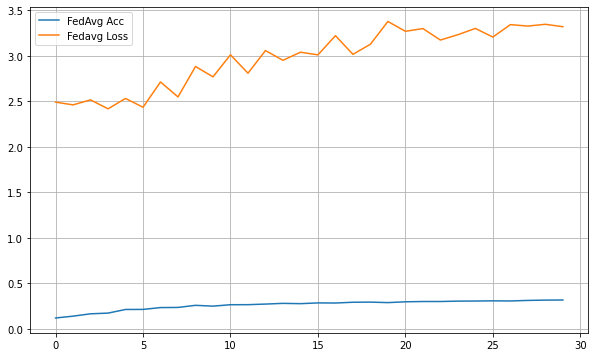

In [24]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

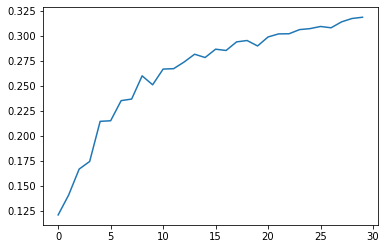

In [25]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [26]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.12098777782585886, 0.14089111189047496, 0.16675888862874774, 0.17435666753186121, 0.2144211110141542, 0.21500888847642474, 0.2351077773504787, 0.23668111215035123, 0.2598577772577603, 0.25094000051418935, 0.2666166678071022, 0.2670255553391245, 0.27367222143544095, 0.28146111137337154, 0.2781655564904213, 0.2864833331770367, 0.2852088896764649, 0.29378222376108165, 0.2951477775971095, 0.28972444418403837, 0.2986977767613199, 0.30174444466829303, 0.3018933339251412, 0.306041112376584, 0.3070311122470432, 0.3091722223493788, 0.30784666587909065, 0.3137677785423067, 0.3171466666791174, 0.3183888892332713] 

[2.4913945860332913, 2.461407701174418, 2.5163633081648085, 2.418075410525004, 2.53202850818634, 2.435168102052477, 2.712983809577094, 2.5485855129030015, 2.8830391009648637, 2.769441596666972, 3.011138290829129, 2.8094150437249077, 3.0575767093234596, 2.9509021494123675, 3.039805613623725, 3.010595472653707, 3.2212928957409326, 3.0164472606447004, 3.1273902389738293, 3.377422544691